In [3]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import os
import os.path
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf

data_path = os.path.expandvars('C:/Users/$USERNAME/Desktop/data/07_deep_learning/')

## 1: Data Generator

In [74]:
from tensorflow.keras.utils import Sequence

class GenData(Sequence):
    def __init__(self, path, split='train', batch_size=32, fraction=5):
        self.split = split
        self.path = os.path.join(path, split, 'output')
        self.batch_size = batch_size
        self.fraction = fraction
        self.num_features = 62 #our dataset has 62 features
        self.num_classes = 2 #voice activity=0/1

        # TODO: lists containing data
        self.x = [] # features: zero crossing, mfccs, ...
        self.y = [] # speech activity: 0 / 1

        # TODO: collect file names under *self.path*
        self.files = [os.path.join(self.path, f) for f in os.listdir(self.path) if f.endswith('.npz')]

        # only select a *fraction* of the file names to limit amount of 
        # training data
        self.files = self.files[1 : int(len(self.files) / self.fraction)]

        for file in tqdm(self.files):
            # TODO: load file & save contents in *self.x* & *self.y*
            data = np.load(file)
            features = data['features'].astype(np.float32)
            print("features.shape"+str(features.shape))
            vad = np.round(data['vad']).astype(np.float32)
            print("vad.shape"+str(vad.shape))
            self.x.append(features)
            self.y.append(vad)

        # Random order indices
        self.idx = np.random.permutation(range(len(self.x)))

    def __getitem__(self, item): #called with [index]
        # get random indices of current batch
        idx_batch = self.idx[item*self.batch_size : (item+1)*self.batch_size]

        # TODO: find minimum length of data for current batch
        #minlen = min(len(x) for x in x_batch)
        minlen = min([self.x[it].shape[1] for it in idx_batch])

        # TODO: get data for current batch from *self.x* / *self.y*
        #x_batch = [self.x[idx][:minlen] for idx in idx_batch]
        #y_batch = [self.y[idx][:minlen] for idx in idx_batch]
        x_tensor = np.zeros((self.batch_size, minlen, self.num_features))
        y_tensor = np.zeros((self.batch_size, minlen))
        for it, rand_it in enumerate(idx_batch):
            sequence = self.x[rand_it][:,:minlen]
            #print(sequence.shape)
            x_tensor[it, :, :] = sequence.T
            y_tensor[it, :] = self.y[rand_it][:minlen]

        # TODO: stack data for current batch to tensors of proper size
        #x_tensor = [self.x[idx][:minlen] for idx in idx_batch]
        #y_tensor = [self.y[idx][:minlen] for idx in idx_batch]

        # x_tensor = features, y_tensor = probability targets
        return x_tensor, y_tensor

    def __len__(self):
        return math.floor(len(self.x) / self.batch_size)

    def on_epoch_end(self):
        if self.split == 'train':
            # reshuffle random order indices
            self.idx = np.random.permutation(range(len(self.x)))

In [75]:
# Instantiate one generator for training, validation and test data

train_data = GenData(data_path, split='train', batch_size=32)
val_data = GenData(data_path, split='val', batch_size=32)
test_data = GenData(data_path, split='test', batch_size=32)

  0%|          | 3/6394 [00:00<04:21, 24.41it/s]

features.shape(62, 620)
vad.shape(620,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 227)
vad.shape(227,)


  0%|          | 6/6394 [00:00<04:58, 21.41it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 380)
vad.shape(380,)


  0%|          | 11/6394 [00:00<07:34, 14.05it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 270)


  0%|          | 13/6394 [00:00<07:47, 13.65it/s]

vad.shape(270,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 286)
vad.shape(286,)


  0%|          | 17/6394 [00:01<08:04, 13.15it/s]

features.shape(62, 317)
vad.shape(317,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 329)
vad.shape(329,)


  0%|          | 19/6394 [00:01<08:09, 13.02it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 308)
vad.shape(308,)


  0%|          | 23/6394 [00:01<08:13, 12.90it/s]

features.shape(62, 688)
vad.shape(688,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 321)
vad.shape(321,)


  0%|          | 25/6394 [00:01<09:14, 11.49it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 214)
vad.shape(214,)


  0%|          | 29/6394 [00:02<08:21, 12.69it/s]

features.shape(62, 564)
vad.shape(564,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 380)
vad.shape(380,)


  1%|          | 34/6394 [00:02<06:37, 16.02it/s]

features.shape(62, 231)
vad.shape(231,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 248)
vad.shape(248,)


  1%|          | 37/6394 [00:02<06:22, 16.61it/s]

features.shape(62, 372)
vad.shape(372,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 402)
vad.shape(402,)


  1%|          | 41/6394 [00:02<06:05, 17.40it/s]

features.shape(62, 615)
vad.shape(615,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 300)
vad.shape(300,)


  1%|          | 45/6394 [00:03<06:01, 17.54it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 274)
vad.shape(274,)


  1%|          | 48/6394 [00:03<06:08, 17.22it/s]

features.shape(62, 206)
vad.shape(206,)
features.shape(62, 274)
vad.shape(274,)


  1%|          | 53/6394 [00:03<07:11, 14.71it/s]

features.shape(62, 219)
vad.shape(219,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 295)
vad.shape(295,)


  1%|          | 55/6394 [00:03<06:57, 15.20it/s]

features.shape(62, 406)
vad.shape(406,)
features.shape(62, 329)
vad.shape(329,)


  1%|          | 57/6394 [00:03<07:50, 13.48it/s]

features.shape(62, 231)
vad.shape(231,)
features.shape(62, 248)
vad.shape(248,)


  1%|          | 59/6394 [00:04<09:12, 11.47it/s]

features.shape(62, 231)
vad.shape(231,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 342)


  1%|          | 63/6394 [00:04<08:30, 12.41it/s]

vad.shape(342,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 282)
vad.shape(282,)


  1%|          | 65/6394 [00:04<08:12, 12.85it/s]

features.shape(62, 423)
vad.shape(423,)
features.shape(62, 261)
vad.shape(261,)


  1%|          | 70/6394 [00:05<07:53, 13.35it/s]

features.shape(62, 671)
vad.shape(671,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 359)
vad.shape(359,)


  1%|          | 72/6394 [00:05<08:39, 12.17it/s]

features.shape(62, 449)
vad.shape(449,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 470)
vad.shape(470,)


  1%|          | 76/6394 [00:05<08:53, 11.84it/s]

features.shape(62, 346)
vad.shape(346,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 303)
vad.shape(303,)
features.shape(62, 338)
vad.shape(338,)


  1%|          | 79/6394 [00:05<07:18, 14.41it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 364)
vad.shape(364,)


  1%|▏         | 83/6394 [00:06<08:13, 12.80it/s]

features.shape(62, 526)
vad.shape(526,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 269)
vad.shape(269,)


  1%|▏         | 85/6394 [00:06<08:40, 12.13it/s]

features.shape(62, 329)
vad.shape(329,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 325)
vad.shape(325,)


  1%|▏         | 89/6394 [00:06<09:05, 11.55it/s]

features.shape(62, 367)
vad.shape(367,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 312)
vad.shape(312,)


  1%|▏         | 93/6394 [00:06<08:05, 12.97it/s]

features.shape(62, 385)
vad.shape(385,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 257)
vad.shape(257,)


  1%|▏         | 95/6394 [00:07<08:40, 12.10it/s]

features.shape(62, 253)
vad.shape(253,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 244)
vad.shape(244,)


  2%|▏         | 100/6394 [00:07<07:28, 14.02it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 299)
vad.shape(299,)


  2%|▏         | 102/6394 [00:07<08:30, 12.32it/s]

features.shape(62, 466)
vad.shape(466,)
features.shape(62, 351)
vad.shape(351,)


  2%|▏         | 104/6394 [00:07<08:43, 12.01it/s]

features.shape(62, 829)
vad.shape(829,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 317)
vad.shape(317,)


  2%|▏         | 108/6394 [00:08<08:15, 12.70it/s]

features.shape(62, 722)
vad.shape(722,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 338)
vad.shape(338,)


  2%|▏         | 114/6394 [00:08<06:23, 16.39it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 436)
vad.shape(436,)


  2%|▏         | 116/6394 [00:08<07:48, 13.39it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 380)
vad.shape(380,)


  2%|▏         | 120/6394 [00:08<07:09, 14.60it/s]

features.shape(62, 359)
vad.shape(359,)
features.shape(62, 377)
vad.shape(377,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 282)
vad.shape(282,)


  2%|▏         | 124/6394 [00:09<08:16, 12.64it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 257)
vad.shape(257,)


  2%|▏         | 126/6394 [00:09<07:24, 14.11it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 257)
vad.shape(257,)


  2%|▏         | 131/6394 [00:09<07:43, 13.53it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 247)
vad.shape(247,)


  2%|▏         | 133/6394 [00:09<08:21, 12.50it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 282)
vad.shape(282,)


  2%|▏         | 137/6394 [00:10<09:01, 11.55it/s]

features.shape(62, 470)
vad.shape(470,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 334)
vad.shape(334,)


  2%|▏         | 141/6394 [00:11<18:10,  5.74it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 308)
vad.shape(308,)


  2%|▏         | 143/6394 [00:11<16:39,  6.25it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 342)
vad.shape(342,)


  2%|▏         | 145/6394 [00:11<13:21,  7.80it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 312)
vad.shape(312,)


  2%|▏         | 147/6394 [00:12<11:42,  8.90it/s]

features.shape(62, 761)
vad.shape(761,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 312)


  2%|▏         | 151/6394 [00:12<10:57,  9.49it/s]

vad.shape(312,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 295)
vad.shape(295,)


  2%|▏         | 153/6394 [00:12<10:17, 10.11it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 265)
vad.shape(265,)


  2%|▏         | 155/6394 [00:12<10:41,  9.72it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 342)
vad.shape(342,)


  2%|▏         | 157/6394 [00:13<10:05, 10.30it/s]

features.shape(62, 266)
vad.shape(266,)
features.shape(62, 240)
vad.shape(240,)


  3%|▎         | 162/6394 [00:13<07:56, 13.08it/s]

features.shape(62, 423)
vad.shape(423,)
features.shape(62, 978)
vad.shape(978,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 385)
vad.shape(385,)


  3%|▎         | 166/6394 [00:13<08:40, 11.96it/s]

features.shape(62, 270)
vad.shape(270,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 543)
vad.shape(543,)


  3%|▎         | 168/6394 [00:13<08:34, 12.09it/s]

features.shape(62, 380)
vad.shape(380,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 325)
vad.shape(325,)


  3%|▎         | 172/6394 [00:14<07:51, 13.19it/s]

features.shape(62, 372)
vad.shape(372,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 304)
vad.shape(304,)


  3%|▎         | 177/6394 [00:14<07:46, 13.33it/s]

features.shape(62, 334)
vad.shape(334,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 312)
vad.shape(312,)


  3%|▎         | 183/6394 [00:14<05:54, 17.52it/s]

features.shape(62, 402)
vad.shape(402,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 299)
vad.shape(299,)


  3%|▎         | 185/6394 [00:14<05:53, 17.58it/s]

features.shape(62, 419)
vad.shape(419,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 372)
vad.shape(372,)


  3%|▎         | 190/6394 [00:15<05:51, 17.67it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 231)
vad.shape(231,)


  3%|▎         | 195/6394 [00:15<05:53, 17.54it/s]

features.shape(62, 568)
vad.shape(568,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 287)
vad.shape(287,)


  3%|▎         | 197/6394 [00:15<06:58, 14.80it/s]

features.shape(62, 568)
vad.shape(568,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 287)
vad.shape(287,)


  3%|▎         | 203/6394 [00:15<05:31, 18.66it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 146)
vad.shape(146,)
features.shape(62, 338)
vad.shape(338,)


  3%|▎         | 207/6394 [00:16<05:44, 17.93it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 313)
vad.shape(313,)


  3%|▎         | 209/6394 [00:16<07:10, 14.38it/s]

features.shape(62, 231)
vad.shape(231,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 342)
vad.shape(342,)


  3%|▎         | 214/6394 [00:16<06:22, 16.17it/s]

features.shape(62, 316)
vad.shape(316,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 368)
vad.shape(368,)


  3%|▎         | 216/6394 [00:16<07:24, 13.91it/s]

features.shape(62, 423)
vad.shape(423,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 287)
vad.shape(287,)


  3%|▎         | 218/6394 [00:17<07:44, 13.29it/s]

features.shape(62, 359)
vad.shape(359,)
features.shape(62, 235)
vad.shape(235,)


  3%|▎         | 222/6394 [00:17<09:06, 11.29it/s]

features.shape(62, 299)
vad.shape(299,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 283)
vad.shape(283,)


  4%|▎         | 225/6394 [00:17<07:02, 14.59it/s]

features.shape(62, 299)
vad.shape(299,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 236)
vad.shape(236,)


  4%|▎         | 227/6394 [00:17<07:19, 14.03it/s]

features.shape(62, 346)
vad.shape(346,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 231)


  4%|▎         | 231/6394 [00:18<08:19, 12.35it/s]

vad.shape(231,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 385)
vad.shape(385,)


  4%|▎         | 233/6394 [00:18<08:02, 12.77it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 364)
vad.shape(364,)


  4%|▎         | 237/6394 [00:18<08:26, 12.15it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 176)
vad.shape(176,)


  4%|▎         | 239/6394 [00:18<08:22, 12.24it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 436)
vad.shape(436,)


  4%|▍         | 243/6394 [00:19<08:12, 12.49it/s]

features.shape(62, 342)
vad.shape(342,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 325)
vad.shape(325,)


  4%|▍         | 245/6394 [00:19<08:44, 11.72it/s]

features.shape(62, 376)
vad.shape(376,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 376)


  4%|▍         | 247/6394 [00:19<09:13, 11.10it/s]

vad.shape(376,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 346)
vad.shape(346,)


  4%|▍         | 252/6394 [00:19<07:04, 14.46it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 316)
vad.shape(316,)


  4%|▍         | 256/6394 [00:20<07:21, 13.90it/s]

features.shape(62, 346)
vad.shape(346,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 346)
vad.shape(346,)


  4%|▍         | 260/6394 [00:20<08:17, 12.32it/s]

features.shape(62, 235)
vad.shape(235,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 389)
vad.shape(389,)


  4%|▍         | 264/6394 [00:20<07:49, 13.05it/s]

features.shape(62, 291)
vad.shape(291,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 274)
vad.shape(274,)


  4%|▍         | 268/6394 [00:20<07:10, 14.24it/s]

features.shape(62, 400)
vad.shape(400,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 235)
vad.shape(235,)


  4%|▍         | 270/6394 [00:21<08:00, 12.74it/s]

features.shape(62, 351)
vad.shape(351,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 355)
vad.shape(355,)


  4%|▍         | 274/6394 [00:21<07:57, 12.82it/s]

features.shape(62, 330)
vad.shape(330,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 406)
vad.shape(406,)


  4%|▍         | 276/6394 [00:21<08:04, 12.62it/s]

features.shape(62, 389)
vad.shape(389,)
features.shape(62, 367)
vad.shape(367,)
features.shape(62, 300)
vad.shape(300,)


  4%|▍         | 278/6394 [00:21<08:01, 12.71it/s]

features.shape(62, 304)
vad.shape(304,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 299)


  4%|▍         | 282/6394 [00:22<08:40, 11.74it/s]

vad.shape(299,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 312)
vad.shape(312,)


  4%|▍         | 284/6394 [00:22<08:53, 11.45it/s]

features.shape(62, 492)
vad.shape(492,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 257)
vad.shape(257,)


  5%|▍         | 289/6394 [00:22<07:09, 14.21it/s]

features.shape(62, 671)
vad.shape(671,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 304)
vad.shape(304,)


  5%|▍         | 291/6394 [00:22<07:46, 13.08it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 431)
vad.shape(431,)


  5%|▍         | 295/6394 [00:23<08:35, 11.84it/s]

features.shape(62, 381)
vad.shape(381,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 304)
vad.shape(304,)


  5%|▍         | 299/6394 [00:23<07:29, 13.55it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 367)
vad.shape(367,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 308)
vad.shape(308,)


  5%|▍         | 303/6394 [00:23<08:10, 12.43it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 415)
vad.shape(415,)


  5%|▍         | 306/6394 [00:23<07:00, 14.47it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 252)
vad.shape(252,)


  5%|▍         | 310/6394 [00:24<08:10, 12.41it/s]

features.shape(62, 342)
vad.shape(342,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 291)
vad.shape(291,)


  5%|▍         | 312/6394 [00:24<08:13, 12.34it/s]

features.shape(62, 304)
vad.shape(304,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 295)
vad.shape(295,)


  5%|▍         | 316/6394 [00:24<09:05, 11.13it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 901)
vad.shape(901,)
features.shape(62, 368)
vad.shape(368,)


  5%|▍         | 318/6394 [00:25<08:50, 11.46it/s]

features.shape(62, 299)
vad.shape(299,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 325)
vad.shape(325,)


  5%|▌         | 322/6394 [00:25<08:59, 11.26it/s]

features.shape(62, 389)
vad.shape(389,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 338)
vad.shape(338,)


  5%|▌         | 324/6394 [00:25<09:08, 11.06it/s]

features.shape(62, 287)
vad.shape(287,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 278)
vad.shape(278,)


  5%|▌         | 326/6394 [00:25<08:29, 11.90it/s]

features.shape(62, 291)
vad.shape(291,)
features.shape(62, 231)
vad.shape(231,)


  5%|▌         | 330/6394 [00:26<09:09, 11.04it/s]

features.shape(62, 500)
vad.shape(500,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 257)
vad.shape(257,)


  5%|▌         | 332/6394 [00:26<09:25, 10.72it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 316)
vad.shape(316,)


  5%|▌         | 337/6394 [00:26<07:46, 12.98it/s]

features.shape(62, 351)
vad.shape(351,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 180)
vad.shape(180,)


  5%|▌         | 342/6394 [00:26<06:26, 15.64it/s]

features.shape(62, 252)
vad.shape(252,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 346)
vad.shape(346,)


  5%|▌         | 344/6394 [00:27<07:18, 13.81it/s]

features.shape(62, 231)
vad.shape(231,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 342)
vad.shape(342,)


  5%|▌         | 349/6394 [00:27<06:10, 16.30it/s]

features.shape(62, 355)
vad.shape(355,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 355)


  5%|▌         | 351/6394 [00:27<06:28, 15.55it/s]

vad.shape(355,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 368)
vad.shape(368,)


  6%|▌         | 355/6394 [00:27<07:01, 14.34it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 423)
vad.shape(423,)


  6%|▌         | 358/6394 [00:28<05:49, 17.25it/s]

features.shape(62, 368)
vad.shape(368,)
features.shape(62, 777)
vad.shape(777,)
features.shape(62, 363)
vad.shape(363,)


  6%|▌         | 360/6394 [00:28<07:22, 13.65it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 372)


  6%|▌         | 364/6394 [00:28<08:09, 12.32it/s]

vad.shape(372,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 444)
vad.shape(444,)


  6%|▌         | 366/6394 [00:28<08:51, 11.33it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 278)
vad.shape(278,)


  6%|▌         | 371/6394 [00:29<06:51, 14.64it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 1119)
vad.shape(1119,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 316)
vad.shape(316,)


  6%|▌         | 373/6394 [00:29<07:49, 12.82it/s]

features.shape(62, 231)
vad.shape(231,)
features.shape(62, 261)
vad.shape(261,)


  6%|▌         | 375/6394 [00:29<08:28, 11.85it/s]

features.shape(62, 250)
vad.shape(250,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 316)
vad.shape(316,)


  6%|▌         | 379/6394 [00:29<08:44, 11.47it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 252)
vad.shape(252,)


  6%|▌         | 381/6394 [00:30<08:28, 11.82it/s]

features.shape(62, 376)
vad.shape(376,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 227)
vad.shape(227,)


  6%|▌         | 383/6394 [00:30<09:12, 10.87it/s]

features.shape(62, 329)
vad.shape(329,)
features.shape(62, 261)
vad.shape(261,)


  6%|▌         | 387/6394 [00:30<09:03, 11.04it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 300)
vad.shape(300,)


  6%|▌         | 391/6394 [00:30<07:15, 13.78it/s]

features.shape(62, 701)
vad.shape(701,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 278)
vad.shape(278,)


  6%|▌         | 395/6394 [00:31<06:33, 15.24it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 323)
vad.shape(323,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 321)
vad.shape(321,)


  6%|▌         | 397/6394 [00:31<06:49, 14.66it/s]

features.shape(62, 282)
vad.shape(282,)
features.shape(62, 304)
vad.shape(304,)


  6%|▋         | 401/6394 [00:31<08:19, 11.99it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 291)
vad.shape(291,)


  6%|▋         | 403/6394 [00:31<08:19, 11.99it/s]

features.shape(62, 316)
vad.shape(316,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 265)
vad.shape(265,)


  6%|▋         | 407/6394 [00:32<08:27, 11.80it/s]

features.shape(62, 649)
vad.shape(649,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 317)
vad.shape(317,)


  6%|▋         | 409/6394 [00:32<08:58, 11.12it/s]

features.shape(62, 355)
vad.shape(355,)
features.shape(62, 236)
vad.shape(236,)


  6%|▋         | 411/6394 [00:32<09:32, 10.46it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 299)
vad.shape(299,)


  7%|▋         | 417/6394 [00:32<06:23, 15.57it/s]

features.shape(62, 133)
vad.shape(133,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 342)
vad.shape(342,)


  7%|▋         | 419/6394 [00:33<07:46, 12.82it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 274)
vad.shape(274,)


  7%|▋         | 423/6394 [00:33<07:26, 13.36it/s]

features.shape(62, 304)
vad.shape(304,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 338)
vad.shape(338,)


  7%|▋         | 429/6394 [00:33<05:44, 17.30it/s]

features.shape(62, 402)
vad.shape(402,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 308)
vad.shape(308,)


  7%|▋         | 431/6394 [00:33<06:26, 15.44it/s]

features.shape(62, 607)
vad.shape(607,)
features.shape(62, 342)
vad.shape(342,)


  7%|▋         | 436/6394 [00:34<05:40, 17.52it/s]

features.shape(62, 692)
vad.shape(692,)
features.shape(62, 987)
vad.shape(987,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 722)
vad.shape(722,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 308)
vad.shape(308,)


  7%|▋         | 440/6394 [00:34<06:58, 14.22it/s]

features.shape(62, 444)
vad.shape(444,)
features.shape(62, 662)
vad.shape(662,)
features.shape(62, 427)
vad.shape(427,)


  7%|▋         | 444/6394 [00:34<06:48, 14.57it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 799)
vad.shape(799,)


  7%|▋         | 446/6394 [00:34<07:03, 14.05it/s]

features.shape(62, 410)
vad.shape(410,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 261)
vad.shape(261,)


  7%|▋         | 452/6394 [00:35<05:14, 18.88it/s]

features.shape(62, 624)
vad.shape(624,)
features.shape(62, 722)
vad.shape(722,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 760)
vad.shape(760,)
features.shape(62, 675)
vad.shape(675,)


  7%|▋         | 458/6394 [00:35<04:47, 20.68it/s]

features.shape(62, 470)
vad.shape(470,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 816)
vad.shape(816,)
features.shape(62, 735)
vad.shape(735,)


  7%|▋         | 461/6394 [00:35<04:53, 20.23it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 602)
vad.shape(602,)
features.shape(62, 432)
vad.shape(432,)


  7%|▋         | 467/6394 [00:35<05:25, 18.19it/s]

features.shape(62, 897)
vad.shape(897,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 858)
vad.shape(858,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 487)
vad.shape(487,)


  7%|▋         | 470/6394 [00:36<05:07, 19.27it/s]

features.shape(62, 687)
vad.shape(687,)
features.shape(62, 722)
vad.shape(722,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 560)
vad.shape(560,)


  7%|▋         | 473/6394 [00:36<05:23, 18.28it/s]

features.shape(62, 581)
vad.shape(581,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 598)
vad.shape(598,)
features.shape(62, 705)
vad.shape(705,)


  7%|▋         | 478/6394 [00:36<05:42, 17.26it/s]

features.shape(62, 402)
vad.shape(402,)
features.shape(62, 803)
vad.shape(803,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 342)
vad.shape(342,)


  8%|▊         | 484/6394 [00:36<04:31, 21.79it/s]

features.shape(62, 419)
vad.shape(419,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 577)
vad.shape(577,)


  8%|▊         | 487/6394 [00:37<05:42, 17.26it/s]

features.shape(62, 449)
vad.shape(449,)
features.shape(62, 590)
vad.shape(590,)


  8%|▊         | 489/6394 [00:37<06:21, 15.47it/s]

features.shape(62, 701)
vad.shape(701,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 756)
vad.shape(756,)
features.shape(62, 739)


  8%|▊         | 493/6394 [00:37<07:09, 13.75it/s]

vad.shape(739,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 709)
vad.shape(709,)


  8%|▊         | 495/6394 [00:37<07:18, 13.46it/s]

features.shape(62, 509)
vad.shape(509,)
features.shape(62, 461)
vad.shape(461,)
features.shape(62, 508)
vad.shape(508,)


  8%|▊         | 499/6394 [00:37<07:28, 13.16it/s]

features.shape(62, 628)
vad.shape(628,)
features.shape(62, 637)
vad.shape(637,)
features.shape(62, 415)
vad.shape(415,)


  8%|▊         | 503/6394 [00:38<07:03, 13.91it/s]

features.shape(62, 539)
vad.shape(539,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 756)
vad.shape(756,)
features.shape(62, 436)
vad.shape(436,)


  8%|▊         | 505/6394 [00:38<07:16, 13.49it/s]

features.shape(62, 419)
vad.shape(419,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 620)
vad.shape(620,)
features.shape(62, 739)
vad.shape(739,)


  8%|▊         | 509/6394 [00:38<07:27, 13.16it/s]

features.shape(62, 769)
vad.shape(769,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 291)
vad.shape(291,)


  8%|▊         | 514/6394 [00:38<06:01, 16.26it/s]

features.shape(62, 688)
vad.shape(688,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 782)
vad.shape(782,)


  8%|▊         | 520/6394 [00:39<04:44, 20.65it/s]

features.shape(62, 475)
vad.shape(475,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 419)
vad.shape(419,)


  8%|▊         | 523/6394 [00:39<04:31, 21.60it/s]

features.shape(62, 624)
vad.shape(624,)
features.shape(62, 632)
vad.shape(632,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 402)
vad.shape(402,)


  8%|▊         | 526/6394 [00:39<04:42, 20.77it/s]

features.shape(62, 790)
vad.shape(790,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 406)
vad.shape(406,)


  8%|▊         | 531/6394 [00:39<05:29, 17.82it/s]

features.shape(62, 423)
vad.shape(423,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 927)
vad.shape(927,)
features.shape(62, 351)
vad.shape(351,)


  8%|▊         | 537/6394 [00:40<04:50, 20.15it/s]

features.shape(62, 555)
vad.shape(555,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 602)
vad.shape(602,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 342)
vad.shape(342,)


  8%|▊         | 543/6394 [00:40<04:22, 22.28it/s]

features.shape(62, 270)
vad.shape(270,)
features.shape(62, 769)
vad.shape(769,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 475)
vad.shape(475,)


  9%|▊         | 546/6394 [00:40<04:48, 20.26it/s]

features.shape(62, 824)
vad.shape(824,)
features.shape(62, 756)
vad.shape(756,)


  9%|▊         | 549/6394 [00:40<05:35, 17.42it/s]

features.shape(62, 184)
vad.shape(184,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 636)
vad.shape(636,)


  9%|▊         | 553/6394 [00:41<06:22, 15.27it/s]

features.shape(62, 415)
vad.shape(415,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 500)
vad.shape(500,)


  9%|▊         | 555/6394 [00:41<07:22, 13.20it/s]

features.shape(62, 393)
vad.shape(393,)
features.shape(62, 845)
vad.shape(845,)
features.shape(62, 483)
vad.shape(483,)


  9%|▉         | 560/6394 [00:41<06:05, 15.98it/s]

features.shape(62, 713)
vad.shape(713,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 411)
vad.shape(411,)


  9%|▉         | 562/6394 [00:41<06:48, 14.28it/s]

features.shape(62, 359)
vad.shape(359,)
features.shape(62, 756)
vad.shape(756,)
features.shape(62, 679)
vad.shape(679,)


  9%|▉         | 566/6394 [00:42<07:58, 12.18it/s]

features.shape(62, 1396)
vad.shape(1396,)
features.shape(62, 1038)
vad.shape(1038,)
features.shape(62, 291)
vad.shape(291,)


  9%|▉         | 570/6394 [00:42<07:34, 12.82it/s]

features.shape(62, 884)
vad.shape(884,)
features.shape(62, 611)
vad.shape(611,)
features.shape(62, 760)
vad.shape(760,)
features.shape(62, 295)
vad.shape(295,)


  9%|▉         | 573/6394 [00:42<06:24, 15.15it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 329)
vad.shape(329,)


  9%|▉         | 577/6394 [00:42<07:04, 13.70it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 572)


  9%|▉         | 579/6394 [00:42<07:00, 13.82it/s]

vad.shape(572,)
features.shape(62, 539)
vad.shape(539,)
features.shape(62, 829)
vad.shape(829,)


  9%|▉         | 583/6394 [00:43<06:53, 14.06it/s]

features.shape(62, 406)
vad.shape(406,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 474)
vad.shape(474,)


  9%|▉         | 588/6394 [00:43<06:19, 15.30it/s]

features.shape(62, 901)
vad.shape(901,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 364)
vad.shape(364,)


  9%|▉         | 590/6394 [00:43<06:48, 14.21it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 688)
vad.shape(688,)


  9%|▉         | 595/6394 [00:44<06:32, 14.77it/s]

features.shape(62, 206)
vad.shape(206,)
features.shape(62, 747)
vad.shape(747,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 427)
vad.shape(427,)


  9%|▉         | 599/6394 [00:44<07:02, 13.70it/s]

features.shape(62, 658)
vad.shape(658,)
features.shape(62, 585)
vad.shape(585,)
features.shape(62, 321)
vad.shape(321,)


  9%|▉         | 601/6394 [00:44<06:57, 13.88it/s]

features.shape(62, 287)
vad.shape(287,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 760)
vad.shape(760,)


  9%|▉         | 605/6394 [00:44<07:10, 13.43it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 794)
vad.shape(794,)
features.shape(62, 790)
vad.shape(790,)


  9%|▉         | 607/6394 [00:45<07:37, 12.66it/s]

features.shape(62, 751)
vad.shape(751,)
features.shape(62, 696)
vad.shape(696,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 735)
vad.shape(735,)
features.shape(62, 346)
vad.shape(346,)


 10%|▉         | 614/6394 [00:45<05:11, 18.54it/s]

features.shape(62, 619)
vad.shape(619,)
features.shape(62, 611)
vad.shape(611,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 295)
vad.shape(295,)


 10%|▉         | 616/6394 [00:45<05:41, 16.93it/s]

features.shape(62, 372)
vad.shape(372,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 560)
vad.shape(560,)
features.shape(62, 415)
vad.shape(415,)


 10%|▉         | 620/6394 [00:45<06:06, 15.74it/s]

features.shape(62, 705)
vad.shape(705,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 496)
vad.shape(496,)


 10%|▉         | 624/6394 [00:46<07:04, 13.59it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 419)
vad.shape(419,)


 10%|▉         | 630/6394 [00:46<05:51, 16.41it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 773)
vad.shape(773,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 530)
vad.shape(530,)


 10%|▉         | 632/6394 [00:46<06:25, 14.93it/s]

features.shape(62, 769)
vad.shape(769,)
features.shape(62, 777)
vad.shape(777,)
features.shape(62, 457)


 10%|▉         | 634/6394 [00:46<07:24, 12.97it/s]

vad.shape(457,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 236)
vad.shape(236,)


 10%|▉         | 639/6394 [00:47<06:23, 15.02it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 505)
vad.shape(505,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 581)
vad.shape(581,)
features.shape(62, 453)
vad.shape(453,)


 10%|█         | 645/6394 [00:47<05:07, 18.71it/s]

features.shape(62, 530)
vad.shape(530,)
features.shape(62, 628)
vad.shape(628,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 854)
vad.shape(854,)
features.shape(62, 299)
vad.shape(299,)


 10%|█         | 649/6394 [00:47<06:56, 13.81it/s]

features.shape(62, 159)
vad.shape(159,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 377)
vad.shape(377,)


 10%|█         | 654/6394 [00:48<05:48, 16.48it/s]

features.shape(62, 406)
vad.shape(406,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 679)
vad.shape(679,)
features.shape(62, 718)
vad.shape(718,)


 10%|█         | 656/6394 [00:48<06:26, 14.85it/s]

features.shape(62, 594)
vad.shape(594,)
features.shape(62, 752)
vad.shape(752,)
features.shape(62, 722)
vad.shape(722,)


 10%|█         | 660/6394 [00:48<06:09, 15.51it/s]

features.shape(62, 436)
vad.shape(436,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 449)
vad.shape(449,)


 10%|█         | 665/6394 [00:48<05:23, 17.72it/s]

features.shape(62, 436)
vad.shape(436,)
features.shape(62, 922)
vad.shape(922,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 624)
vad.shape(624,)


 10%|█         | 667/6394 [00:48<05:58, 15.97it/s]

features.shape(62, 530)
vad.shape(530,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 842)
vad.shape(842,)


 10%|█         | 671/6394 [00:49<06:45, 14.11it/s]

features.shape(62, 504)
vad.shape(504,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 478)
vad.shape(478,)


 11%|█         | 673/6394 [00:49<06:52, 13.86it/s]

features.shape(62, 581)
vad.shape(581,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 739)
vad.shape(739,)
features.shape(62, 747)
vad.shape(747,)


 11%|█         | 678/6394 [00:49<06:36, 14.41it/s]

features.shape(62, 577)
vad.shape(577,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 500)
vad.shape(500,)


 11%|█         | 684/6394 [00:49<04:49, 19.70it/s]

features.shape(62, 530)
vad.shape(530,)
features.shape(62, 692)
vad.shape(692,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 526)
vad.shape(526,)


 11%|█         | 689/6394 [00:50<05:35, 17.00it/s]

features.shape(62, 602)
vad.shape(602,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 747)
vad.shape(747,)
features.shape(62, 526)
vad.shape(526,)


 11%|█         | 692/6394 [00:50<05:10, 18.38it/s]

features.shape(62, 773)
vad.shape(773,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 432)
vad.shape(432,)


 11%|█         | 698/6394 [00:50<04:24, 21.56it/s]

features.shape(62, 735)
vad.shape(735,)
features.shape(62, 666)
vad.shape(666,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 781)
vad.shape(781,)
features.shape(62, 650)
vad.shape(650,)


 11%|█         | 704/6394 [00:50<04:20, 21.87it/s]

features.shape(62, 385)
vad.shape(385,)
features.shape(62, 615)
vad.shape(615,)
features.shape(62, 688)
vad.shape(688,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 496)
vad.shape(496,)


 11%|█         | 710/6394 [00:51<03:59, 23.77it/s]

features.shape(62, 470)
vad.shape(470,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 509)
vad.shape(509,)
features.shape(62, 671)
vad.shape(671,)
features.shape(62, 875)
vad.shape(875,)
features.shape(62, 351)
vad.shape(351,)


 11%|█         | 713/6394 [00:51<04:10, 22.69it/s]

features.shape(62, 453)
vad.shape(453,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 171)
vad.shape(171,)
features.shape(62, 530)
vad.shape(530,)


 11%|█         | 719/6394 [00:51<04:27, 21.20it/s]

features.shape(62, 423)
vad.shape(423,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 667)
vad.shape(667,)


 11%|█▏        | 722/6394 [00:51<05:04, 18.62it/s]

features.shape(62, 479)
vad.shape(479,)
features.shape(62, 559)
vad.shape(559,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 436)
vad.shape(436,)


 11%|█▏        | 727/6394 [00:51<04:45, 19.82it/s]

features.shape(62, 867)
vad.shape(867,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 688)
vad.shape(688,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 790)
vad.shape(790,)


 11%|█▏        | 730/6394 [00:52<04:22, 21.58it/s]

features.shape(62, 483)
vad.shape(483,)
features.shape(62, 684)
vad.shape(684,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 466)
vad.shape(466,)


 11%|█▏        | 733/6394 [00:52<04:54, 19.24it/s]

features.shape(62, 777)
vad.shape(777,)
features.shape(62, 585)
vad.shape(585,)
features.shape(62, 560)
vad.shape(560,)


 12%|█▏        | 738/6394 [00:52<05:58, 15.76it/s]

features.shape(62, 389)
vad.shape(389,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 620)
vad.shape(620,)


 12%|█▏        | 740/6394 [00:52<06:12, 15.20it/s]

features.shape(62, 538)
vad.shape(538,)
features.shape(62, 620)
vad.shape(620,)
features.shape(62, 474)
vad.shape(474,)


 12%|█▏        | 744/6394 [00:53<06:59, 13.46it/s]

features.shape(62, 718)
vad.shape(718,)
features.shape(62, 619)
vad.shape(619,)
features.shape(62, 423)
vad.shape(423,)


 12%|█▏        | 746/6394 [00:53<06:52, 13.68it/s]

features.shape(62, 406)
vad.shape(406,)
features.shape(62, 769)
vad.shape(769,)
features.shape(62, 398)
vad.shape(398,)


 12%|█▏        | 750/6394 [00:53<07:08, 13.16it/s]

features.shape(62, 534)
vad.shape(534,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 675)
vad.shape(675,)


 12%|█▏        | 752/6394 [00:53<07:13, 13.01it/s]

features.shape(62, 637)
vad.shape(637,)
features.shape(62, 735)
vad.shape(735,)
features.shape(62, 709)
vad.shape(709,)


 12%|█▏        | 757/6394 [00:54<06:15, 15.01it/s]

features.shape(62, 1076)
vad.shape(1076,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 615)
vad.shape(615,)
features.shape(62, 841)
vad.shape(841,)


 12%|█▏        | 759/6394 [00:54<06:49, 13.75it/s]

features.shape(62, 240)
vad.shape(240,)
features.shape(62, 995)
vad.shape(995,)
features.shape(62, 658)
vad.shape(658,)


 12%|█▏        | 761/6394 [00:54<07:13, 13.00it/s]

features.shape(62, 611)
vad.shape(611,)
features.shape(62, 368)
vad.shape(368,)


 12%|█▏        | 767/6394 [00:54<05:37, 16.68it/s]

features.shape(62, 654)
vad.shape(654,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 679)
vad.shape(679,)
features.shape(62, 756)
vad.shape(756,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 585)
vad.shape(585,)


 12%|█▏        | 772/6394 [00:54<04:43, 19.81it/s]

features.shape(62, 227)
vad.shape(227,)
features.shape(62, 636)
vad.shape(636,)
features.shape(62, 658)
vad.shape(658,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 564)
vad.shape(564,)


 12%|█▏        | 775/6394 [00:55<05:18, 17.67it/s]

features.shape(62, 517)
vad.shape(517,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 675)
vad.shape(675,)


 12%|█▏        | 781/6394 [00:55<04:59, 18.74it/s]

features.shape(62, 470)
vad.shape(470,)
features.shape(62, 645)
vad.shape(645,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 176)
vad.shape(176,)


 12%|█▏        | 783/6394 [00:55<05:35, 16.73it/s]

features.shape(62, 683)
vad.shape(683,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 747)
vad.shape(747,)


 12%|█▏        | 787/6394 [00:55<06:34, 14.21it/s]

features.shape(62, 654)
vad.shape(654,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 338)
vad.shape(338,)


 12%|█▏        | 790/6394 [00:56<05:35, 16.70it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 538)
vad.shape(538,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 274)
vad.shape(274,)


 12%|█▏        | 795/6394 [00:56<05:54, 15.80it/s]

features.shape(62, 218)
vad.shape(218,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 303)
vad.shape(303,)


 12%|█▏        | 797/6394 [00:56<06:03, 15.42it/s]

features.shape(62, 359)
vad.shape(359,)
features.shape(62, 508)
vad.shape(508,)
features.shape(62, 231)
vad.shape(231,)


 13%|█▎        | 801/6394 [00:57<07:36, 12.24it/s]

features.shape(62, 355)
vad.shape(355,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 427)
vad.shape(427,)


 13%|█▎        | 804/6394 [00:57<06:10, 15.09it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 496)
vad.shape(496,)


 13%|█▎        | 809/6394 [00:57<05:58, 15.57it/s]

features.shape(62, 252)
vad.shape(252,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 364)
vad.shape(364,)


 13%|█▎        | 813/6394 [00:57<06:19, 14.70it/s]

features.shape(62, 355)
vad.shape(355,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 227)
vad.shape(227,)


 13%|█▎        | 817/6394 [00:58<06:23, 14.56it/s]

features.shape(62, 509)
vad.shape(509,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 551)
vad.shape(551,)


 13%|█▎        | 819/6394 [00:58<07:05, 13.11it/s]

features.shape(62, 359)
vad.shape(359,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 274)
vad.shape(274,)


 13%|█▎        | 822/6394 [00:58<05:49, 15.95it/s]

features.shape(62, 478)
vad.shape(478,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 252)
vad.shape(252,)


 13%|█▎        | 827/6394 [00:58<06:29, 14.30it/s]

features.shape(62, 316)
vad.shape(316,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 261)
vad.shape(261,)


 13%|█▎        | 832/6394 [00:59<06:26, 14.39it/s]

features.shape(62, 287)
vad.shape(287,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 368)
vad.shape(368,)


 13%|█▎        | 837/6394 [00:59<05:18, 17.44it/s]

features.shape(62, 188)
vad.shape(188,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 359)
vad.shape(359,)


 13%|█▎        | 840/6394 [00:59<04:49, 19.21it/s]

features.shape(62, 318)
vad.shape(318,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 193)
vad.shape(193,)


 13%|█▎        | 846/6394 [00:59<05:09, 17.91it/s]

features.shape(62, 355)
vad.shape(355,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 364)
vad.shape(364,)


 13%|█▎        | 848/6394 [01:00<05:51, 15.79it/s]

features.shape(62, 287)
vad.shape(287,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 342)
vad.shape(342,)


 13%|█▎        | 853/6394 [01:00<06:05, 15.16it/s]

features.shape(62, 406)
vad.shape(406,)
features.shape(62, 508)
vad.shape(508,)
features.shape(62, 253)
vad.shape(253,)


 13%|█▎        | 855/6394 [01:00<06:07, 15.09it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 414)
vad.shape(414,)


 13%|█▎        | 859/6394 [01:00<06:52, 13.43it/s]

features.shape(62, 363)
vad.shape(363,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 308)
vad.shape(308,)


 13%|█▎        | 861/6394 [01:00<06:53, 13.39it/s]

features.shape(62, 504)
vad.shape(504,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 513)
vad.shape(513,)


 14%|█▎        | 866/6394 [01:01<05:42, 16.13it/s]

features.shape(62, 530)
vad.shape(530,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 431)
vad.shape(431,)
features.shape(62, 461)
vad.shape(461,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 300)
vad.shape(300,)


 14%|█▎        | 872/6394 [01:01<04:55, 18.71it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 538)
vad.shape(538,)
features.shape(62, 317)
vad.shape(317,)


 14%|█▎        | 875/6394 [01:01<05:16, 17.46it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 398)
vad.shape(398,)


 14%|█▍        | 880/6394 [01:02<05:25, 16.94it/s]

features.shape(62, 452)
vad.shape(452,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 410)
vad.shape(410,)


 14%|█▍        | 885/6394 [01:02<05:15, 17.48it/s]

features.shape(62, 513)
vad.shape(513,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 602)
vad.shape(602,)


 14%|█▍        | 888/6394 [01:02<04:33, 20.13it/s]

features.shape(62, 334)
vad.shape(334,)
features.shape(62, 901)
vad.shape(901,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 222)


 14%|█▍        | 891/6394 [01:02<05:32, 16.53it/s]

vad.shape(222,)
features.shape(62, 632)
vad.shape(632,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 346)
vad.shape(346,)


 14%|█▍        | 897/6394 [01:02<04:54, 18.64it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 432)
vad.shape(432,)


 14%|█▍        | 901/6394 [01:03<05:45, 15.88it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 436)
vad.shape(436,)


 14%|█▍        | 906/6394 [01:03<05:07, 17.82it/s]

features.shape(62, 449)
vad.shape(449,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 274)


 14%|█▍        | 908/6394 [01:03<05:30, 16.59it/s]

vad.shape(274,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 333)
vad.shape(333,)


 14%|█▍        | 912/6394 [01:03<05:48, 15.74it/s]

features.shape(62, 500)
vad.shape(500,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 222)
vad.shape(222,)
features.shape(62, 410)
vad.shape(410,)


 14%|█▍        | 916/6394 [01:04<06:06, 14.95it/s]

features.shape(62, 368)
vad.shape(368,)
features.shape(62, 607)
vad.shape(607,)
features.shape(62, 349)
vad.shape(349,)


 14%|█▍        | 921/6394 [01:04<04:56, 18.45it/s]

features.shape(62, 427)
vad.shape(427,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 457)
vad.shape(457,)


 14%|█▍        | 927/6394 [01:04<04:16, 21.35it/s]

features.shape(62, 504)
vad.shape(504,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 355)
vad.shape(355,)


 15%|█▍        | 930/6394 [01:04<05:16, 17.26it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 240)
vad.shape(240,)


 15%|█▍        | 932/6394 [01:05<05:51, 15.56it/s]

features.shape(62, 385)
vad.shape(385,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 248)
vad.shape(248,)


 15%|█▍        | 936/6394 [01:05<06:53, 13.19it/s]

features.shape(62, 398)
vad.shape(398,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 223)
vad.shape(223,)


 15%|█▍        | 938/6394 [01:05<06:53, 13.21it/s]

features.shape(62, 445)
vad.shape(445,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 351)
vad.shape(351,)


 15%|█▍        | 942/6394 [01:05<07:31, 12.09it/s]

features.shape(62, 334)
vad.shape(334,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 491)
vad.shape(491,)


 15%|█▍        | 946/6394 [01:06<05:32, 16.39it/s]

features.shape(62, 513)
vad.shape(513,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 368)
vad.shape(368,)


 15%|█▍        | 948/6394 [01:06<06:01, 15.08it/s]

features.shape(62, 491)
vad.shape(491,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 525)
vad.shape(525,)


 15%|█▍        | 952/6394 [01:06<06:07, 14.80it/s]

features.shape(62, 359)
vad.shape(359,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 491)
vad.shape(491,)


 15%|█▍        | 958/6394 [01:06<04:31, 20.05it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 1042)
vad.shape(1042,)
features.shape(62, 355)
vad.shape(355,)


 15%|█▌        | 961/6394 [01:06<05:20, 16.95it/s]

features.shape(62, 405)
vad.shape(405,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 346)
vad.shape(346,)


 15%|█▌        | 964/6394 [01:07<04:42, 19.21it/s]

features.shape(62, 854)
vad.shape(854,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 551)
vad.shape(551,)


 15%|█▌        | 967/6394 [01:07<05:24, 16.74it/s]

features.shape(62, 414)
vad.shape(414,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 466)
vad.shape(466,)


 15%|█▌        | 971/6394 [01:07<04:33, 19.85it/s]

features.shape(62, 406)
vad.shape(406,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 351)
vad.shape(351,)


 15%|█▌        | 976/6394 [01:07<05:38, 15.99it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 363)
vad.shape(363,)


 15%|█▌        | 979/6394 [01:07<04:59, 18.06it/s]

features.shape(62, 316)
vad.shape(316,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 308)
vad.shape(308,)


 15%|█▌        | 983/6394 [01:08<05:30, 16.37it/s]

features.shape(62, 458)
vad.shape(458,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 534)
vad.shape(534,)


 15%|█▌        | 985/6394 [01:08<05:30, 16.34it/s]

features.shape(62, 423)
vad.shape(423,)
features.shape(62, 402)
vad.shape(402,)


 15%|█▌        | 989/6394 [01:08<06:18, 14.30it/s]

features.shape(62, 513)
vad.shape(513,)
features.shape(62, 641)
vad.shape(641,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 918)
vad.shape(918,)
features.shape(62, 299)
vad.shape(299,)


 16%|█▌        | 994/6394 [01:09<05:51, 15.36it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 304)
vad.shape(304,)


 16%|█▌        | 996/6394 [01:09<06:21, 14.16it/s]

features.shape(62, 287)
vad.shape(287,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 274)
vad.shape(274,)


 16%|█▌        | 1000/6394 [01:09<06:37, 13.58it/s]

features.shape(62, 317)
vad.shape(317,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 304)
vad.shape(304,)


 16%|█▌        | 1002/6394 [01:09<07:08, 12.59it/s]

features.shape(62, 504)
vad.shape(504,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 299)
vad.shape(299,)


 16%|█▌        | 1006/6394 [01:09<06:18, 14.23it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 543)
vad.shape(543,)


 16%|█▌        | 1009/6394 [01:10<05:23, 16.67it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 321)
vad.shape(321,)


 16%|█▌        | 1014/6394 [01:10<05:27, 16.43it/s]

features.shape(62, 363)
vad.shape(363,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 500)
vad.shape(500,)


 16%|█▌        | 1018/6394 [01:10<06:09, 14.56it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 244)
vad.shape(244,)


 16%|█▌        | 1020/6394 [01:10<06:35, 13.60it/s]

features.shape(62, 453)
vad.shape(453,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 299)
vad.shape(299,)


 16%|█▌        | 1026/6394 [01:11<05:35, 16.02it/s]

features.shape(62, 406)
vad.shape(406,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 607)
vad.shape(607,)
features.shape(62, 586)
vad.shape(586,)
features.shape(62, 338)
vad.shape(338,)


 16%|█▌        | 1028/6394 [01:11<06:11, 14.46it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 231)
vad.shape(231,)


 16%|█▌        | 1032/6394 [01:11<07:08, 12.53it/s]

features.shape(62, 466)
vad.shape(466,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 534)
vad.shape(534,)


 16%|█▌        | 1035/6394 [01:11<05:55, 15.09it/s]

features.shape(62, 299)
vad.shape(299,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 312)
vad.shape(312,)


 16%|█▌        | 1037/6394 [01:12<06:36, 13.50it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 295)
vad.shape(295,)


 16%|█▋        | 1041/6394 [01:12<06:24, 13.93it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 274)
vad.shape(274,)


 16%|█▋        | 1046/6394 [01:12<06:21, 14.03it/s]

features.shape(62, 398)
vad.shape(398,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 517)
vad.shape(517,)


 16%|█▋        | 1051/6394 [01:13<05:16, 16.86it/s]

features.shape(62, 266)
vad.shape(266,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 291)
vad.shape(291,)


 16%|█▋        | 1054/6394 [01:13<04:29, 19.85it/s]

features.shape(62, 457)
vad.shape(457,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 291)
vad.shape(291,)


 17%|█▋        | 1057/6394 [01:13<05:08, 17.31it/s]

features.shape(62, 466)
vad.shape(466,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 154)
vad.shape(154,)


 17%|█▋        | 1063/6394 [01:13<04:24, 20.17it/s]

features.shape(62, 436)
vad.shape(436,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 376)
vad.shape(376,)


 17%|█▋        | 1066/6394 [01:13<04:51, 18.26it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 666)
vad.shape(666,)
features.shape(62, 363)
vad.shape(363,)


 17%|█▋        | 1069/6394 [01:14<05:00, 17.73it/s]

features.shape(62, 282)
vad.shape(282,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 325)
vad.shape(325,)


 17%|█▋        | 1076/6394 [01:14<04:51, 18.25it/s]

features.shape(62, 590)
vad.shape(590,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 483)
vad.shape(483,)


 17%|█▋        | 1080/6394 [01:14<04:43, 18.75it/s]

features.shape(62, 201)
vad.shape(201,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 560)
vad.shape(560,)


 17%|█▋        | 1084/6394 [01:14<05:50, 15.15it/s]

features.shape(62, 534)
vad.shape(534,)
features.shape(62, 581)
vad.shape(581,)
features.shape(62, 363)
vad.shape(363,)


 17%|█▋        | 1090/6394 [01:15<04:15, 20.80it/s]

features.shape(62, 266)
vad.shape(266,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 538)
vad.shape(538,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 589)
vad.shape(589,)
features.shape(62, 176)
vad.shape(176,)


 17%|█▋        | 1093/6394 [01:15<06:36, 13.38it/s]

features.shape(62, 193)
vad.shape(193,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 291)
vad.shape(291,)


 17%|█▋        | 1099/6394 [01:15<05:10, 17.06it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 321)
vad.shape(321,)


 17%|█▋        | 1105/6394 [01:16<05:24, 16.32it/s]

features.shape(62, 218)
vad.shape(218,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 248)
vad.shape(248,)


 17%|█▋        | 1108/6394 [01:16<05:57, 14.79it/s]

features.shape(62, 799)
vad.shape(799,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 334)
vad.shape(334,)


 17%|█▋        | 1110/6394 [01:16<06:06, 14.41it/s]

features.shape(62, 376)
vad.shape(376,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 265)
vad.shape(265,)


 17%|█▋        | 1114/6394 [01:16<06:21, 13.85it/s]

features.shape(62, 402)
vad.shape(402,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 342)
vad.shape(342,)


 17%|█▋        | 1116/6394 [01:17<06:50, 12.85it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 248)
vad.shape(248,)


 18%|█▊        | 1121/6394 [01:17<05:52, 14.94it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 338)
vad.shape(338,)


 18%|█▊        | 1123/6394 [01:17<05:54, 14.85it/s]

features.shape(62, 436)
vad.shape(436,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 376)
vad.shape(376,)


 18%|█▊        | 1127/6394 [01:17<06:13, 14.11it/s]

features.shape(62, 547)
vad.shape(547,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 432)
vad.shape(432,)


 18%|█▊        | 1129/6394 [01:18<06:56, 12.65it/s]

features.shape(62, 206)
vad.shape(206,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 274)
vad.shape(274,)


 18%|█▊        | 1133/6394 [01:18<06:42, 13.08it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 325)
vad.shape(325,)


 18%|█▊        | 1139/6394 [01:18<04:40, 18.74it/s]

features.shape(62, 304)
vad.shape(304,)
features.shape(62, 191)
vad.shape(191,)
features.shape(62, 645)
vad.shape(645,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 1127)
vad.shape(1127,)
features.shape(62, 539)
vad.shape(539,)


 18%|█▊        | 1142/6394 [01:18<04:20, 20.19it/s]

features.shape(62, 364)
vad.shape(364,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 572)
vad.shape(572,)
features.shape(62, 201)
vad.shape(201,)


 18%|█▊        | 1148/6394 [01:19<05:13, 16.74it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 333)
vad.shape(333,)


 18%|█▊        | 1150/6394 [01:19<05:12, 16.77it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 352)
vad.shape(352,)
features.shape(62, 299)
vad.shape(299,)


 18%|█▊        | 1156/6394 [01:19<05:04, 17.21it/s]

features.shape(62, 397)
vad.shape(397,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 307)
vad.shape(307,)


 18%|█▊        | 1158/6394 [01:19<05:34, 15.66it/s]

features.shape(62, 355)
vad.shape(355,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 398)
vad.shape(398,)


 18%|█▊        | 1163/6394 [01:19<04:55, 17.69it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 496)
vad.shape(496,)


 18%|█▊        | 1167/6394 [01:20<05:51, 14.86it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 359)
vad.shape(359,)


 18%|█▊        | 1172/6394 [01:20<04:46, 18.20it/s]

features.shape(62, 270)
vad.shape(270,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 436)


 18%|█▊        | 1174/6394 [01:20<05:05, 17.08it/s]

vad.shape(436,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 287)
vad.shape(287,)


 18%|█▊        | 1179/6394 [01:20<04:39, 18.66it/s]

features.shape(62, 406)
vad.shape(406,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 432)
vad.shape(432,)


 19%|█▊        | 1183/6394 [01:21<05:33, 15.64it/s]

features.shape(62, 286)
vad.shape(286,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 389)
vad.shape(389,)


 19%|█▊        | 1187/6394 [01:21<05:10, 16.75it/s]

features.shape(62, 462)
vad.shape(462,)
features.shape(62, 667)
vad.shape(667,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 312)
vad.shape(312,)


 19%|█▊        | 1191/6394 [01:21<05:50, 14.82it/s]

features.shape(62, 329)
vad.shape(329,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 278)
vad.shape(278,)


 19%|█▊        | 1193/6394 [01:21<06:17, 13.78it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 397)
vad.shape(397,)


 19%|█▊        | 1198/6394 [01:22<05:48, 14.92it/s]

features.shape(62, 299)
vad.shape(299,)
features.shape(62, 786)
vad.shape(786,)
features.shape(62, 351)
vad.shape(351,)


 19%|█▉        | 1202/6394 [01:22<05:46, 14.97it/s]

features.shape(62, 364)
vad.shape(364,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 1507)
vad.shape(1507,)


 19%|█▉        | 1205/6394 [01:22<04:45, 18.14it/s]

features.shape(62, 381)
vad.shape(381,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 534)
vad.shape(534,)


 19%|█▉        | 1210/6394 [01:22<05:05, 16.98it/s]

features.shape(62, 380)
vad.shape(380,)
features.shape(62, 572)
vad.shape(572,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 449)
vad.shape(449,)


 19%|█▉        | 1214/6394 [01:23<05:22, 16.07it/s]

features.shape(62, 509)
vad.shape(509,)
features.shape(62, 543)
vad.shape(543,)
features.shape(62, 172)
vad.shape(172,)
features.shape(62, 602)
vad.shape(602,)


 19%|█▉        | 1217/6394 [01:23<05:07, 16.85it/s]

features.shape(62, 444)
vad.shape(444,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 321)
vad.shape(321,)


 19%|█▉        | 1222/6394 [01:23<04:39, 18.51it/s]

features.shape(62, 385)
vad.shape(385,)
features.shape(62, 598)
vad.shape(598,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 645)
vad.shape(645,)
features.shape(62, 376)
vad.shape(376,)


 19%|█▉        | 1226/6394 [01:23<04:08, 20.76it/s]

features.shape(62, 222)
vad.shape(222,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 235)
vad.shape(235,)


 19%|█▉        | 1231/6394 [01:24<05:40, 15.18it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 253)
vad.shape(253,)


 19%|█▉        | 1235/6394 [01:24<05:24, 15.91it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 769)
vad.shape(769,)


 19%|█▉        | 1237/6394 [01:24<05:49, 14.74it/s]

features.shape(62, 509)
vad.shape(509,)
features.shape(62, 163)
vad.shape(163,)
features.shape(62, 671)
vad.shape(671,)


 19%|█▉        | 1241/6394 [01:24<05:50, 14.69it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 330)
vad.shape(330,)


 20%|█▉        | 1247/6394 [01:25<04:44, 18.12it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 419)


 20%|█▉        | 1251/6394 [01:25<05:01, 17.07it/s]

vad.shape(419,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 432)
vad.shape(432,)


 20%|█▉        | 1254/6394 [01:25<04:37, 18.54it/s]

features.shape(62, 389)
vad.shape(389,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 351)
vad.shape(351,)


 20%|█▉        | 1256/6394 [01:25<05:15, 16.30it/s]

features.shape(62, 428)
vad.shape(428,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 278)
vad.shape(278,)


 20%|█▉        | 1260/6394 [01:26<05:39, 15.11it/s]

features.shape(62, 236)
vad.shape(236,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 543)
vad.shape(543,)
features.shape(62, 270)
vad.shape(270,)


 20%|█▉        | 1262/6394 [01:26<05:46, 14.82it/s]

features.shape(62, 747)
vad.shape(747,)
features.shape(62, 240)
vad.shape(240,)


 20%|█▉        | 1266/6394 [01:26<06:44, 12.69it/s]

features.shape(62, 355)
vad.shape(355,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 419)
vad.shape(419,)


 20%|█▉        | 1268/6394 [01:26<06:51, 12.45it/s]

features.shape(62, 265)
vad.shape(265,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 235)
vad.shape(235,)


 20%|█▉        | 1273/6394 [01:27<06:02, 14.12it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 423)
vad.shape(423,)


 20%|█▉        | 1277/6394 [01:27<05:52, 14.50it/s]

features.shape(62, 317)
vad.shape(317,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 368)
vad.shape(368,)


 20%|██        | 1283/6394 [01:27<04:25, 19.27it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 312)
vad.shape(312,)


 20%|██        | 1286/6394 [01:27<05:04, 16.79it/s]

features.shape(62, 329)
vad.shape(329,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 372)
vad.shape(372,)


 20%|██        | 1290/6394 [01:28<05:30, 15.42it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 321)
vad.shape(321,)


 20%|██        | 1292/6394 [01:28<05:59, 14.20it/s]

features.shape(62, 329)
vad.shape(329,)
features.shape(62, 193)
vad.shape(193,)


 20%|██        | 1296/6394 [01:28<05:51, 14.52it/s]

features.shape(62, 415)
vad.shape(415,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 308)
vad.shape(308,)


 20%|██        | 1300/6394 [01:28<05:22, 15.79it/s]

features.shape(62, 539)
vad.shape(539,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 321)
vad.shape(321,)


 20%|██        | 1302/6394 [01:28<05:27, 15.54it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 312)
vad.shape(312,)


 20%|██        | 1308/6394 [01:29<05:25, 15.64it/s]

features.shape(62, 253)
vad.shape(253,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 295)
vad.shape(295,)


 21%|██        | 1311/6394 [01:29<05:02, 16.82it/s]

features.shape(62, 227)
vad.shape(227,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 381)
vad.shape(381,)


 21%|██        | 1315/6394 [01:29<05:35, 15.12it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 449)
vad.shape(449,)


 21%|██        | 1317/6394 [01:29<05:46, 14.64it/s]

features.shape(62, 414)
vad.shape(414,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 342)
vad.shape(342,)


 21%|██        | 1321/6394 [01:30<06:01, 14.01it/s]

features.shape(62, 367)
vad.shape(367,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 440)
vad.shape(440,)


 21%|██        | 1327/6394 [01:30<04:16, 19.72it/s]

features.shape(62, 402)
vad.shape(402,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 394)
vad.shape(394,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 385)
vad.shape(385,)


 21%|██        | 1330/6394 [01:30<05:32, 15.21it/s]

features.shape(62, 252)
vad.shape(252,)
features.shape(62, 624)
vad.shape(624,)
features.shape(62, 261)
vad.shape(261,)


 21%|██        | 1334/6394 [01:30<05:07, 16.47it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 329)
vad.shape(329,)


 21%|██        | 1339/6394 [01:31<04:32, 18.56it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 321)
vad.shape(321,)


 21%|██        | 1343/6394 [01:31<03:49, 21.99it/s]

features.shape(62, 287)
vad.shape(287,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 479)


 21%|██        | 1346/6394 [01:31<03:46, 22.33it/s]

vad.shape(479,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 257)
vad.shape(257,)


 21%|██        | 1351/6394 [01:31<05:11, 16.18it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 265)
vad.shape(265,)


 21%|██        | 1356/6394 [01:32<04:36, 18.20it/s]

features.shape(62, 428)
vad.shape(428,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 295)
vad.shape(295,)


 21%|██▏       | 1360/6394 [01:32<05:05, 16.45it/s]

features.shape(62, 253)
vad.shape(253,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 389)


 21%|██▏       | 1362/6394 [01:32<05:38, 14.87it/s]

vad.shape(389,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 244)
vad.shape(244,)


 21%|██▏       | 1367/6394 [01:32<04:29, 18.65it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 355)
vad.shape(355,)


 21%|██▏       | 1371/6394 [01:33<05:07, 16.34it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 406)
vad.shape(406,)


 21%|██▏       | 1373/6394 [01:33<05:55, 14.14it/s]

features.shape(62, 347)
vad.shape(347,)
features.shape(62, 478)
vad.shape(478,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 304)
vad.shape(304,)


 22%|██▏       | 1380/6394 [01:33<03:58, 21.04it/s]

features.shape(62, 329)
vad.shape(329,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 300)
vad.shape(300,)


 22%|██▏       | 1386/6394 [01:33<04:32, 18.37it/s]

features.shape(62, 235)
vad.shape(235,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 658)
vad.shape(658,)


 22%|██▏       | 1392/6394 [01:34<03:57, 21.04it/s]

features.shape(62, 402)
vad.shape(402,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 321)
vad.shape(321,)


 22%|██▏       | 1395/6394 [01:34<04:21, 19.13it/s]

features.shape(62, 270)
vad.shape(270,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 308)


 22%|██▏       | 1398/6394 [01:34<04:46, 17.44it/s]

vad.shape(308,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 398)
vad.shape(398,)


 22%|██▏       | 1400/6394 [01:34<05:34, 14.91it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 824)
vad.shape(824,)


 22%|██▏       | 1405/6394 [01:34<04:55, 16.88it/s]

features.shape(62, 521)
vad.shape(521,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 308)
vad.shape(308,)


 22%|██▏       | 1407/6394 [01:35<04:52, 17.04it/s]

features.shape(62, 205)
vad.shape(205,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 338)
vad.shape(338,)


 22%|██▏       | 1414/6394 [01:35<04:55, 16.85it/s]

features.shape(62, 265)
vad.shape(265,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 248)
vad.shape(248,)


 22%|██▏       | 1418/6394 [01:35<04:10, 19.86it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 385)
vad.shape(385,)


 22%|██▏       | 1423/6394 [01:35<04:40, 17.73it/s]

features.shape(62, 380)
vad.shape(380,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 748)
vad.shape(748,)
features.shape(62, 189)
vad.shape(189,)


 22%|██▏       | 1425/6394 [01:36<05:57, 13.91it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 428)
vad.shape(428,)


 22%|██▏       | 1429/6394 [01:36<05:16, 15.70it/s]

features.shape(62, 376)
vad.shape(376,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 586)
vad.shape(586,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 338)
vad.shape(338,)


 22%|██▏       | 1434/6394 [01:36<05:10, 15.99it/s]

features.shape(62, 334)
vad.shape(334,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 333)
vad.shape(333,)


 23%|██▎       | 1440/6394 [01:36<03:59, 20.68it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 308)
vad.shape(308,)


 23%|██▎       | 1443/6394 [01:37<05:18, 15.53it/s]

features.shape(62, 235)
vad.shape(235,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 278)
vad.shape(278,)


 23%|██▎       | 1447/6394 [01:37<04:18, 19.13it/s]

features.shape(62, 376)
vad.shape(376,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 402)
vad.shape(402,)


 23%|██▎       | 1453/6394 [01:37<04:19, 19.02it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 372)
vad.shape(372,)


 23%|██▎       | 1456/6394 [01:38<10:10,  8.09it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 1178)
vad.shape(1178,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 389)
vad.shape(389,)


 23%|██▎       | 1461/6394 [01:38<07:48, 10.52it/s]

features.shape(62, 159)
vad.shape(159,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 312)
vad.shape(312,)


 23%|██▎       | 1463/6394 [01:38<07:11, 11.44it/s]

features.shape(62, 419)
vad.shape(419,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 304)
vad.shape(304,)


 23%|██▎       | 1469/6394 [01:39<06:07, 13.41it/s]

features.shape(62, 227)
vad.shape(227,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 218)
vad.shape(218,)


 23%|██▎       | 1471/6394 [01:39<06:06, 13.42it/s]

features.shape(62, 368)
vad.shape(368,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 325)
vad.shape(325,)


 23%|██▎       | 1476/6394 [01:39<05:45, 14.23it/s]

features.shape(62, 218)
vad.shape(218,)
features.shape(62, 590)
vad.shape(590,)
features.shape(62, 982)
vad.shape(982,)


 23%|██▎       | 1478/6394 [01:39<06:10, 13.28it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 423)
vad.shape(423,)


 23%|██▎       | 1480/6394 [01:40<06:14, 13.14it/s]

features.shape(62, 402)
vad.shape(402,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 189)
vad.shape(189,)


 23%|██▎       | 1485/6394 [01:40<06:08, 13.34it/s]

features.shape(62, 372)
vad.shape(372,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 372)
vad.shape(372,)


 23%|██▎       | 1491/6394 [01:40<05:12, 15.70it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 261)
vad.shape(261,)


 23%|██▎       | 1493/6394 [01:41<06:12, 13.17it/s]

features.shape(62, 214)
vad.shape(214,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 291)
vad.shape(291,)


 23%|██▎       | 1497/6394 [01:41<06:19, 12.90it/s]

features.shape(62, 525)
vad.shape(525,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 359)
vad.shape(359,)


 23%|██▎       | 1499/6394 [01:41<06:49, 11.95it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 300)
vad.shape(300,)


 24%|██▎       | 1503/6394 [01:41<06:14, 13.06it/s]

features.shape(62, 359)
vad.shape(359,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 257)


 24%|██▎       | 1505/6394 [01:41<06:02, 13.49it/s]

vad.shape(257,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 325)
vad.shape(325,)


 24%|██▎       | 1507/6394 [01:42<07:15, 11.22it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 346)
vad.shape(346,)


 24%|██▎       | 1513/6394 [01:42<05:23, 15.08it/s]

features.shape(62, 244)
vad.shape(244,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 235)
vad.shape(235,)


 24%|██▎       | 1515/6394 [01:42<05:36, 14.49it/s]

features.shape(62, 564)
vad.shape(564,)
features.shape(62, 248)
vad.shape(248,)


 24%|██▍       | 1521/6394 [01:43<05:05, 15.93it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 317)
vad.shape(317,)


 24%|██▍       | 1523/6394 [01:43<05:25, 14.97it/s]

features.shape(62, 299)
vad.shape(299,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 419)
vad.shape(419,)


 24%|██▍       | 1527/6394 [01:43<05:34, 14.57it/s]

features.shape(62, 385)
vad.shape(385,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 283)
vad.shape(283,)


 24%|██▍       | 1534/6394 [01:43<04:18, 18.78it/s]

features.shape(62, 342)
vad.shape(342,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 368)
vad.shape(368,)


 24%|██▍       | 1537/6394 [01:43<04:21, 18.55it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 308)
vad.shape(308,)


 24%|██▍       | 1543/6394 [01:44<04:10, 19.34it/s]

features.shape(62, 265)
vad.shape(265,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 372)
vad.shape(372,)


 24%|██▍       | 1549/6394 [01:44<03:50, 20.99it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 334)
vad.shape(334,)


 24%|██▍       | 1555/6394 [01:44<03:25, 23.49it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 308)
vad.shape(308,)


 24%|██▍       | 1558/6394 [01:44<03:57, 20.36it/s]

features.shape(62, 235)
vad.shape(235,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 641)
vad.shape(641,)


 24%|██▍       | 1564/6394 [01:45<04:10, 19.30it/s]

features.shape(62, 457)
vad.shape(457,)
features.shape(62, 602)
vad.shape(602,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 351)
vad.shape(351,)


 25%|██▍       | 1567/6394 [01:45<04:53, 16.47it/s]

features.shape(62, 317)
vad.shape(317,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 253)
vad.shape(253,)


 25%|██▍       | 1572/6394 [01:45<04:34, 17.58it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 359)
vad.shape(359,)


 25%|██▍       | 1574/6394 [01:45<04:39, 17.23it/s]

features.shape(62, 389)
vad.shape(389,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 346)
vad.shape(346,)


 25%|██▍       | 1578/6394 [01:46<04:55, 16.29it/s]

features.shape(62, 513)
vad.shape(513,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 329)
vad.shape(329,)


 25%|██▍       | 1582/6394 [01:46<03:54, 20.54it/s]

features.shape(62, 474)
vad.shape(474,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 312)
vad.shape(312,)


 25%|██▍       | 1588/6394 [01:46<04:15, 18.78it/s]

features.shape(62, 726)
vad.shape(726,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 282)
vad.shape(282,)


 25%|██▍       | 1594/6394 [01:46<04:00, 19.93it/s]

features.shape(62, 462)
vad.shape(462,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 496)
vad.shape(496,)


 25%|██▌       | 1600/6394 [01:47<03:29, 22.90it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 359)
vad.shape(359,)


 25%|██▌       | 1603/6394 [01:47<04:18, 18.51it/s]

features.shape(62, 406)
vad.shape(406,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 248)
vad.shape(248,)


 25%|██▌       | 1606/6394 [01:47<04:34, 17.45it/s]

features.shape(62, 368)
vad.shape(368,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 398)
vad.shape(398,)


 25%|██▌       | 1609/6394 [01:47<04:07, 19.37it/s]

features.shape(62, 351)
vad.shape(351,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 359)
vad.shape(359,)


 25%|██▌       | 1614/6394 [01:48<04:40, 17.07it/s]

features.shape(62, 701)
vad.shape(701,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 295)
vad.shape(295,)


 25%|██▌       | 1620/6394 [01:48<04:16, 18.61it/s]

features.shape(62, 359)
vad.shape(359,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 432)
vad.shape(432,)


 25%|██▌       | 1622/6394 [01:48<04:46, 16.68it/s]

features.shape(62, 376)
vad.shape(376,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 287)
vad.shape(287,)


 25%|██▌       | 1626/6394 [01:48<05:20, 14.89it/s]

features.shape(62, 235)
vad.shape(235,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 240)
vad.shape(240,)


 25%|██▌       | 1630/6394 [01:49<05:41, 13.96it/s]

features.shape(62, 363)
vad.shape(363,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 394)
vad.shape(394,)
features.shape(62, 423)


 26%|██▌       | 1632/6394 [01:49<05:48, 13.66it/s]

vad.shape(423,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 483)
vad.shape(483,)


 26%|██▌       | 1637/6394 [01:49<05:12, 15.24it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 295)
vad.shape(295,)


 26%|██▌       | 1639/6394 [01:49<05:31, 14.35it/s]

features.shape(62, 270)
vad.shape(270,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 278)
vad.shape(278,)


 26%|██▌       | 1645/6394 [01:50<04:24, 17.95it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 329)
vad.shape(329,)


 26%|██▌       | 1648/6394 [01:50<04:14, 18.68it/s]

features.shape(62, 240)
vad.shape(240,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 381)
vad.shape(381,)


 26%|██▌       | 1654/6394 [01:50<03:52, 20.41it/s]

features.shape(62, 496)
vad.shape(496,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 743)
vad.shape(743,)


 26%|██▌       | 1657/6394 [01:50<04:56, 15.99it/s]

features.shape(62, 240)
vad.shape(240,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 334)
vad.shape(334,)


 26%|██▌       | 1662/6394 [01:51<04:35, 17.19it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 274)
vad.shape(274,)


 26%|██▌       | 1664/6394 [01:51<04:51, 16.25it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 351)
vad.shape(351,)


 26%|██▌       | 1670/6394 [01:51<04:00, 19.60it/s]

features.shape(62, 398)
vad.shape(398,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 321)
vad.shape(321,)


 26%|██▌       | 1673/6394 [01:51<04:00, 19.62it/s]

features.shape(62, 299)
vad.shape(299,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 350)
vad.shape(350,)


 26%|██▌       | 1678/6394 [01:52<04:52, 16.10it/s]

features.shape(62, 487)
vad.shape(487,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 346)
vad.shape(346,)


 26%|██▋       | 1683/6394 [01:52<04:27, 17.63it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 325)
vad.shape(325,)


 26%|██▋       | 1686/6394 [01:52<03:52, 20.23it/s]

features.shape(62, 402)
vad.shape(402,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 948)
vad.shape(948,)


 26%|██▋       | 1690/6394 [01:52<03:33, 22.05it/s]

features.shape(62, 240)
vad.shape(240,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 218)
vad.shape(218,)


 27%|██▋       | 1696/6394 [01:52<03:38, 21.51it/s]

features.shape(62, 334)
vad.shape(334,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 240)
vad.shape(240,)


 27%|██▋       | 1702/6394 [01:53<03:44, 20.86it/s]

features.shape(62, 334)
vad.shape(334,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 355)
vad.shape(355,)


 27%|██▋       | 1705/6394 [01:53<04:14, 18.44it/s]

features.shape(62, 282)
vad.shape(282,)
features.shape(62, 249)
vad.shape(249,)
features.shape(62, 223)
vad.shape(223,)


 27%|██▋       | 1707/6394 [01:53<04:27, 17.51it/s]

features.shape(62, 521)
vad.shape(521,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 397)
vad.shape(397,)


 27%|██▋       | 1712/6394 [01:53<04:30, 17.31it/s]

features.shape(62, 436)
vad.shape(436,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 240)
vad.shape(240,)


 27%|██▋       | 1718/6394 [01:54<03:53, 20.00it/s]

features.shape(62, 180)
vad.shape(180,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 308)
vad.shape(308,)


 27%|██▋       | 1721/6394 [01:54<04:50, 16.10it/s]

features.shape(62, 291)
vad.shape(291,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 398)
vad.shape(398,)


 27%|██▋       | 1726/6394 [01:54<04:10, 18.61it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 650)
vad.shape(650,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 428)
vad.shape(428,)


 27%|██▋       | 1733/6394 [01:54<03:31, 22.08it/s]

features.shape(62, 317)
vad.shape(317,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 295)
vad.shape(295,)


 27%|██▋       | 1736/6394 [01:54<03:32, 21.97it/s]

features.shape(62, 346)
vad.shape(346,)
features.shape(62, 539)
vad.shape(539,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 248)


 27%|██▋       | 1739/6394 [01:55<04:03, 19.12it/s]

vad.shape(248,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 522)
vad.shape(522,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 286)


 27%|██▋       | 1745/6394 [01:55<03:47, 20.42it/s]

vad.shape(286,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 252)
vad.shape(252,)


 27%|██▋       | 1748/6394 [01:55<03:49, 20.28it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 146)
vad.shape(146,)
features.shape(62, 769)
vad.shape(769,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 372)
vad.shape(372,)


 27%|██▋       | 1755/6394 [01:56<04:04, 19.00it/s]

features.shape(62, 346)
vad.shape(346,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 239)
vad.shape(239,)
features.shape(62, 299)
vad.shape(299,)


 27%|██▋       | 1758/6394 [01:56<04:44, 16.29it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 363)
vad.shape(363,)


 28%|██▊       | 1762/6394 [01:56<05:22, 14.34it/s]

features.shape(62, 363)
vad.shape(363,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 240)
vad.shape(240,)


 28%|██▊       | 1764/6394 [01:56<05:30, 14.00it/s]

features.shape(62, 423)
vad.shape(423,)
features.shape(62, 867)
vad.shape(867,)
features.shape(62, 261)
vad.shape(261,)


 28%|██▊       | 1769/6394 [01:57<04:48, 16.05it/s]

features.shape(62, 351)
vad.shape(351,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 410)
vad.shape(410,)


 28%|██▊       | 1773/6394 [01:57<05:20, 14.40it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 538)
vad.shape(538,)
features.shape(62, 504)
vad.shape(504,)


 28%|██▊       | 1775/6394 [01:57<05:11, 14.83it/s]

features.shape(62, 509)
vad.shape(509,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 338)
vad.shape(338,)


 28%|██▊       | 1780/6394 [01:57<04:43, 16.28it/s]

features.shape(62, 351)
vad.shape(351,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 253)
vad.shape(253,)


 28%|██▊       | 1786/6394 [01:58<04:13, 18.21it/s]

features.shape(62, 219)
vad.shape(219,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 393)
vad.shape(393,)


 28%|██▊       | 1789/6394 [01:58<04:16, 17.99it/s]

features.shape(62, 317)
vad.shape(317,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 517)
vad.shape(517,)


 28%|██▊       | 1793/6394 [01:58<05:08, 14.90it/s]

features.shape(62, 402)
vad.shape(402,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 329)
vad.shape(329,)


 28%|██▊       | 1797/6394 [01:58<05:09, 14.87it/s]

features.shape(62, 479)
vad.shape(479,)
features.shape(62, 441)
vad.shape(441,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 397)
vad.shape(397,)


 28%|██▊       | 1800/6394 [01:59<04:17, 17.82it/s]

features.shape(62, 402)
vad.shape(402,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 649)
vad.shape(649,)
features.shape(62, 346)
vad.shape(346,)


 28%|██▊       | 1804/6394 [01:59<04:41, 16.30it/s]

features.shape(62, 291)
vad.shape(291,)
features.shape(62, 159)
vad.shape(159,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 355)
vad.shape(355,)


 28%|██▊       | 1809/6394 [01:59<04:18, 17.74it/s]

features.shape(62, 342)
vad.shape(342,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 338)
vad.shape(338,)


 28%|██▊       | 1815/6394 [01:59<03:24, 22.42it/s]

features.shape(62, 364)
vad.shape(364,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 581)
vad.shape(581,)
features.shape(62, 359)
vad.shape(359,)


 28%|██▊       | 1821/6394 [02:00<03:55, 19.42it/s]

features.shape(62, 291)
vad.shape(291,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 368)
vad.shape(368,)


 29%|██▊       | 1824/6394 [02:00<03:52, 19.67it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 338)
vad.shape(338,)


 29%|██▊       | 1827/6394 [02:00<04:44, 16.08it/s]

features.shape(62, 346)
vad.shape(346,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 380)
vad.shape(380,)


 29%|██▊       | 1831/6394 [02:00<04:31, 16.82it/s]

features.shape(62, 350)
vad.shape(350,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 632)
vad.shape(632,)
features.shape(62, 462)
vad.shape(462,)


 29%|██▊       | 1836/6394 [02:01<04:28, 16.97it/s]

features.shape(62, 406)
vad.shape(406,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 351)
vad.shape(351,)


 29%|██▉       | 1839/6394 [02:01<04:23, 17.27it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 368)
vad.shape(368,)


 29%|██▉       | 1843/6394 [02:01<04:32, 16.67it/s]

features.shape(62, 530)
vad.shape(530,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 329)
vad.shape(329,)


 29%|██▉       | 1849/6394 [02:01<04:14, 17.88it/s]

features.shape(62, 350)
vad.shape(350,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 274)
vad.shape(274,)


 29%|██▉       | 1852/6394 [02:01<03:50, 19.74it/s]

features.shape(62, 432)
vad.shape(432,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 581)
vad.shape(581,)


 29%|██▉       | 1855/6394 [02:02<04:48, 15.74it/s]

features.shape(62, 282)
vad.shape(282,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 240)
vad.shape(240,)


 29%|██▉       | 1860/6394 [02:02<04:11, 18.04it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 453)
vad.shape(453,)


 29%|██▉       | 1862/6394 [02:02<04:37, 16.33it/s]

features.shape(62, 253)
vad.shape(253,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 316)
vad.shape(316,)


 29%|██▉       | 1868/6394 [02:02<03:58, 18.94it/s]

features.shape(62, 231)
vad.shape(231,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 189)
vad.shape(189,)


 29%|██▉       | 1871/6394 [02:03<03:56, 19.12it/s]

features.shape(62, 351)
vad.shape(351,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 406)
vad.shape(406,)


 29%|██▉       | 1877/6394 [02:03<04:04, 18.45it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 987)
vad.shape(987,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 394)
vad.shape(394,)


 29%|██▉       | 1883/6394 [02:03<03:22, 22.26it/s]

features.shape(62, 479)
vad.shape(479,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 419)


 29%|██▉       | 1886/6394 [02:03<04:03, 18.48it/s]

vad.shape(419,)
features.shape(62, 722)
vad.shape(722,)
features.shape(62, 265)
vad.shape(265,)


 30%|██▉       | 1889/6394 [02:03<03:51, 19.44it/s]

features.shape(62, 287)
vad.shape(287,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 423)
vad.shape(423,)


 30%|██▉       | 1892/6394 [02:04<03:58, 18.87it/s]

features.shape(62, 231)
vad.shape(231,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 351)
vad.shape(351,)


 30%|██▉       | 1897/6394 [02:04<04:54, 15.25it/s]

features.shape(62, 253)
vad.shape(253,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 398)
vad.shape(398,)


 30%|██▉       | 1899/6394 [02:04<04:47, 15.65it/s]

features.shape(62, 176)
vad.shape(176,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 291)
vad.shape(291,)


 30%|██▉       | 1904/6394 [02:04<04:29, 16.65it/s]

features.shape(62, 436)
vad.shape(436,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 351)
vad.shape(351,)


 30%|██▉       | 1909/6394 [02:05<04:35, 16.26it/s]

features.shape(62, 380)
vad.shape(380,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 240)
vad.shape(240,)


 30%|██▉       | 1911/6394 [02:05<04:23, 17.01it/s]

features.shape(62, 393)
vad.shape(393,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 508)
vad.shape(508,)


 30%|██▉       | 1915/6394 [02:05<04:37, 16.12it/s]

features.shape(62, 184)
vad.shape(184,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 406)
vad.shape(406,)


 30%|███       | 1920/6394 [02:05<04:25, 16.83it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 342)
vad.shape(342,)


 30%|███       | 1925/6394 [02:06<04:12, 17.71it/s]

features.shape(62, 368)
vad.shape(368,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 372)
vad.shape(372,)


 30%|███       | 1927/6394 [02:06<04:19, 17.24it/s]

features.shape(62, 428)
vad.shape(428,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 359)


 30%|███       | 1932/6394 [02:06<03:53, 19.09it/s]

vad.shape(359,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 346)
vad.shape(346,)


 30%|███       | 1937/6394 [02:06<04:13, 17.56it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 329)
vad.shape(329,)


 30%|███       | 1942/6394 [02:07<04:06, 18.03it/s]

features.shape(62, 266)
vad.shape(266,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 402)
vad.shape(402,)


 30%|███       | 1945/6394 [02:07<03:35, 20.60it/s]

features.shape(62, 313)
vad.shape(313,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 364)
vad.shape(364,)


 31%|███       | 1952/6394 [02:07<03:33, 20.81it/s]

features.shape(62, 355)
vad.shape(355,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 295)
vad.shape(295,)


 31%|███       | 1955/6394 [02:07<04:23, 16.86it/s]

features.shape(62, 671)
vad.shape(671,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 347)
vad.shape(347,)


 31%|███       | 1961/6394 [02:08<03:37, 20.38it/s]

features.shape(62, 299)
vad.shape(299,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 312)
vad.shape(312,)


 31%|███       | 1964/6394 [02:08<04:25, 16.69it/s]

features.shape(62, 411)
vad.shape(411,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 381)
vad.shape(381,)


 31%|███       | 1969/6394 [02:08<03:47, 19.43it/s]

features.shape(62, 300)
vad.shape(300,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 517)
vad.shape(517,)


 31%|███       | 1972/6394 [02:08<04:28, 16.48it/s]

features.shape(62, 269)
vad.shape(269,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 304)
vad.shape(304,)


 31%|███       | 1974/6394 [02:08<04:36, 15.98it/s]

features.shape(62, 270)
vad.shape(270,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 286)
vad.shape(286,)


 31%|███       | 1980/6394 [02:09<03:53, 18.93it/s]

features.shape(62, 351)
vad.shape(351,)
features.shape(62, 594)
vad.shape(594,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 287)
vad.shape(287,)


 31%|███       | 1985/6394 [02:09<04:11, 17.51it/s]

features.shape(62, 406)
vad.shape(406,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 423)
vad.shape(423,)


 31%|███       | 1988/6394 [02:09<04:02, 18.16it/s]

features.shape(62, 790)
vad.shape(790,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 577)
vad.shape(577,)


 31%|███       | 1993/6394 [02:09<03:56, 18.64it/s]

features.shape(62, 253)
vad.shape(253,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 317)
vad.shape(317,)


 31%|███       | 1998/6394 [02:10<04:33, 16.10it/s]

features.shape(62, 402)
vad.shape(402,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 291)
vad.shape(291,)


 31%|███▏      | 2002/6394 [02:10<03:42, 19.76it/s]

features.shape(62, 598)
vad.shape(598,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 453)
vad.shape(453,)


 31%|███▏      | 2009/6394 [02:10<03:09, 23.10it/s]

features.shape(62, 389)
vad.shape(389,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 257)
vad.shape(257,)


 31%|███▏      | 2012/6394 [02:10<03:15, 22.39it/s]

features.shape(62, 300)
vad.shape(300,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 526)
vad.shape(526,)


 32%|███▏      | 2018/6394 [02:11<04:15, 17.15it/s]

features.shape(62, 376)
vad.shape(376,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 402)
vad.shape(402,)


 32%|███▏      | 2022/6394 [02:11<03:36, 20.23it/s]

features.shape(62, 334)
vad.shape(334,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 329)
vad.shape(329,)


 32%|███▏      | 2028/6394 [02:11<03:29, 20.83it/s]

features.shape(62, 377)
vad.shape(377,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 286)
vad.shape(286,)


 32%|███▏      | 2031/6394 [02:11<04:02, 17.99it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 389)
vad.shape(389,)


 32%|███▏      | 2035/6394 [02:12<03:20, 21.76it/s]

features.shape(62, 436)
vad.shape(436,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 308)
vad.shape(308,)


 32%|███▏      | 2041/6394 [02:12<03:12, 22.62it/s]

features.shape(62, 359)
vad.shape(359,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 325)
vad.shape(325,)


 32%|███▏      | 2044/6394 [02:12<03:43, 19.44it/s]

features.shape(62, 355)
vad.shape(355,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 594)
vad.shape(594,)
features.shape(62, 538)
vad.shape(538,)


 32%|███▏      | 2050/6394 [02:12<03:45, 19.28it/s]

features.shape(62, 355)
vad.shape(355,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 333)
vad.shape(333,)


 32%|███▏      | 2053/6394 [02:13<03:59, 18.13it/s]

features.shape(62, 457)
vad.shape(457,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 568)
vad.shape(568,)


 32%|███▏      | 2061/6394 [02:13<02:53, 24.96it/s]

features.shape(62, 530)
vad.shape(530,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 299)
vad.shape(299,)


 32%|███▏      | 2064/6394 [02:13<03:21, 21.45it/s]

features.shape(62, 466)
vad.shape(466,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 346)


 32%|███▏      | 2067/6394 [02:13<03:55, 18.36it/s]

vad.shape(346,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 440)
vad.shape(440,)


 32%|███▏      | 2073/6394 [02:13<03:42, 19.41it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 649)
vad.shape(649,)
features.shape(62, 342)
vad.shape(342,)


 33%|███▎      | 2079/6394 [02:14<03:30, 20.51it/s]

features.shape(62, 398)
vad.shape(398,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 589)
vad.shape(589,)
features.shape(62, 440)
vad.shape(440,)


 33%|███▎      | 2082/6394 [02:14<03:48, 18.85it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 731)
vad.shape(731,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 308)
vad.shape(308,)


 33%|███▎      | 2088/6394 [02:14<03:35, 20.01it/s]

features.shape(62, 304)
vad.shape(304,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 154)
vad.shape(154,)
features.shape(62, 389)
vad.shape(389,)


 33%|███▎      | 2094/6394 [02:14<03:21, 21.34it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 291)
vad.shape(291,)


 33%|███▎      | 2097/6394 [02:15<03:22, 21.26it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 325)
vad.shape(325,)


 33%|███▎      | 2102/6394 [02:15<03:46, 18.95it/s]

features.shape(62, 444)
vad.shape(444,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 376)
vad.shape(376,)


 33%|███▎      | 2109/6394 [02:15<03:22, 21.14it/s]

features.shape(62, 346)
vad.shape(346,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 731)
vad.shape(731,)


 33%|███▎      | 2112/6394 [02:15<03:28, 20.52it/s]

features.shape(62, 534)
vad.shape(534,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 961)
vad.shape(961,)


 33%|███▎      | 2118/6394 [02:16<03:17, 21.70it/s]

features.shape(62, 364)
vad.shape(364,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 470)
vad.shape(470,)


 33%|███▎      | 2122/6394 [02:16<03:06, 22.95it/s]

features.shape(62, 265)
vad.shape(265,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 402)
vad.shape(402,)


 33%|███▎      | 2128/6394 [02:16<03:33, 19.99it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 525)
vad.shape(525,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 363)
vad.shape(363,)


 33%|███▎      | 2131/6394 [02:16<03:57, 17.94it/s]

features.shape(62, 406)
vad.shape(406,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 278)
vad.shape(278,)


 33%|███▎      | 2138/6394 [02:17<03:34, 19.88it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 342)
vad.shape(342,)


 33%|███▎      | 2141/6394 [02:17<03:46, 18.79it/s]

features.shape(62, 189)
vad.shape(189,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 415)
vad.shape(415,)


 34%|███▎      | 2145/6394 [02:17<04:20, 16.31it/s]

features.shape(62, 282)
vad.shape(282,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 385)
vad.shape(385,)


 34%|███▎      | 2147/6394 [02:17<04:55, 14.39it/s]

features.shape(62, 223)
vad.shape(223,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 347)
vad.shape(347,)


 34%|███▎      | 2155/6394 [02:18<03:08, 22.48it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 261)
vad.shape(261,)


 34%|███▍      | 2158/6394 [02:18<03:25, 20.64it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 769)
vad.shape(769,)
features.shape(62, 457)
vad.shape(457,)


 34%|███▍      | 2165/6394 [02:18<03:12, 21.93it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 1242)
vad.shape(1242,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 359)
vad.shape(359,)


 34%|███▍      | 2168/6394 [02:18<03:50, 18.32it/s]

features.shape(62, 406)
vad.shape(406,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 457)
vad.shape(457,)


 34%|███▍      | 2175/6394 [02:19<03:11, 21.99it/s]

features.shape(62, 466)
vad.shape(466,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 342)
vad.shape(342,)


 34%|███▍      | 2178/6394 [02:19<03:02, 23.06it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 410)
vad.shape(410,)


 34%|███▍      | 2185/6394 [02:19<03:09, 22.16it/s]

features.shape(62, 381)
vad.shape(381,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 380)
vad.shape(380,)


 34%|███▍      | 2188/6394 [02:19<03:11, 21.95it/s]

features.shape(62, 427)
vad.shape(427,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 364)
vad.shape(364,)


 34%|███▍      | 2194/6394 [02:20<03:24, 20.50it/s]

features.shape(62, 223)
vad.shape(223,)
features.shape(62, 782)
vad.shape(782,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 598)
vad.shape(598,)
features.shape(62, 300)
vad.shape(300,)


 34%|███▍      | 2197/6394 [02:20<03:39, 19.16it/s]

features.shape(62, 376)
vad.shape(376,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 287)
vad.shape(287,)


 34%|███▍      | 2202/6394 [02:20<04:07, 16.93it/s]

features.shape(62, 287)
vad.shape(287,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 756)
vad.shape(756,)
features.shape(62, 411)
vad.shape(411,)


 35%|███▍      | 2206/6394 [02:20<03:23, 20.53it/s]

features.shape(62, 466)
vad.shape(466,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 359)
vad.shape(359,)


 35%|███▍      | 2209/6394 [02:20<04:20, 16.05it/s]

features.shape(62, 547)
vad.shape(547,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 611)
vad.shape(611,)


 35%|███▍      | 2216/6394 [02:21<03:19, 20.96it/s]

features.shape(62, 411)
vad.shape(411,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 670)
vad.shape(670,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 423)
vad.shape(423,)


 35%|███▍      | 2219/6394 [02:21<03:07, 22.30it/s]

features.shape(62, 372)
vad.shape(372,)
features.shape(62, 620)
vad.shape(620,)
features.shape(62, 1016)
vad.shape(1016,)
features.shape(62, 381)
vad.shape(381,)


 35%|███▍      | 2225/6394 [02:21<04:03, 17.15it/s]

features.shape(62, 457)
vad.shape(457,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 300)
vad.shape(300,)


 35%|███▍      | 2228/6394 [02:21<03:46, 18.42it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 482)
vad.shape(482,)
features.shape(62, 645)
vad.shape(645,)
features.shape(62, 517)
vad.shape(517,)


 35%|███▍      | 2234/6394 [02:22<03:19, 20.88it/s]

features.shape(62, 556)
vad.shape(556,)
features.shape(62, 734)
vad.shape(734,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 487)
vad.shape(487,)


 35%|███▍      | 2237/6394 [02:22<03:59, 17.35it/s]

features.shape(62, 654)
vad.shape(654,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 607)
vad.shape(607,)


 35%|███▌      | 2241/6394 [02:22<03:51, 17.95it/s]

features.shape(62, 628)
vad.shape(628,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 581)
vad.shape(581,)


 35%|███▌      | 2244/6394 [02:22<03:42, 18.68it/s]

features.shape(62, 513)
vad.shape(513,)
features.shape(62, 538)
vad.shape(538,)


 35%|███▌      | 2249/6394 [02:23<04:08, 16.69it/s]

features.shape(62, 534)
vad.shape(534,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 675)
vad.shape(675,)


 35%|███▌      | 2257/6394 [02:23<02:54, 23.68it/s]

features.shape(62, 500)
vad.shape(500,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 692)
vad.shape(692,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 572)
vad.shape(572,)


 35%|███▌      | 2263/6394 [02:23<02:55, 23.52it/s]

features.shape(62, 457)
vad.shape(457,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 594)
vad.shape(594,)
features.shape(62, 508)
vad.shape(508,)


 35%|███▌      | 2266/6394 [02:23<02:56, 23.37it/s]

features.shape(62, 479)
vad.shape(479,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 483)
vad.shape(483,)


 35%|███▌      | 2269/6394 [02:23<02:51, 24.01it/s]

features.shape(62, 564)
vad.shape(564,)
features.shape(62, 163)
vad.shape(163,)
features.shape(62, 500)
vad.shape(500,)


 36%|███▌      | 2275/6394 [02:24<03:46, 18.20it/s]

features.shape(62, 449)
vad.shape(449,)
features.shape(62, 525)
vad.shape(525,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 701)
vad.shape(701,)


 36%|███▌      | 2279/6394 [02:24<03:52, 17.71it/s]

features.shape(62, 466)
vad.shape(466,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 363)
vad.shape(363,)


 36%|███▌      | 2282/6394 [02:24<03:23, 20.21it/s]

features.shape(62, 436)
vad.shape(436,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 449)
vad.shape(449,)


 36%|███▌      | 2287/6394 [02:24<04:00, 17.10it/s]

features.shape(62, 560)
vad.shape(560,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 632)
vad.shape(632,)
features.shape(62, 338)


 36%|███▌      | 2295/6394 [02:25<02:52, 23.79it/s]

vad.shape(338,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 636)
vad.shape(636,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 521)
vad.shape(521,)


 36%|███▌      | 2298/6394 [02:25<03:34, 19.10it/s]

features.shape(62, 547)
vad.shape(547,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 432)
vad.shape(432,)


 36%|███▌      | 2301/6394 [02:25<03:58, 17.15it/s]

features.shape(62, 573)
vad.shape(573,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 726)
vad.shape(726,)


 36%|███▌      | 2307/6394 [02:25<03:26, 19.83it/s]

features.shape(62, 193)
vad.shape(193,)
features.shape(62, 589)
vad.shape(589,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 585)
vad.shape(585,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 607)
vad.shape(607,)


 36%|███▌      | 2313/6394 [02:26<03:26, 19.77it/s]

features.shape(62, 415)
vad.shape(415,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 517)
vad.shape(517,)


 36%|███▌      | 2316/6394 [02:26<04:04, 16.66it/s]

features.shape(62, 249)
vad.shape(249,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 479)
vad.shape(479,)


 36%|███▋      | 2324/6394 [02:26<02:59, 22.67it/s]

features.shape(62, 491)
vad.shape(491,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 539)
vad.shape(539,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 525)
vad.shape(525,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 560)
vad.shape(560,)


 36%|███▋      | 2327/6394 [02:26<03:04, 22.05it/s]

features.shape(62, 304)
vad.shape(304,)
features.shape(62, 636)
vad.shape(636,)
features.shape(62, 594)
vad.shape(594,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 300)
vad.shape(300,)


 37%|███▋      | 2334/6394 [02:27<02:54, 23.31it/s]

features.shape(62, 816)
vad.shape(816,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 517)
vad.shape(517,)


 37%|███▋      | 2337/6394 [02:27<03:24, 19.86it/s]

features.shape(62, 415)
vad.shape(415,)
features.shape(62, 628)
vad.shape(628,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 509)
vad.shape(509,)


 37%|███▋      | 2340/6394 [02:27<03:31, 19.17it/s]

features.shape(62, 914)
vad.shape(914,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 496)
vad.shape(496,)


 37%|███▋      | 2346/6394 [02:27<03:40, 18.35it/s]

features.shape(62, 402)
vad.shape(402,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 581)
vad.shape(581,)
features.shape(62, 1063)
vad.shape(1063,)


 37%|███▋      | 2351/6394 [02:28<03:40, 18.37it/s]

features.shape(62, 222)
vad.shape(222,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 529)
vad.shape(529,)
features.shape(62, 470)
vad.shape(470,)


 37%|███▋      | 2354/6394 [02:28<03:22, 19.96it/s]

features.shape(62, 658)
vad.shape(658,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 385)
vad.shape(385,)


 37%|███▋      | 2360/6394 [02:28<03:22, 19.93it/s]

features.shape(62, 517)
vad.shape(517,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 615)
vad.shape(615,)


 37%|███▋      | 2363/6394 [02:28<03:47, 17.70it/s]

features.shape(62, 496)
vad.shape(496,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 496)
vad.shape(496,)


 37%|███▋      | 2368/6394 [02:29<03:25, 19.58it/s]

features.shape(62, 432)
vad.shape(432,)
features.shape(62, 560)
vad.shape(560,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 560)
vad.shape(560,)
features.shape(62, 573)
vad.shape(573,)
features.shape(62, 321)
vad.shape(321,)


 37%|███▋      | 2373/6394 [02:29<03:56, 16.99it/s]

features.shape(62, 462)
vad.shape(462,)
features.shape(62, 602)
vad.shape(602,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 577)


 37%|███▋      | 2381/6394 [02:29<02:52, 23.29it/s]

vad.shape(577,)
features.shape(62, 637)
vad.shape(637,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 222)
vad.shape(222,)


 37%|███▋      | 2384/6394 [02:29<03:01, 22.09it/s]

features.shape(62, 423)
vad.shape(423,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 517)


 37%|███▋      | 2387/6394 [02:29<03:02, 21.94it/s]

vad.shape(517,)
features.shape(62, 709)
vad.shape(709,)
features.shape(62, 662)
vad.shape(662,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 662)
vad.shape(662,)


 37%|███▋      | 2391/6394 [02:30<02:51, 23.31it/s]

features.shape(62, 564)
vad.shape(564,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 534)
vad.shape(534,)


 37%|███▋      | 2394/6394 [02:30<03:36, 18.51it/s]

features.shape(62, 910)
vad.shape(910,)
features.shape(62, 573)
vad.shape(573,)
features.shape(62, 368)
vad.shape(368,)


 38%|███▊      | 2399/6394 [02:30<04:22, 15.20it/s]

features.shape(62, 444)
vad.shape(444,)
features.shape(62, 671)
vad.shape(671,)
features.shape(62, 423)
vad.shape(423,)


 38%|███▊      | 2403/6394 [02:31<04:30, 14.77it/s]

features.shape(62, 517)
vad.shape(517,)
features.shape(62, 461)
vad.shape(461,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 372)
vad.shape(372,)


 38%|███▊      | 2407/6394 [02:31<03:30, 18.95it/s]

features.shape(62, 504)
vad.shape(504,)
features.shape(62, 803)
vad.shape(803,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 624)
vad.shape(624,)
features.shape(62, 525)
vad.shape(525,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 406)
vad.shape(406,)


 38%|███▊      | 2414/6394 [02:31<03:06, 21.29it/s]

features.shape(62, 496)
vad.shape(496,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 611)
vad.shape(611,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 513)
vad.shape(513,)


 38%|███▊      | 2420/6394 [02:31<03:04, 21.54it/s]

features.shape(62, 615)
vad.shape(615,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 453)
vad.shape(453,)


 38%|███▊      | 2423/6394 [02:31<03:05, 21.44it/s]

features.shape(62, 607)
vad.shape(607,)
features.shape(62, 573)
vad.shape(573,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 261)
vad.shape(261,)


 38%|███▊      | 2429/6394 [02:32<03:14, 20.39it/s]

features.shape(62, 551)
vad.shape(551,)
features.shape(62, 508)
vad.shape(508,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 393)
vad.shape(393,)


 38%|███▊      | 2432/6394 [02:32<02:59, 22.12it/s]

features.shape(62, 927)
vad.shape(927,)
features.shape(62, 722)
vad.shape(722,)
features.shape(62, 491)
vad.shape(491,)


 38%|███▊      | 2437/6394 [02:32<03:39, 18.02it/s]

features.shape(62, 671)
vad.shape(671,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 530)
vad.shape(530,)


 38%|███▊      | 2439/6394 [02:32<04:06, 16.07it/s]

features.shape(62, 619)
vad.shape(619,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 466)
vad.shape(466,)


 38%|███▊      | 2445/6394 [02:33<03:14, 20.31it/s]

features.shape(62, 551)
vad.shape(551,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 628)
vad.shape(628,)


 38%|███▊      | 2450/6394 [02:33<03:34, 18.35it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 487)
vad.shape(487,)


 38%|███▊      | 2457/6394 [02:33<02:45, 23.78it/s]

features.shape(62, 521)
vad.shape(521,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 628)
vad.shape(628,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 530)
vad.shape(530,)


 38%|███▊      | 2460/6394 [02:33<02:52, 22.77it/s]

features.shape(62, 504)
vad.shape(504,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 867)
vad.shape(867,)


 39%|███▊      | 2467/6394 [02:34<02:43, 23.98it/s]

features.shape(62, 492)
vad.shape(492,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 581)
vad.shape(581,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 589)
vad.shape(589,)
features.shape(62, 504)


 39%|███▊      | 2473/6394 [02:34<02:37, 24.97it/s]

vad.shape(504,)
features.shape(62, 624)
vad.shape(624,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 419)
vad.shape(419,)


 39%|███▊      | 2476/6394 [02:34<02:54, 22.42it/s]

features.shape(62, 385)
vad.shape(385,)
features.shape(62, 555)
vad.shape(555,)
features.shape(62, 385)
vad.shape(385,)


 39%|███▉      | 2480/6394 [02:34<02:39, 24.48it/s]

features.shape(62, 598)
vad.shape(598,)
features.shape(62, 539)
vad.shape(539,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 474)
vad.shape(474,)


 39%|███▉      | 2486/6394 [02:34<02:49, 23.11it/s]

features.shape(62, 487)
vad.shape(487,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 641)
vad.shape(641,)
features.shape(62, 513)
vad.shape(513,)


 39%|███▉      | 2494/6394 [02:35<02:17, 28.42it/s]

features.shape(62, 479)
vad.shape(479,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 598)
vad.shape(598,)
features.shape(62, 598)
vad.shape(598,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 551)
vad.shape(551,)


 39%|███▉      | 2500/6394 [02:35<02:18, 28.07it/s]

features.shape(62, 500)
vad.shape(500,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 492)


 39%|███▉      | 2503/6394 [02:35<02:17, 28.28it/s]

vad.shape(492,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 846)
vad.shape(846,)
features.shape(62, 513)
vad.shape(513,)


 39%|███▉      | 2509/6394 [02:35<02:38, 24.55it/s]

features.shape(62, 372)
vad.shape(372,)
features.shape(62, 509)
vad.shape(509,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 474)
vad.shape(474,)


 39%|███▉      | 2516/6394 [02:35<02:30, 25.85it/s]

features.shape(62, 513)
vad.shape(513,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 607)
vad.shape(607,)
features.shape(62, 462)
vad.shape(462,)


 39%|███▉      | 2522/6394 [02:36<02:31, 25.60it/s]

features.shape(62, 453)
vad.shape(453,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 495)
vad.shape(495,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 692)
vad.shape(692,)


 40%|███▉      | 2529/6394 [02:36<02:21, 27.35it/s]

features.shape(62, 543)
vad.shape(543,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 662)
vad.shape(662,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 620)
vad.shape(620,)
features.shape(62, 602)
vad.shape(602,)


 40%|███▉      | 2532/6394 [02:36<02:20, 27.53it/s]

features.shape(62, 402)
vad.shape(402,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 628)
vad.shape(628,)
features.shape(62, 611)
vad.shape(611,)


 40%|███▉      | 2538/6394 [02:36<02:32, 25.20it/s]

features.shape(62, 858)
vad.shape(858,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 607)
vad.shape(607,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 491)
vad.shape(491,)


 40%|███▉      | 2544/6394 [02:37<03:09, 20.34it/s]

features.shape(62, 304)
vad.shape(304,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 572)
vad.shape(572,)
features.shape(62, 804)
vad.shape(804,)


 40%|███▉      | 2547/6394 [02:37<03:04, 20.87it/s]

features.shape(62, 428)
vad.shape(428,)
features.shape(62, 620)
vad.shape(620,)
features.shape(62, 228)
vad.shape(228,)
features.shape(62, 509)
vad.shape(509,)
features.shape(62, 1272)
vad.shape(1272,)


 40%|███▉      | 2550/6394 [02:37<03:17, 19.48it/s]

features.shape(62, 432)
vad.shape(432,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 411)
vad.shape(411,)


 40%|███▉      | 2557/6394 [02:37<03:12, 19.95it/s]

features.shape(62, 462)
vad.shape(462,)
features.shape(62, 602)
vad.shape(602,)
features.shape(62, 598)
vad.shape(598,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 470)
vad.shape(470,)


 40%|████      | 2560/6394 [02:38<03:39, 17.48it/s]

features.shape(62, 389)
vad.shape(389,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 696)
vad.shape(696,)
features.shape(62, 573)
vad.shape(573,)


 40%|████      | 2566/6394 [02:38<02:59, 21.34it/s]

features.shape(62, 530)
vad.shape(530,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 773)
vad.shape(773,)
features.shape(62, 479)
vad.shape(479,)


 40%|████      | 2572/6394 [02:38<02:58, 21.40it/s]

features.shape(62, 419)
vad.shape(419,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 440)
vad.shape(440,)


 40%|████      | 2578/6394 [02:38<02:53, 22.04it/s]

features.shape(62, 368)
vad.shape(368,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 513)
vad.shape(513,)


 40%|████      | 2585/6394 [02:39<02:32, 24.97it/s]

features.shape(62, 585)
vad.shape(585,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 450)
vad.shape(450,)
features.shape(62, 603)
vad.shape(603,)


 41%|████      | 2591/6394 [02:39<02:29, 25.45it/s]

features.shape(62, 948)
vad.shape(948,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 615)
vad.shape(615,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 564)
vad.shape(564,)


 41%|████      | 2594/6394 [02:39<02:29, 25.35it/s]

features.shape(62, 355)
vad.shape(355,)
features.shape(62, 589)
vad.shape(589,)
features.shape(62, 539)
vad.shape(539,)
features.shape(62, 555)
vad.shape(555,)
features.shape(62, 534)
vad.shape(534,)


 41%|████      | 2600/6394 [02:39<02:40, 23.68it/s]

features.shape(62, 466)
vad.shape(466,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 521)
vad.shape(521,)


 41%|████      | 2606/6394 [02:40<03:00, 21.04it/s]

features.shape(62, 521)
vad.shape(521,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 470)
vad.shape(470,)


 41%|████      | 2609/6394 [02:40<02:56, 21.49it/s]

features.shape(62, 470)
vad.shape(470,)
features.shape(62, 683)
vad.shape(683,)
features.shape(62, 679)
vad.shape(679,)
features.shape(62, 368)
vad.shape(368,)


 41%|████      | 2612/6394 [02:40<03:13, 19.54it/s]

features.shape(62, 492)
vad.shape(492,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 428)
vad.shape(428,)


 41%|████      | 2617/6394 [02:40<04:15, 14.79it/s]

features.shape(62, 210)
vad.shape(210,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 595)
vad.shape(595,)
features.shape(62, 530)
vad.shape(530,)


 41%|████      | 2619/6394 [02:40<04:04, 15.43it/s]

features.shape(62, 380)
vad.shape(380,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 475)
vad.shape(475,)


 41%|████      | 2625/6394 [02:41<03:24, 18.41it/s]

features.shape(62, 590)
vad.shape(590,)
features.shape(62, 458)
vad.shape(458,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 440)
vad.shape(440,)


 41%|████      | 2629/6394 [02:41<03:46, 16.62it/s]

features.shape(62, 530)
vad.shape(530,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 398)
vad.shape(398,)


 41%|████      | 2634/6394 [02:41<03:30, 17.84it/s]

features.shape(62, 419)
vad.shape(419,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 538)
vad.shape(538,)


 41%|████▏     | 2639/6394 [02:41<02:58, 21.08it/s]

features.shape(62, 427)
vad.shape(427,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 615)
vad.shape(615,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 525)
vad.shape(525,)


 41%|████▏     | 2645/6394 [02:42<02:39, 23.55it/s]

features.shape(62, 662)
vad.shape(662,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 461)
vad.shape(461,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 308)
vad.shape(308,)


 41%|████▏     | 2648/6394 [02:42<02:47, 22.38it/s]

features.shape(62, 423)
vad.shape(423,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 542)
vad.shape(542,)


 42%|████▏     | 2654/6394 [02:42<03:06, 20.01it/s]

features.shape(62, 478)
vad.shape(478,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 478)
vad.shape(478,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 496)
vad.shape(496,)


 42%|████▏     | 2657/6394 [02:42<02:52, 21.68it/s]

features.shape(62, 483)
vad.shape(483,)
features.shape(62, 790)
vad.shape(790,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 445)
vad.shape(445,)


 42%|████▏     | 2663/6394 [02:43<03:27, 18.01it/s]

features.shape(62, 577)
vad.shape(577,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 461)
vad.shape(461,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 312)
vad.shape(312,)


 42%|████▏     | 2670/6394 [02:43<02:37, 23.62it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 347)
vad.shape(347,)


 42%|████▏     | 2677/6394 [02:43<02:30, 24.63it/s]

features.shape(62, 244)
vad.shape(244,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 282)
vad.shape(282,)


 42%|████▏     | 2683/6394 [02:43<02:52, 21.54it/s]

features.shape(62, 380)
vad.shape(380,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 282)
vad.shape(282,)


 42%|████▏     | 2689/6394 [02:44<02:38, 23.35it/s]

features.shape(62, 517)
vad.shape(517,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 291)
vad.shape(291,)


 42%|████▏     | 2692/6394 [02:44<02:30, 24.56it/s]

features.shape(62, 423)
vad.shape(423,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 308)
vad.shape(308,)


 42%|████▏     | 2698/6394 [02:44<02:47, 22.11it/s]

features.shape(62, 487)
vad.shape(487,)
features.shape(62, 1025)
vad.shape(1025,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 329)
vad.shape(329,)


 42%|████▏     | 2705/6394 [02:44<02:32, 24.16it/s]

features.shape(62, 265)
vad.shape(265,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 381)
vad.shape(381,)


 42%|████▏     | 2712/6394 [02:45<02:20, 26.17it/s]

features.shape(62, 329)
vad.shape(329,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 222)
vad.shape(222,)


 42%|████▏     | 2715/6394 [02:45<02:25, 25.27it/s]

features.shape(62, 449)
vad.shape(449,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 368)
vad.shape(368,)


 43%|████▎     | 2718/6394 [02:45<03:22, 18.15it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 261)
vad.shape(261,)


 43%|████▎     | 2721/6394 [02:45<03:04, 19.87it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 321)
vad.shape(321,)


 43%|████▎     | 2727/6394 [02:46<03:19, 18.40it/s]

features.shape(62, 329)
vad.shape(329,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 624)
vad.shape(624,)


 43%|████▎     | 2734/6394 [02:46<02:32, 24.06it/s]

features.shape(62, 342)
vad.shape(342,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 782)
vad.shape(782,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 483)
vad.shape(483,)


 43%|████▎     | 2737/6394 [02:46<03:14, 18.82it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 295)
vad.shape(295,)


 43%|████▎     | 2740/6394 [02:46<03:40, 16.55it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 897)
vad.shape(897,)
features.shape(62, 427)
vad.shape(427,)


 43%|████▎     | 2745/6394 [02:46<03:15, 18.66it/s]

features.shape(62, 453)
vad.shape(453,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 508)
vad.shape(508,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 313)
vad.shape(313,)


 43%|████▎     | 2748/6394 [02:47<02:58, 20.44it/s]

features.shape(62, 411)
vad.shape(411,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 372)
vad.shape(372,)


 43%|████▎     | 2755/6394 [02:47<02:47, 21.69it/s]

features.shape(62, 385)
vad.shape(385,)
features.shape(62, 752)
vad.shape(752,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 291)
vad.shape(291,)


 43%|████▎     | 2758/6394 [02:47<02:42, 22.42it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 282)
vad.shape(282,)


 43%|████▎     | 2764/6394 [02:47<03:10, 19.01it/s]

features.shape(62, 389)
vad.shape(389,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 458)


 43%|████▎     | 2771/6394 [02:48<02:36, 23.10it/s]

vad.shape(458,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 385)
vad.shape(385,)


 43%|████▎     | 2774/6394 [02:48<03:00, 20.05it/s]

features.shape(62, 364)
vad.shape(364,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 287)
vad.shape(287,)


 43%|████▎     | 2777/6394 [02:48<03:20, 18.07it/s]

features.shape(62, 300)
vad.shape(300,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 372)
vad.shape(372,)


 44%|████▎     | 2783/6394 [02:48<02:48, 21.44it/s]

features.shape(62, 394)
vad.shape(394,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 474)
vad.shape(474,)


 44%|████▎     | 2789/6394 [02:49<03:03, 19.68it/s]

features.shape(62, 372)
vad.shape(372,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 231)
vad.shape(231,)


 44%|████▎     | 2792/6394 [02:49<02:46, 21.58it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 432)
vad.shape(432,)


 44%|████▍     | 2798/6394 [02:49<02:58, 20.19it/s]

features.shape(62, 304)
vad.shape(304,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 304)
vad.shape(304,)


 44%|████▍     | 2804/6394 [02:49<02:52, 20.87it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 304)
vad.shape(304,)


 44%|████▍     | 2811/6394 [02:50<02:26, 24.53it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 313)
vad.shape(313,)


 44%|████▍     | 2814/6394 [02:50<02:28, 24.11it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 581)
vad.shape(581,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 684)
vad.shape(684,)


 44%|████▍     | 2820/6394 [02:50<02:23, 24.99it/s]

features.shape(62, 500)
vad.shape(500,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 389)
vad.shape(389,)


 44%|████▍     | 2826/6394 [02:50<02:31, 23.53it/s]

features.shape(62, 368)
vad.shape(368,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 394)
vad.shape(394,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 410)
vad.shape(410,)


 44%|████▍     | 2832/6394 [02:50<02:27, 24.10it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 368)
vad.shape(368,)


 44%|████▍     | 2835/6394 [02:51<02:46, 21.41it/s]

features.shape(62, 466)
vad.shape(466,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 300)
vad.shape(300,)


 44%|████▍     | 2841/6394 [02:51<02:28, 24.00it/s]

features.shape(62, 313)
vad.shape(313,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 274)
vad.shape(274,)


 45%|████▍     | 2848/6394 [02:51<02:26, 24.15it/s]

features.shape(62, 317)
vad.shape(317,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 589)
vad.shape(589,)
features.shape(62, 394)
vad.shape(394,)
features.shape(62, 317)
vad.shape(317,)


 45%|████▍     | 2851/6394 [02:51<02:26, 24.12it/s]

features.shape(62, 871)
vad.shape(871,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 355)
vad.shape(355,)


 45%|████▍     | 2858/6394 [02:52<02:17, 25.74it/s]

features.shape(62, 304)
vad.shape(304,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 368)
vad.shape(368,)


 45%|████▍     | 2864/6394 [02:52<02:19, 25.35it/s]

features.shape(62, 594)
vad.shape(594,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 274)
vad.shape(274,)


 45%|████▍     | 2870/6394 [02:52<02:24, 24.38it/s]

features.shape(62, 351)
vad.shape(351,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 312)
vad.shape(312,)


 45%|████▍     | 2873/6394 [02:52<02:47, 21.03it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 270)
vad.shape(270,)


 45%|████▌     | 2879/6394 [02:53<02:55, 20.07it/s]

features.shape(62, 428)
vad.shape(428,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 253)
vad.shape(253,)


 45%|████▌     | 2883/6394 [02:53<02:31, 23.18it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 334)
vad.shape(334,)


 45%|████▌     | 2889/6394 [02:53<02:22, 24.59it/s]

features.shape(62, 474)
vad.shape(474,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 564)
vad.shape(564,)


 45%|████▌     | 2892/6394 [02:53<02:22, 24.53it/s]

features.shape(62, 346)
vad.shape(346,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 368)
vad.shape(368,)


 45%|████▌     | 2898/6394 [02:53<03:14, 17.97it/s]

features.shape(62, 445)
vad.shape(445,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 389)
vad.shape(389,)


 45%|████▌     | 2902/6394 [02:54<02:51, 20.40it/s]

features.shape(62, 397)
vad.shape(397,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 304)
vad.shape(304,)


 45%|████▌     | 2908/6394 [02:54<02:51, 20.37it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 892)
vad.shape(892,)
features.shape(62, 359)
vad.shape(359,)


 46%|████▌     | 2914/6394 [02:54<02:37, 22.10it/s]

features.shape(62, 291)
vad.shape(291,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 329)
vad.shape(329,)


 46%|████▌     | 2922/6394 [02:54<02:10, 26.60it/s]

features.shape(62, 398)
vad.shape(398,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 342)
vad.shape(342,)


 46%|████▌     | 2925/6394 [02:55<02:37, 22.04it/s]

features.shape(62, 333)
vad.shape(333,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 372)
vad.shape(372,)


 46%|████▌     | 2931/6394 [02:55<02:28, 23.28it/s]

features.shape(62, 334)
vad.shape(334,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 291)
vad.shape(291,)


 46%|████▌     | 2934/6394 [02:55<02:21, 24.50it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 314)
vad.shape(314,)
features.shape(62, 355)
vad.shape(355,)


 46%|████▌     | 2941/6394 [02:55<02:19, 24.79it/s]

features.shape(62, 346)
vad.shape(346,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 334)
vad.shape(334,)


 46%|████▌     | 2948/6394 [02:56<02:17, 25.03it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 359)
vad.shape(359,)


 46%|████▌     | 2951/6394 [02:56<02:33, 22.37it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 287)
vad.shape(287,)


 46%|████▌     | 2957/6394 [02:56<02:22, 24.14it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 359)
vad.shape(359,)


 46%|████▋     | 2960/6394 [02:56<03:02, 18.83it/s]

features.shape(62, 394)
vad.shape(394,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 389)
vad.shape(389,)


 46%|████▋     | 2963/6394 [02:56<03:28, 16.45it/s]

features.shape(62, 410)
vad.shape(410,)
features.shape(62, 359)
vad.shape(359,)


 46%|████▋     | 2969/6394 [02:57<03:04, 18.52it/s]

features.shape(62, 397)
vad.shape(397,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 283)
vad.shape(283,)


 46%|████▋     | 2972/6394 [02:57<03:00, 19.00it/s]

features.shape(62, 334)
vad.shape(334,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 406)
vad.shape(406,)


 47%|████▋     | 2975/6394 [02:57<03:10, 17.90it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 436)
vad.shape(436,)


 47%|████▋     | 2981/6394 [02:57<03:02, 18.68it/s]

features.shape(62, 394)
vad.shape(394,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 348)
vad.shape(348,)
features.shape(62, 547)
vad.shape(547,)


 47%|████▋     | 2987/6394 [02:58<02:44, 20.67it/s]

features.shape(62, 483)
vad.shape(483,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 325)
vad.shape(325,)


 47%|████▋     | 2990/6394 [02:58<03:22, 16.83it/s]

features.shape(62, 419)
vad.shape(419,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 214)
vad.shape(214,)


 47%|████▋     | 2996/6394 [02:58<02:42, 20.96it/s]

features.shape(62, 436)
vad.shape(436,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 607)
vad.shape(607,)


 47%|████▋     | 3002/6394 [02:58<02:32, 22.22it/s]

features.shape(62, 410)
vad.shape(410,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 382)
vad.shape(382,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 513)
vad.shape(513,)


 47%|████▋     | 3005/6394 [02:58<02:42, 20.86it/s]

features.shape(62, 265)
vad.shape(265,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 671)
vad.shape(671,)


 47%|████▋     | 3011/6394 [02:59<02:38, 21.33it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 560)
vad.shape(560,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 317)
vad.shape(317,)


 47%|████▋     | 3018/6394 [02:59<02:27, 22.88it/s]

features.shape(62, 299)
vad.shape(299,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 402)
vad.shape(402,)


 47%|████▋     | 3022/6394 [02:59<02:09, 26.08it/s]

features.shape(62, 632)
vad.shape(632,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 364)
vad.shape(364,)


 47%|████▋     | 3028/6394 [02:59<02:27, 22.76it/s]

features.shape(62, 387)
vad.shape(387,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 317)
vad.shape(317,)


 47%|████▋     | 3032/6394 [03:00<02:16, 24.66it/s]

features.shape(62, 675)
vad.shape(675,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 321)
vad.shape(321,)


 48%|████▊     | 3038/6394 [03:00<02:35, 21.60it/s]

features.shape(62, 334)
vad.shape(334,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 427)
vad.shape(427,)


 48%|████▊     | 3041/6394 [03:00<02:42, 20.60it/s]

features.shape(62, 329)
vad.shape(329,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 278)


 48%|████▊     | 3044/6394 [03:00<03:09, 17.70it/s]

vad.shape(278,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 253)
vad.shape(253,)


 48%|████▊     | 3049/6394 [03:01<02:53, 19.33it/s]

features.shape(62, 428)
vad.shape(428,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 372)
vad.shape(372,)


 48%|████▊     | 3055/6394 [03:01<03:03, 18.22it/s]

features.shape(62, 368)
vad.shape(368,)
features.shape(62, 313)
vad.shape(313,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 312)
vad.shape(312,)


 48%|████▊     | 3059/6394 [03:01<03:18, 16.76it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 427)
vad.shape(427,)


 48%|████▊     | 3064/6394 [03:01<02:48, 19.74it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 312)


 48%|████▊     | 3071/6394 [03:02<02:21, 23.41it/s]

vad.shape(312,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 325)
vad.shape(325,)


 48%|████▊     | 3074/6394 [03:02<02:23, 23.21it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 508)
vad.shape(508,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 342)
vad.shape(342,)


 48%|████▊     | 3080/6394 [03:02<02:49, 19.54it/s]

features.shape(62, 423)
vad.shape(423,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 359)
vad.shape(359,)


 48%|████▊     | 3086/6394 [03:02<02:48, 19.69it/s]

features.shape(62, 291)
vad.shape(291,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 351)
vad.shape(351,)


 48%|████▊     | 3090/6394 [03:03<02:40, 20.56it/s]

features.shape(62, 346)
vad.shape(346,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 355)
vad.shape(355,)


 48%|████▊     | 3097/6394 [03:03<02:16, 24.19it/s]

features.shape(62, 252)
vad.shape(252,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 317)
vad.shape(317,)


 48%|████▊     | 3101/6394 [03:03<02:07, 25.74it/s]

features.shape(62, 266)
vad.shape(266,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 295)
vad.shape(295,)


 49%|████▊     | 3104/6394 [03:03<02:35, 21.20it/s]

features.shape(62, 376)
vad.shape(376,)
features.shape(62, 803)
vad.shape(803,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 342)
vad.shape(342,)


 49%|████▊     | 3113/6394 [03:04<02:16, 23.96it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 300)
vad.shape(300,)


 49%|████▊     | 3116/6394 [03:04<02:19, 23.47it/s]

features.shape(62, 223)
vad.shape(223,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 755)
vad.shape(755,)


 49%|████▉     | 3122/6394 [03:04<02:25, 22.44it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 611)
vad.shape(611,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 449)
vad.shape(449,)


 49%|████▉     | 3125/6394 [03:04<02:51, 19.11it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 432)
vad.shape(432,)


 49%|████▉     | 3130/6394 [03:05<03:02, 17.85it/s]

features.shape(62, 477)
vad.shape(477,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 299)
vad.shape(299,)


 49%|████▉     | 3133/6394 [03:05<02:42, 20.09it/s]

features.shape(62, 385)
vad.shape(385,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 219)
vad.shape(219,)


 49%|████▉     | 3138/6394 [03:05<03:22, 16.09it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 700)
vad.shape(700,)
features.shape(62, 188)
vad.shape(188,)


 49%|████▉     | 3142/6394 [03:05<03:26, 15.77it/s]

features.shape(62, 363)
vad.shape(363,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 253)
vad.shape(253,)


 49%|████▉     | 3147/6394 [03:06<03:10, 17.07it/s]

features.shape(62, 219)
vad.shape(219,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 338)
vad.shape(338,)


 49%|████▉     | 3153/6394 [03:06<02:38, 20.45it/s]

features.shape(62, 142)
vad.shape(142,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 206)
vad.shape(206,)


 49%|████▉     | 3156/6394 [03:06<03:32, 15.25it/s]

features.shape(62, 222)
vad.shape(222,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 206)
vad.shape(206,)


 49%|████▉     | 3158/6394 [03:06<03:34, 15.07it/s]

features.shape(62, 380)
vad.shape(380,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 188)
vad.shape(188,)


 49%|████▉     | 3163/6394 [03:07<03:33, 15.11it/s]

features.shape(62, 470)
vad.shape(470,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 155)
vad.shape(155,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 419)
vad.shape(419,)


 50%|████▉     | 3167/6394 [03:07<03:42, 14.53it/s]

features.shape(62, 193)
vad.shape(193,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 269)
vad.shape(269,)


 50%|████▉     | 3171/6394 [03:07<02:43, 19.66it/s]

features.shape(62, 206)
vad.shape(206,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 188)
vad.shape(188,)


 50%|████▉     | 3177/6394 [03:07<02:51, 18.77it/s]

features.shape(62, 184)
vad.shape(184,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 244)
vad.shape(244,)


 50%|████▉     | 3183/6394 [03:08<02:36, 20.49it/s]

features.shape(62, 415)
vad.shape(415,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 159)
vad.shape(159,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 325)
vad.shape(325,)


 50%|████▉     | 3186/6394 [03:08<02:38, 20.30it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 180)
vad.shape(180,)


 50%|████▉     | 3192/6394 [03:08<03:06, 17.19it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 171)
vad.shape(171,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 406)
vad.shape(406,)


 50%|█████     | 3197/6394 [03:09<03:12, 16.59it/s]

features.shape(62, 244)
vad.shape(244,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 239)
vad.shape(239,)
features.shape(62, 445)
vad.shape(445,)


 50%|█████     | 3200/6394 [03:09<02:58, 17.88it/s]

features.shape(62, 282)
vad.shape(282,)
features.shape(62, 236)
vad.shape(236,)


 50%|█████     | 3204/6394 [03:09<05:21,  9.91it/s]

features.shape(62, 240)
vad.shape(240,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 257)
vad.shape(257,)


 50%|█████     | 3210/6394 [03:10<03:32, 14.99it/s]

features.shape(62, 581)
vad.shape(581,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 428)
vad.shape(428,)


 50%|█████     | 3212/6394 [03:10<04:17, 12.34it/s]

features.shape(62, 205)
vad.shape(205,)
features.shape(62, 457)
vad.shape(457,)


 50%|█████     | 3216/6394 [03:10<03:52, 13.70it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 274)
vad.shape(274,)


 50%|█████     | 3220/6394 [03:10<03:46, 14.01it/s]

features.shape(62, 197)
vad.shape(197,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 312)
vad.shape(312,)


 50%|█████     | 3227/6394 [03:11<02:40, 19.71it/s]

features.shape(62, 329)
vad.shape(329,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 342)
vad.shape(342,)


 51%|█████     | 3230/6394 [03:11<03:04, 17.14it/s]

features.shape(62, 163)
vad.shape(163,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 180)
vad.shape(180,)


 51%|█████     | 3232/6394 [03:11<03:38, 14.45it/s]

features.shape(62, 172)
vad.shape(172,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 167)
vad.shape(167,)


 51%|█████     | 3238/6394 [03:11<02:57, 17.75it/s]

features.shape(62, 266)
vad.shape(266,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 193)
vad.shape(193,)


 51%|█████     | 3242/6394 [03:12<02:55, 17.93it/s]

features.shape(62, 214)
vad.shape(214,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 150)
vad.shape(150,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 312)
vad.shape(312,)


 51%|█████     | 3246/6394 [03:12<02:56, 17.85it/s]

features.shape(62, 423)
vad.shape(423,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 346)
vad.shape(346,)


 51%|█████     | 3252/6394 [03:12<02:34, 20.34it/s]

features.shape(62, 167)
vad.shape(167,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 244)
vad.shape(244,)


 51%|█████     | 3255/6394 [03:12<03:05, 16.90it/s]

features.shape(62, 385)
vad.shape(385,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 265)
vad.shape(265,)


 51%|█████     | 3260/6394 [03:13<02:52, 18.15it/s]

features.shape(62, 252)
vad.shape(252,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 359)
vad.shape(359,)


 51%|█████     | 3262/6394 [03:13<03:19, 15.71it/s]

features.shape(62, 210)
vad.shape(210,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 342)
vad.shape(342,)


 51%|█████     | 3268/6394 [03:13<02:31, 20.57it/s]

features.shape(62, 427)
vad.shape(427,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 338)
vad.shape(338,)


 51%|█████     | 3271/6394 [03:13<02:39, 19.58it/s]

features.shape(62, 410)
vad.shape(410,)
features.shape(62, 1119)
vad.shape(1119,)
features.shape(62, 291)
vad.shape(291,)


 51%|█████▏    | 3277/6394 [03:14<02:58, 17.46it/s]

features.shape(62, 189)
vad.shape(189,)
features.shape(62, 154)
vad.shape(154,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 351)
vad.shape(351,)


 51%|█████▏    | 3283/6394 [03:14<02:34, 20.17it/s]

features.shape(62, 334)
vad.shape(334,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 231)
vad.shape(231,)


 51%|█████▏    | 3286/6394 [03:14<02:48, 18.41it/s]

features.shape(62, 180)
vad.shape(180,)
features.shape(62, 146)
vad.shape(146,)
features.shape(62, 231)
vad.shape(231,)


 51%|█████▏    | 3289/6394 [03:14<02:54, 17.77it/s]

features.shape(62, 142)
vad.shape(142,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 334)
vad.shape(334,)


 52%|█████▏    | 3295/6394 [03:14<02:29, 20.70it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 206)
vad.shape(206,)


 52%|█████▏    | 3298/6394 [03:15<02:35, 19.90it/s]

features.shape(62, 167)
vad.shape(167,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 654)
vad.shape(654,)
features.shape(62, 397)
vad.shape(397,)


 52%|█████▏    | 3303/6394 [03:15<03:04, 16.75it/s]

features.shape(62, 202)
vad.shape(202,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 248)
vad.shape(248,)


 52%|█████▏    | 3308/6394 [03:15<02:51, 18.01it/s]

features.shape(62, 197)
vad.shape(197,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 163)
vad.shape(163,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 142)
vad.shape(142,)


 52%|█████▏    | 3313/6394 [03:15<02:49, 18.16it/s]

features.shape(62, 427)
vad.shape(427,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 355)
vad.shape(355,)


 52%|█████▏    | 3319/6394 [03:16<02:31, 20.25it/s]

features.shape(62, 419)
vad.shape(419,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 201)
vad.shape(201,)


 52%|█████▏    | 3322/6394 [03:16<02:37, 19.52it/s]

features.shape(62, 163)
vad.shape(163,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 329)
vad.shape(329,)


 52%|█████▏    | 3328/6394 [03:16<02:43, 18.72it/s]

features.shape(62, 240)
vad.shape(240,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 218)
vad.shape(218,)


 52%|█████▏    | 3331/6394 [03:16<02:29, 20.56it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 172)
vad.shape(172,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 206)
vad.shape(206,)


 52%|█████▏    | 3336/6394 [03:17<02:58, 17.11it/s]

features.shape(62, 167)
vad.shape(167,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 474)
vad.shape(474,)


 52%|█████▏    | 3341/6394 [03:17<02:44, 18.55it/s]

features.shape(62, 271)
vad.shape(271,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 359)
vad.shape(359,)


 52%|█████▏    | 3344/6394 [03:17<02:28, 20.58it/s]

features.shape(62, 184)
vad.shape(184,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 372)
vad.shape(372,)


 52%|█████▏    | 3349/6394 [03:17<03:03, 16.59it/s]

features.shape(62, 158)
vad.shape(158,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 167)
vad.shape(167,)


 52%|█████▏    | 3351/6394 [03:18<03:19, 15.28it/s]

features.shape(62, 223)
vad.shape(223,)
features.shape(62, 244)
vad.shape(244,)


 52%|█████▏    | 3355/6394 [03:19<06:49,  7.42it/s]

features.shape(62, 180)
vad.shape(180,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 419)
vad.shape(419,)


 53%|█████▎    | 3357/6394 [03:19<06:03,  8.35it/s]

features.shape(62, 223)
vad.shape(223,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 398)
vad.shape(398,)


 53%|█████▎    | 3363/6394 [03:19<04:23, 11.52it/s]

features.shape(62, 252)
vad.shape(252,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 227)
vad.shape(227,)


 53%|█████▎    | 3366/6394 [03:19<03:37, 13.95it/s]

features.shape(62, 897)
vad.shape(897,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 231)
vad.shape(231,)


 53%|█████▎    | 3371/6394 [03:19<03:04, 16.40it/s]

features.shape(62, 364)
vad.shape(364,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 291)
vad.shape(291,)


 53%|█████▎    | 3374/6394 [03:20<02:45, 18.25it/s]

features.shape(62, 206)
vad.shape(206,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 231)
vad.shape(231,)


 53%|█████▎    | 3379/6394 [03:20<03:03, 16.41it/s]

features.shape(62, 252)
vad.shape(252,)
features.shape(62, 543)
vad.shape(543,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 291)


 53%|█████▎    | 3386/6394 [03:20<02:24, 20.76it/s]

vad.shape(291,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 205)
vad.shape(205,)


 53%|█████▎    | 3389/6394 [03:20<02:51, 17.55it/s]

features.shape(62, 368)
vad.shape(368,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 351)
vad.shape(351,)


 53%|█████▎    | 3391/6394 [03:21<03:07, 16.02it/s]

features.shape(62, 235)
vad.shape(235,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 223)
vad.shape(223,)


 53%|█████▎    | 3397/6394 [03:21<02:51, 17.46it/s]

features.shape(62, 193)
vad.shape(193,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 222)
vad.shape(222,)


 53%|█████▎    | 3399/6394 [03:21<03:39, 13.62it/s]

features.shape(62, 150)
vad.shape(150,)
features.shape(62, 253)
vad.shape(253,)


 53%|█████▎    | 3401/6394 [03:21<03:48, 13.08it/s]

features.shape(62, 513)
vad.shape(513,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 325)
vad.shape(325,)


 53%|█████▎    | 3407/6394 [03:22<02:47, 17.82it/s]

features.shape(62, 188)
vad.shape(188,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 163)
vad.shape(163,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 308)
vad.shape(308,)


 53%|█████▎    | 3411/6394 [03:22<03:04, 16.21it/s]

features.shape(62, 163)
vad.shape(163,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 235)
vad.shape(235,)


 53%|█████▎    | 3414/6394 [03:22<02:46, 17.88it/s]

features.shape(62, 367)
vad.shape(367,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 219)
vad.shape(219,)


 53%|█████▎    | 3418/6394 [03:22<02:55, 16.93it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 171)
vad.shape(171,)
features.shape(62, 274)
vad.shape(274,)


 54%|█████▎    | 3423/6394 [03:23<02:38, 18.79it/s]

features.shape(62, 346)
vad.shape(346,)
features.shape(62, 602)
vad.shape(602,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 347)
vad.shape(347,)


 54%|█████▎    | 3426/6394 [03:23<02:21, 21.01it/s]

features.shape(62, 291)
vad.shape(291,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 167)
vad.shape(167,)


 54%|█████▎    | 3431/6394 [03:23<03:02, 16.23it/s]

features.shape(62, 385)
vad.shape(385,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 193)
vad.shape(193,)


 54%|█████▎    | 3434/6394 [03:23<02:54, 16.92it/s]

features.shape(62, 359)
vad.shape(359,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 172)
vad.shape(172,)
features.shape(62, 359)
vad.shape(359,)


 54%|█████▍    | 3439/6394 [03:23<02:42, 18.19it/s]

features.shape(62, 235)
vad.shape(235,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 197)
vad.shape(197,)


 54%|█████▍    | 3445/6394 [03:24<02:12, 22.21it/s]

features.shape(62, 415)
vad.shape(415,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 312)
vad.shape(312,)


 54%|█████▍    | 3448/6394 [03:24<02:41, 18.26it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 265)
vad.shape(265,)


 54%|█████▍    | 3451/6394 [03:24<02:24, 20.31it/s]

features.shape(62, 760)
vad.shape(760,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 308)
vad.shape(308,)


 54%|█████▍    | 3456/6394 [03:24<03:23, 14.44it/s]

features.shape(62, 393)
vad.shape(393,)
features.shape(62, 653)
vad.shape(653,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 214)
vad.shape(214,)


 54%|█████▍    | 3459/6394 [03:25<02:50, 17.19it/s]

features.shape(62, 304)
vad.shape(304,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 189)
vad.shape(189,)


 54%|█████▍    | 3465/6394 [03:25<02:50, 17.21it/s]

features.shape(62, 252)
vad.shape(252,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 193)
vad.shape(193,)


 54%|█████▍    | 3467/6394 [03:25<03:18, 14.74it/s]

features.shape(62, 201)
vad.shape(201,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 415)
vad.shape(415,)


 54%|█████▍    | 3471/6394 [03:25<03:30, 13.91it/s]

features.shape(62, 462)
vad.shape(462,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 176)
vad.shape(176,)


 54%|█████▍    | 3476/6394 [03:26<03:00, 16.19it/s]

features.shape(62, 453)
vad.shape(453,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 590)
vad.shape(590,)
features.shape(62, 154)
vad.shape(154,)


 54%|█████▍    | 3481/6394 [03:26<03:16, 14.80it/s]

features.shape(62, 163)
vad.shape(163,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 355)
vad.shape(355,)


 54%|█████▍    | 3483/6394 [03:26<03:16, 14.82it/s]

features.shape(62, 240)
vad.shape(240,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 440)
vad.shape(440,)


 55%|█████▍    | 3487/6394 [03:27<03:28, 13.96it/s]

features.shape(62, 197)
vad.shape(197,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 722)
vad.shape(722,)


 55%|█████▍    | 3494/6394 [03:27<02:31, 19.17it/s]

features.shape(62, 410)
vad.shape(410,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 167)
vad.shape(167,)


 55%|█████▍    | 3500/6394 [03:27<02:23, 20.13it/s]

features.shape(62, 142)
vad.shape(142,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 462)
vad.shape(462,)


 55%|█████▍    | 3503/6394 [03:27<02:24, 19.95it/s]

features.shape(62, 214)
vad.shape(214,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 636)
vad.shape(636,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 457)
vad.shape(457,)


 55%|█████▍    | 3509/6394 [03:28<02:28, 19.36it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 227)
vad.shape(227,)


 55%|█████▍    | 3511/6394 [03:28<02:38, 18.16it/s]

features.shape(62, 159)
vad.shape(159,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 487)
vad.shape(487,)


 55%|█████▍    | 3516/6394 [03:28<02:44, 17.55it/s]

features.shape(62, 329)
vad.shape(329,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 359)


 55%|█████▌    | 3520/6394 [03:28<02:46, 17.23it/s]

vad.shape(359,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 206)
vad.shape(206,)


 55%|█████▌    | 3524/6394 [03:29<02:55, 16.37it/s]

features.shape(62, 197)
vad.shape(197,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 278)
vad.shape(278,)


 55%|█████▌    | 3527/6394 [03:29<02:37, 18.19it/s]

features.shape(62, 317)
vad.shape(317,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 146)
vad.shape(146,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 188)


 55%|█████▌    | 3532/6394 [03:29<02:33, 18.61it/s]

vad.shape(188,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 163)
vad.shape(163,)


 55%|█████▌    | 3535/6394 [03:29<02:35, 18.34it/s]

features.shape(62, 479)
vad.shape(479,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 333)


 55%|█████▌    | 3539/6394 [03:29<02:55, 16.25it/s]

vad.shape(333,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 376)
vad.shape(376,)


 55%|█████▌    | 3543/6394 [03:30<02:53, 16.42it/s]

features.shape(62, 287)
vad.shape(287,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 222)
vad.shape(222,)


 55%|█████▌    | 3545/6394 [03:30<03:13, 14.74it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 346)
vad.shape(346,)


 56%|█████▌    | 3550/6394 [03:30<02:42, 17.52it/s]

features.shape(62, 270)
vad.shape(270,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 219)
vad.shape(219,)


 56%|█████▌    | 3553/6394 [03:30<02:23, 19.75it/s]

features.shape(62, 346)
vad.shape(346,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 487)
vad.shape(487,)


 56%|█████▌    | 3559/6394 [03:31<02:38, 17.88it/s]

features.shape(62, 227)
vad.shape(227,)
features.shape(62, 146)
vad.shape(146,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 308)
vad.shape(308,)


 56%|█████▌    | 3562/6394 [03:31<02:32, 18.62it/s]

features.shape(62, 645)
vad.shape(645,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 300)
vad.shape(300,)


 56%|█████▌    | 3566/6394 [03:31<02:44, 17.16it/s]

features.shape(62, 184)
vad.shape(184,)
features.shape(62, 163)
vad.shape(163,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 180)
vad.shape(180,)


 56%|█████▌    | 3568/6394 [03:31<02:49, 16.67it/s]

features.shape(62, 175)
vad.shape(175,)


 56%|█████▌    | 3572/6394 [03:31<03:33, 13.22it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 696)
vad.shape(696,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 138)
vad.shape(138,)


 56%|█████▌    | 3575/6394 [03:32<03:19, 14.10it/s]

features.shape(62, 342)
vad.shape(342,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 180)
vad.shape(180,)


 56%|█████▌    | 3581/6394 [03:32<02:30, 18.68it/s]

features.shape(62, 381)
vad.shape(381,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 133)
vad.shape(133,)


 56%|█████▌    | 3584/6394 [03:32<02:51, 16.34it/s]

features.shape(62, 359)
vad.shape(359,)
features.shape(62, 398)
vad.shape(398,)


 56%|█████▌    | 3588/6394 [03:32<03:05, 15.15it/s]

features.shape(62, 227)
vad.shape(227,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 146)
vad.shape(146,)
features.shape(62, 176)
vad.shape(176,)


 56%|█████▌    | 3591/6394 [03:33<02:47, 16.77it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 658)
vad.shape(658,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 265)
vad.shape(265,)


 56%|█████▌    | 3595/6394 [03:33<03:05, 15.07it/s]

features.shape(62, 171)
vad.shape(171,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 291)
vad.shape(291,)


 56%|█████▋    | 3599/6394 [03:33<03:23, 13.76it/s]

features.shape(62, 244)
vad.shape(244,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 457)
vad.shape(457,)


 56%|█████▋    | 3601/6394 [03:33<03:21, 13.86it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 338)
vad.shape(338,)


 56%|█████▋    | 3605/6394 [03:34<03:34, 13.00it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 415)
vad.shape(415,)


 56%|█████▋    | 3610/6394 [03:34<03:17, 14.09it/s]

features.shape(62, 270)
vad.shape(270,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 470)
vad.shape(470,)


 57%|█████▋    | 3617/6394 [03:34<02:10, 21.30it/s]

features.shape(62, 227)
vad.shape(227,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 205)
vad.shape(205,)


 57%|█████▋    | 3630/6394 [03:34<01:10, 39.29it/s]

features.shape(62, 193)
vad.shape(193,)
features.shape(62, 730)
vad.shape(730,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 394)
vad.shape(394,)
features.shape(62, 303)
vad.shape(303,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 210)


 57%|█████▋    | 3645/6394 [03:35<00:49, 55.05it/s]

vad.shape(210,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 508)
vad.shape(508,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 265)
vad.shape(265,)


 57%|█████▋    | 3651/6394 [03:35<00:58, 46.66it/s]

features.shape(62, 223)
vad.shape(223,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 543)
vad.shape(543,)
features.shape(62, 206)
vad.shape(206,)


 57%|█████▋    | 3664/6394 [03:35<00:51, 53.23it/s]

features.shape(62, 240)
vad.shape(240,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 278)
vad.shape(278,)


 57%|█████▋    | 3670/6394 [03:35<00:54, 50.17it/s]

features.shape(62, 406)
vad.shape(406,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 227)
vad.shape(227,)


 58%|█████▊    | 3681/6394 [03:36<01:29, 30.22it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 274)
vad.shape(274,)


 58%|█████▊    | 3685/6394 [03:36<01:26, 31.43it/s]

features.shape(62, 726)
vad.shape(726,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 266)
vad.shape(266,)


 58%|█████▊    | 3696/6394 [03:36<01:19, 33.76it/s]

features.shape(62, 364)
vad.shape(364,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 176)
vad.shape(176,)


 58%|█████▊    | 3708/6394 [03:36<01:01, 43.92it/s]

features.shape(62, 235)
vad.shape(235,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 620)
vad.shape(620,)
features.shape(62, 747)
vad.shape(747,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 270)
vad.shape(270,)


 58%|█████▊    | 3719/6394 [03:37<01:00, 44.20it/s]

features.shape(62, 218)
vad.shape(218,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 393)
vad.shape(393,)


 58%|█████▊    | 3730/6394 [03:37<00:54, 49.15it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 171)
vad.shape(171,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 218)
vad.shape(218,)


 59%|█████▊    | 3741/6394 [03:37<00:54, 48.24it/s]

features.shape(62, 410)
vad.shape(410,)
features.shape(62, 171)
vad.shape(171,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 338)
vad.shape(338,)


 59%|█████▊    | 3753/6394 [03:37<00:52, 50.77it/s]

features.shape(62, 197)
vad.shape(197,)
features.shape(62, 811)
vad.shape(811,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 542)
vad.shape(542,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 171)
vad.shape(171,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 671)
vad.shape(671,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 197)


 59%|█████▉    | 3764/6394 [03:38<01:11, 37.00it/s]

vad.shape(197,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 419)
vad.shape(419,)


 59%|█████▉    | 3774/6394 [03:38<01:03, 41.41it/s]

features.shape(62, 240)
vad.shape(240,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 154)
vad.shape(154,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 248)
vad.shape(248,)


 59%|█████▉    | 3786/6394 [03:38<01:03, 40.95it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 222)
vad.shape(222,)
features.shape(62, 253)
vad.shape(253,)


 59%|█████▉    | 3796/6394 [03:38<01:01, 42.46it/s]

features.shape(62, 329)
vad.shape(329,)
features.shape(62, 243)
vad.shape(243,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 423)
vad.shape(423,)


 60%|█████▉    | 3809/6394 [03:39<00:50, 50.80it/s]

features.shape(62, 240)
vad.shape(240,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 543)
vad.shape(543,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 478)
vad.shape(478,)
features.shape(62, 338)
vad.shape(338,)


 60%|█████▉    | 3816/6394 [03:39<00:47, 54.57it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 470)


 60%|█████▉    | 3822/6394 [03:39<01:15, 34.00it/s]

vad.shape(470,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 278)
vad.shape(278,)


 60%|█████▉    | 3832/6394 [03:39<01:21, 31.55it/s]

features.shape(62, 194)
vad.shape(194,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 129)
vad.shape(129,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 445)
vad.shape(445,)


 60%|██████    | 3850/6394 [03:40<00:50, 50.72it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 478)
vad.shape(478,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 146)
vad.shape(146,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 713)
vad.shape(713,)


 60%|██████    | 3858/6394 [03:40<00:44, 57.28it/s]

features.shape(62, 359)
vad.shape(359,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 428)
vad.shape(428,)


 61%|██████    | 3872/6394 [03:40<00:49, 50.54it/s]

features.shape(62, 172)
vad.shape(172,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 402)
vad.shape(402,)


 61%|██████    | 3888/6394 [03:40<00:39, 62.74it/s]

features.shape(62, 240)
vad.shape(240,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 159)
vad.shape(159,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 261)


 61%|██████    | 3904/6394 [03:41<00:36, 68.46it/s]

vad.shape(261,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 253)


 61%|██████▏   | 3921/6394 [03:41<00:32, 75.16it/s]

vad.shape(253,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 313)
vad.shape(313,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 159)
vad.shape(159,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 739)
vad.shape(739,)


 61%|██████▏   | 3929/6394 [03:41<00:35, 69.61it/s]

features.shape(62, 253)
vad.shape(253,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 257)
vad.shape(257,)


 62%|██████▏   | 3946/6394 [03:41<00:37, 65.94it/s]

features.shape(62, 210)
vad.shape(210,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 1033)
vad.shape(1033,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 598)
vad.shape(598,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 171)
vad.shape(171,)
features.shape(62, 585)


 62%|██████▏   | 3967/6394 [03:41<00:30, 79.79it/s]

vad.shape(585,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 235)


 62%|██████▏   | 3988/6394 [03:42<00:26, 89.71it/s]

vad.shape(235,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 303)
vad.shape(303,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 807)
vad.shape(807,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 752)
vad.shape(752,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 278)


 63%|██████▎   | 3998/6394 [03:42<00:26, 91.48it/s]

vad.shape(278,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 393)
vad.shape(393,)


 63%|██████▎   | 4019/6394 [03:42<00:26, 88.40it/s]

features.shape(62, 376)
vad.shape(376,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 394)
vad.shape(394,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 303)
vad.shape(303,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 312)
vad.shape(312,)


 63%|██████▎   | 4030/6394 [03:42<00:25, 93.08it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 298)
vad.shape(298,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 948)
vad.shape(948,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 363)
vad.shape(363,)


 63%|██████▎   | 4040/6394 [03:42<00:32, 73.13it/s]

features.shape(62, 372)
vad.shape(372,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 393)
vad.shape(393,)


 63%|██████▎   | 4057/6394 [03:43<00:38, 60.59it/s]

features.shape(62, 270)
vad.shape(270,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 265)
vad.shape(265,)


 64%|██████▎   | 4071/6394 [03:43<00:39, 59.03it/s]

features.shape(62, 202)
vad.shape(202,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 683)
vad.shape(683,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 398)
vad.shape(398,)


 64%|██████▍   | 4087/6394 [03:43<00:33, 68.22it/s]

features.shape(62, 214)
vad.shape(214,)
features.shape(62, 726)
vad.shape(726,)
features.shape(62, 142)
vad.shape(142,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 133)
vad.shape(133,)
features.shape(62, 420)
vad.shape(420,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 159)
vad.shape(159,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 240)
vad.shape(240,)


 64%|██████▍   | 4110/6394 [03:43<00:26, 86.42it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 313)
vad.shape(313,)
features.shape(62, 137)
vad.shape(137,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 270)
vad.shape(270,)


 65%|██████▍   | 4134/6394 [03:43<00:24, 92.82it/s]

features.shape(62, 223)
vad.shape(223,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 394)
vad.shape(394,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 257)
vad.shape(257,)


 65%|██████▍   | 4144/6394 [03:44<00:24, 91.89it/s]

features.shape(62, 184)
vad.shape(184,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 505)
vad.shape(505,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 325)
vad.shape(325,)


 65%|██████▌   | 4164/6394 [03:44<00:24, 90.18it/s]

features.shape(62, 201)
vad.shape(201,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 150)
vad.shape(150,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 709)
vad.shape(709,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 206)
vad.shape(206,)


 65%|██████▌   | 4174/6394 [03:44<00:31, 70.26it/s]

features.shape(62, 210)
vad.shape(210,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 359)
vad.shape(359,)


 66%|██████▌   | 4192/6394 [03:44<00:28, 78.20it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 172)
vad.shape(172,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 645)
vad.shape(645,)
features.shape(62, 1003)
vad.shape(1003,)
features.shape(62, 368)
vad.shape(368,)


 66%|██████▌   | 4211/6394 [03:44<00:25, 84.93it/s]

features.shape(62, 398)
vad.shape(398,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 607)
vad.shape(607,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 227)
vad.shape(227,)


 66%|██████▌   | 4229/6394 [03:45<00:29, 73.84it/s]

features.shape(62, 350)
vad.shape(350,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 351)
vad.shape(351,)


 66%|██████▋   | 4238/6394 [03:45<00:28, 76.92it/s]

features.shape(62, 180)
vad.shape(180,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 615)
vad.shape(615,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 274)
vad.shape(274,)


 67%|██████▋   | 4257/6394 [03:45<00:25, 83.10it/s]

features.shape(62, 214)
vad.shape(214,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 807)
vad.shape(807,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 163)
vad.shape(163,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 385)
vad.shape(385,)


 67%|██████▋   | 4275/6394 [03:45<00:27, 76.24it/s]

features.shape(62, 398)
vad.shape(398,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 419)
vad.shape(419,)


 67%|██████▋   | 4292/6394 [03:46<00:26, 78.83it/s]

features.shape(62, 235)
vad.shape(235,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 342)
vad.shape(342,)


 67%|██████▋   | 4310/6394 [03:46<00:28, 71.92it/s]

features.shape(62, 184)
vad.shape(184,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 338)
vad.shape(338,)


 68%|██████▊   | 4318/6394 [03:46<00:31, 65.32it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 265)


 68%|██████▊   | 4336/6394 [03:46<00:28, 72.12it/s]

vad.shape(265,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 189)
vad.shape(189,)


 68%|██████▊   | 4353/6394 [03:46<00:27, 73.73it/s]

features.shape(62, 406)
vad.shape(406,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 922)
vad.shape(922,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 265)
vad.shape(265,)


 68%|██████▊   | 4371/6394 [03:47<00:26, 77.33it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 632)
vad.shape(632,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 1114)
vad.shape(1114,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 184)
vad.shape(184,)


 69%|██████▊   | 4388/6394 [03:47<00:25, 78.39it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 667)
vad.shape(667,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 155)
vad.shape(155,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 282)
vad.shape(282,)


 69%|██████▉   | 4404/6394 [03:47<00:27, 72.55it/s]

features.shape(62, 201)
vad.shape(201,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 163)
vad.shape(163,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 236)
vad.shape(236,)


 69%|██████▉   | 4425/6394 [03:47<00:22, 86.59it/s]

features.shape(62, 180)
vad.shape(180,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 146)
vad.shape(146,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 426)
vad.shape(426,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 201)
vad.shape(201,)


 69%|██████▉   | 4437/6394 [03:47<00:20, 93.58it/s]

features.shape(62, 397)
vad.shape(397,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 175)
vad.shape(175,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 508)
vad.shape(508,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 415)
vad.shape(415,)


 70%|██████▉   | 4456/6394 [03:48<00:23, 81.88it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 773)
vad.shape(773,)


 70%|███████   | 4478/6394 [03:48<00:20, 93.78it/s]

features.shape(62, 300)
vad.shape(300,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 321)
vad.shape(321,)


 70%|███████   | 4488/6394 [03:48<00:26, 71.64it/s]

features.shape(62, 317)
vad.shape(317,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 313)
vad.shape(313,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 330)
vad.shape(330,)


 70%|███████   | 4505/6394 [03:48<00:26, 72.38it/s]

features.shape(62, 214)
vad.shape(214,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 649)
vad.shape(649,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 312)


 71%|███████   | 4525/6394 [03:49<00:26, 71.72it/s]

vad.shape(312,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 538)
vad.shape(538,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 828)
vad.shape(828,)


 71%|███████   | 4547/6394 [03:49<00:21, 86.78it/s]

features.shape(62, 342)
vad.shape(342,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 495)
vad.shape(495,)
features.shape(62, 560)
vad.shape(560,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 884)
vad.shape(884,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 393)
vad.shape(393,)


 71%|███████▏  | 4557/6394 [03:49<00:21, 86.86it/s]

features.shape(62, 214)
vad.shape(214,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 786)
vad.shape(786,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 394)
vad.shape(394,)


 71%|███████▏  | 4566/6394 [03:49<00:24, 73.84it/s]

features.shape(62, 440)
vad.shape(440,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 581)
vad.shape(581,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 709)
vad.shape(709,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 458)
vad.shape(458,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 825)
vad.shape(825,)
features.shape(62, 295)


 72%|███████▏  | 4586/6394 [03:49<00:22, 79.19it/s]

vad.shape(295,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 555)
vad.shape(555,)
features.shape(62, 509)
vad.shape(509,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 585)
vad.shape(585,)


 72%|███████▏  | 4603/6394 [03:50<00:24, 72.30it/s]

features.shape(62, 393)
vad.shape(393,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 602)
vad.shape(602,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 265)


 72%|███████▏  | 4623/6394 [03:50<00:20, 84.65it/s]

vad.shape(265,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 675)
vad.shape(675,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 598)
vad.shape(598,)
features.shape(62, 846)
vad.shape(846,)
features.shape(62, 692)
vad.shape(692,)


 72%|███████▏  | 4632/6394 [03:50<00:24, 72.33it/s]

features.shape(62, 286)
vad.shape(286,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 811)
vad.shape(811,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 500)
vad.shape(500,)


 73%|███████▎  | 4648/6394 [03:50<00:26, 66.44it/s]

features.shape(62, 457)
vad.shape(457,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 500)
vad.shape(500,)


 73%|███████▎  | 4663/6394 [03:50<00:28, 61.11it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 589)
vad.shape(589,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 628)
vad.shape(628,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 359)
vad.shape(359,)


 73%|███████▎  | 4672/6394 [03:51<00:25, 67.21it/s]

features.shape(62, 453)
vad.shape(453,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 572)
vad.shape(572,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 478)
vad.shape(478,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 355)


 73%|███████▎  | 4688/6394 [03:51<00:24, 68.57it/s]

vad.shape(355,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 525)
vad.shape(525,)
features.shape(62, 560)
vad.shape(560,)
features.shape(62, 573)
vad.shape(573,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 662)
vad.shape(662,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 282)
vad.shape(282,)


 74%|███████▎  | 4708/6394 [03:51<00:21, 77.97it/s]

features.shape(62, 479)
vad.shape(479,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 539)
vad.shape(539,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 944)
vad.shape(944,)


 74%|███████▍  | 4727/6394 [03:51<00:19, 83.72it/s]

features.shape(62, 287)
vad.shape(287,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 632)
vad.shape(632,)
features.shape(62, 815)
vad.shape(815,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 508)
vad.shape(508,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 338)
vad.shape(338,)


 74%|███████▍  | 4739/6394 [03:51<00:18, 90.81it/s]

features.shape(62, 363)
vad.shape(363,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 534)
vad.shape(534,)


 74%|███████▍  | 4761/6394 [03:52<00:20, 81.19it/s]

features.shape(62, 649)
vad.shape(649,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 1093)
vad.shape(1093,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 509)
vad.shape(509,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 603)
vad.shape(603,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 632)
vad.shape(632,)
features.shape(62, 534)
vad.shape(534,

 75%|███████▍  | 4784/6394 [03:52<00:17, 92.69it/s]

features.shape(62, 551)
vad.shape(551,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 598)
vad.shape(598,)
features.shape(62, 509)
vad.shape(509,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 295)


 75%|███████▍  | 4794/6394 [03:52<00:20, 79.65it/s]

vad.shape(295,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 935)
vad.shape(935,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 287)
vad.shape(287,)


 75%|███████▌  | 4817/6394 [03:52<00:18, 84.52it/s]

features.shape(62, 1400)
vad.shape(1400,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 543)
vad.shape(543,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 300)
vad.shape(300,

 76%|███████▌  | 4840/6394 [03:53<00:17, 88.57it/s]

features.shape(62, 376)
vad.shape(376,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 620)
vad.shape(620,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 594)
vad.shape(594,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 590)


 76%|███████▌  | 4862/6394 [03:53<00:16, 95.72it/s]

vad.shape(590,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 363)


 76%|███████▋  | 4882/6394 [03:53<00:17, 85.44it/s]

vad.shape(363,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 491)
vad.shape(491,)


 76%|███████▋  | 4891/6394 [03:53<00:19, 75.55it/s]

features.shape(62, 235)
vad.shape(235,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 922)
vad.shape(922,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 1324)
vad.shape(1324,)
features.shape(62, 291)
vad.shape(291,)


 77%|███████▋  | 4899/6394 [03:53<00:24, 62.23it/s]

features.shape(62, 478)
vad.shape(478,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 222)
vad.shape(222,)
features.shape(62, 284)
vad.shape(284,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 184)
vad.shape(184,)


 77%|███████▋  | 4921/6394 [03:54<00:18, 80.81it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 158)
vad.shape(158,)


 77%|███████▋  | 4948/6394 [03:54<00:14, 102.87it/s]

features.shape(62, 265)
vad.shape(265,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 509)
vad.shape(509,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 159)
vad.shape(159,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 227)


 78%|███████▊  | 4959/6394 [03:54<00:17, 81.89it/s] 

vad.shape(227,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 163)
vad.shape(163,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 317)


 78%|███████▊  | 4981/6394 [03:54<00:17, 82.81it/s]

vad.shape(317,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 171)
vad.shape(171,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 995)
vad.shape(995,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 255)
vad.shape(255,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 619)
vad.shape(619,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 304)


 78%|███████▊  | 5002/6394 [03:55<00:16, 86.96it/s]

vad.shape(304,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 765)
vad.shape(765,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 734)
vad.shape(734,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 222)
vad.shape(222,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 628)
vad.shape(628,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 236)


 79%|███████▊  | 5023/6394 [03:55<00:15, 90.70it/s]

vad.shape(236,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 380)
vad.shape(380,)


 79%|███████▊  | 5033/6394 [03:55<00:18, 72.98it/s]

features.shape(62, 368)
vad.shape(368,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 289)
vad.shape(289,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 287)
vad.shape(287,)


 79%|███████▉  | 5051/6394 [03:55<00:17, 76.49it/s]

features.shape(62, 346)
vad.shape(346,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 222)
vad.shape(222,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 217)
vad.shape(217,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 291)
vad.shape(291,)


 79%|███████▉  | 5071/6394 [03:55<00:15, 86.89it/s]

features.shape(62, 210)
vad.shape(210,)
features.shape(62, 1361)
vad.shape(1361,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 394)
vad.shape(394,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 816)
vad.shape(816,

 80%|███████▉  | 5093/6394 [03:56<00:13, 95.02it/s]

features.shape(62, 299)
vad.shape(299,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 297)
vad.shape(297,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 334)


 80%|████████  | 5117/6394 [03:56<00:12, 103.39it/s]

vad.shape(334,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 171)
vad.shape(171,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 841)
vad.shape(841,)
features.shape(62, 285)
vad.shape(285,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 973)
vad.shape(973,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 270)


 80%|████████  | 5128/6394 [03:56<00:12, 100.48it/s]

vad.shape(270,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 799)
vad.shape(799,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 218)
vad.shape(218,)


 81%|████████  | 5152/6394 [03:56<00:11, 106.67it/s]

features.shape(62, 380)
vad.shape(380,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 192)
vad.shape(192,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 284)
vad.shape(284,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 223)
vad.shape(223,)


 81%|████████  | 5178/6394 [03:56<00:12, 94.91it/s] 

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 172)
vad.shape(172,)
features.shape(62, 675)
vad.shape(675,)
features.shape(62, 1183)
vad.shape(1183,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 282)
vad.shape(282,)


 81%|████████  | 5189/6394 [03:57<00:12, 95.82it/s]

features.shape(62, 184)
vad.shape(184,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 508)
vad.shape(508,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 211)
vad.shape(211,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 188)
vad.shape(188,)


 81%|████████▏ | 5210/6394 [03:57<00:13, 86.57it/s]

features.shape(62, 316)
vad.shape(316,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 547)
vad.shape(547,)


 82%|████████▏ | 5231/6394 [03:57<00:12, 93.62it/s]

features.shape(62, 193)
vad.shape(193,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 769)
vad.shape(769,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 598)
vad.shape(598,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 308)
vad.shape(308,)


 82%|████████▏ | 5252/6394 [03:57<00:13, 84.01it/s]

features.shape(62, 265)
vad.shape(265,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 300)
vad.shape(300,)


 83%|████████▎ | 5277/6394 [03:57<00:11, 100.45it/s]

features.shape(62, 240)
vad.shape(240,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 794)
vad.shape(794,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 859)
vad.shape(859,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 291)
vad.shape(291,)


 83%|████████▎ | 5289/6394 [03:58<00:10, 104.05it/s]

features.shape(62, 227)
vad.shape(227,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 285)
vad.shape(285,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 338)
vad.shape(338,)


 83%|████████▎ | 5312/6394 [03:58<00:10, 101.12it/s]

features.shape(62, 287)
vad.shape(287,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 236)


 83%|████████▎ | 5338/6394 [03:58<00:10, 102.73it/s]

vad.shape(236,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 700)
vad.shape(700,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 581)
vad.shape(581,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 220)
vad.shape(220,)


 84%|████████▎ | 5349/6394 [03:58<00:10, 100.64it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 257)


 84%|████████▍ | 5375/6394 [03:58<00:09, 105.20it/s]

vad.shape(257,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 931)


 84%|████████▍ | 5398/6394 [03:59<00:09, 106.36it/s]

features.shape(62, 300)
vad.shape(300,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 624)
vad.shape(624,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 641)
vad.shape(641,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 525)
vad.shape(525,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 329)
vad.shape(329,)


 85%|████████▍ | 5420/6394 [03:59<00:09, 105.28it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 214)
vad.shape(214,)


 85%|████████▌ | 5445/6394 [03:59<00:08, 109.15it/s]

features.shape(62, 342)
vad.shape(342,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 249)
vad.shape(249,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 265)
vad.shape(265,)


 85%|████████▌ | 5457/6394 [03:59<00:08, 106.31it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 351)
vad.shape(351,)


 86%|████████▌ | 5481/6394 [04:00<00:09, 92.17it/s] 

features.shape(62, 317)
vad.shape(317,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 317)
vad.shape(317,)


 86%|████████▌ | 5507/6394 [04:00<00:08, 104.41it/s]

features.shape(62, 265)
vad.shape(265,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 645)
vad.shape(645,)
features.shape(62, 803)
vad.shape(803,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 295)
vad.shape(295,)


 86%|████████▋ | 5518/6394 [04:00<00:09, 89.98it/s] 

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 304)
vad.shape(304,)


 87%|████████▋ | 5543/6394 [04:00<00:08, 100.41it/s]

features.shape(62, 283)
vad.shape(283,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 253)
vad.shape(253,)


 87%|████████▋ | 5554/6394 [04:00<00:10, 82.51it/s] 

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 363)
vad.shape(363,)


 87%|████████▋ | 5573/6394 [04:01<00:10, 80.00it/s]

features.shape(62, 283)
vad.shape(283,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 338)
vad.shape(338,)


 87%|████████▋ | 5585/6394 [04:01<00:09, 87.28it/s]

features.shape(62, 223)
vad.shape(223,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 261)


 88%|████████▊ | 5603/6394 [04:01<00:11, 66.89it/s]

vad.shape(261,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 1054)
vad.shape(1054,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 654)
vad.shape(654,)
features.shape(62, 1332)
vad.shape(1332,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 240)


 88%|████████▊ | 5623/6394 [04:01<00:09, 77.97it/s]

vad.shape(240,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 367)
vad.shape(367,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 743)
vad.shape(743,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 240)
vad.shape(240,)


 88%|████████▊ | 5632/6394 [04:01<00:11, 67.80it/s]

features.shape(62, 359)
vad.shape(359,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 846)
vad.shape(846,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 325)


 88%|████████▊ | 5654/6394 [04:02<00:08, 82.83it/s]

vad.shape(325,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 538)
vad.shape(538,)
features.shape(62, 367)
vad.shape(367,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 304)
vad.shape(304,)


 89%|████████▊ | 5674/6394 [04:02<00:09, 78.53it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 299)
vad.shape(299,)


 89%|████████▉ | 5684/6394 [04:02<00:08, 82.53it/s]

features.shape(62, 291)
vad.shape(291,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 632)
vad.shape(632,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 282)
vad.shape(282,)


 89%|████████▉ | 5710/6394 [04:02<00:06, 104.47it/s]

features.shape(62, 223)
vad.shape(223,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 795)
vad.shape(795,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 439)
vad.shape(439,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 308)
vad.shape(308,)


 90%|████████▉ | 5731/6394 [04:03<00:08, 77.92it/s] 

features.shape(62, 398)
vad.shape(398,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 892)
vad.shape(892,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 214)
vad.shape(214,)


 90%|█████████ | 5756/6394 [04:03<00:06, 93.74it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 760)
vad.shape(760,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 270)
vad.shape(270,)


 90%|█████████ | 5766/6394 [04:03<00:07, 88.95it/s]

features.shape(62, 393)
vad.shape(393,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 335)
vad.shape(335,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 304)
vad.shape(304,)


 91%|█████████ | 5789/6394 [04:03<00:06, 94.49it/s]

features.shape(62, 782)
vad.shape(782,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 227)
vad.shape(227,)


 91%|█████████ | 5799/6394 [04:03<00:07, 84.40it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 266)
vad.shape(266,)


 91%|█████████ | 5823/6394 [04:04<00:05, 97.49it/s]

features.shape(62, 385)
vad.shape(385,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 854)
vad.shape(854,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 508)
vad.shape(508,)
features.shape(62, 359)


 91%|█████████▏| 5845/6394 [04:04<00:05, 100.57it/s]

vad.shape(359,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 602)
vad.shape(602,)
features.shape(62, 645)
vad.shape(645,)
features.shape(62, 692)
vad.shape(692,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 961)
vad.shape(961,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 948)
vad.shape(948,)
features.shape(62, 675)
vad.shape(675,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 615)
vad.shape(615,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 598)
vad.shape(598,)


 92%|█████████▏| 5856/6394 [04:04<00:05, 90.70it/s] 

features.shape(62, 351)
vad.shape(351,)
features.shape(62, 679)
vad.shape(679,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 658)
vad.shape(658,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 461)
vad.shape(461,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 1272)
vad.shape(1272,)
features.shape(62, 628)
vad.shape(628,)


 92%|█████████▏| 5876/6394 [04:04<00:06, 80.04it/s]

features.shape(62, 560)
vad.shape(560,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 679)
vad.shape(679,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 718)
vad.shape(718,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 833)
vad.shape(833,)
features.shape(62, 525)
vad.shape(525,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 624)
vad.shape(624,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 615)
vad.shape(615,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 863)
vad.shape(863,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 539)
vad.shape(539,)
features.shape(62, 863)
vad.shape(863,)


 92%|█████████▏| 5894/6394 [04:04<00:07, 68.10it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 786)
vad.shape(786,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 303)
vad.shape(303,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 346)
vad.shape(346,)


 92%|█████████▏| 5906/6394 [04:05<00:06, 78.23it/s]

features.shape(62, 496)
vad.shape(496,)
features.shape(62, 939)
vad.shape(939,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 683)
vad.shape(683,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 709)
vad.shape(709,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 645)
vad.shape(645,)
features.shape(62, 620)
vad.shape(620,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 308)
vad.shape(308,)


 93%|█████████▎| 5925/6394 [04:05<00:06, 70.07it/s]

features.shape(62, 372)
vad.shape(372,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 555)
vad.shape(555,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 658)
vad.shape(658,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 359)
vad.shape(359,)


 93%|█████████▎| 5945/6394 [04:05<00:05, 75.69it/s]

features.shape(62, 461)
vad.shape(461,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 581)
vad.shape(581,)
features.shape(62, 607)
vad.shape(607,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 461)
vad.shape(461,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 807)
vad.shape(807,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 615)
vad.shape(615,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 376)
vad.shape(376,)


 93%|█████████▎| 5955/6394 [04:05<00:05, 80.43it/s]

features.shape(62, 222)
vad.shape(222,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 645)
vad.shape(645,)
features.shape(62, 641)
vad.shape(641,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 478)
vad.shape(478,)
features.shape(62, 172)
vad.shape(172,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 522)
vad.shape(522,)


 93%|█████████▎| 5977/6394 [04:05<00:04, 91.37it/s]

features.shape(62, 342)
vad.shape(342,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 718)
vad.shape(718,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 636)
vad.shape(636,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 888)
vad.shape(888,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 692)
vad.shape(692,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 368)
vad.shape(368,)


 94%|█████████▍| 5998/6394 [04:06<00:04, 95.04it/s]

features.shape(62, 317)
vad.shape(317,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 303)
vad.shape(303,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 722)
vad.shape(722,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 185)
vad.shape(185,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 270)
vad.shape(270,)


 94%|█████████▍| 6009/6394 [04:06<00:03, 96.80it/s]

features.shape(62, 334)
vad.shape(334,)
features.shape(62, 602)
vad.shape(602,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 837)
vad.shape(837,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 359)
vad.shape(359,)


 94%|█████████▍| 6028/6394 [04:06<00:04, 77.65it/s]

features.shape(62, 679)
vad.shape(679,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 722)
vad.shape(722,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 586)
vad.shape(586,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 525)
vad.shape(525,)
features.shape(62, 824)
vad.shape(824,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 679)
vad.shape(679,)
features.shape(62, 607)
vad.shape(607,)
features.shape(62, 573)
vad.shape(573,)
features.shape(62, 278)
vad.shape(278,)


 95%|█████████▍| 6045/6394 [04:06<00:05, 68.16it/s]

features.shape(62, 427)
vad.shape(427,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 581)
vad.shape(581,)
features.shape(62, 722)
vad.shape(722,)
features.shape(62, 688)
vad.shape(688,)
features.shape(62, 675)
vad.shape(675,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 649)
vad.shape(649,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 922)
vad.shape(922,)


 95%|█████████▍| 6068/6394 [04:07<00:03, 84.57it/s]

features.shape(62, 871)
vad.shape(871,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 683)
vad.shape(683,)
features.shape(62, 709)
vad.shape(709,)
features.shape(62, 773)
vad.shape(773,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 718)
vad.shape(718,)
features.shape(62, 303)
vad.shape(303,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 666)
vad.shape(666,)
features.shape(62, 756)
vad.shape(756,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 863)
vad.shape(863,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 670)
vad.shape(670,)


 95%|█████████▌| 6081/6394 [04:07<00:03, 95.08it/s]

features.shape(62, 389)
vad.shape(389,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 717)
vad.shape(717,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 688)
vad.shape(688,)
features.shape(62, 628)
vad.shape(628,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 555)
vad.shape(555,)
features.shape(62, 833)
vad.shape(833,)
features.shape(62, 683)
vad.shape(683,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 1264)
vad.shape(1264,)
features.shape(62, 807)
vad.shape(807,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 709)
vad.shape(709,)
features.shape(62, 666)
vad.shape(666,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 265)


 95%|█████████▌| 6101/6394 [04:07<00:03, 92.11it/s]

vad.shape(265,)
features.shape(62, 581)
vad.shape(581,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 645)
vad.shape(645,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 696)
vad.shape(696,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 296)
vad.shape(296,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 615)
vad.shape(615,)
features.shape(62, 701)
vad.shape(701,)
features.shape(62, 304)
vad.shape(304,)


 96%|█████████▌| 6120/6394 [04:07<00:03, 70.48it/s]

features.shape(62, 364)
vad.shape(364,)
features.shape(62, 675)
vad.shape(675,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 560)
vad.shape(560,)


 96%|█████████▌| 6129/6394 [04:07<00:03, 74.95it/s]

features.shape(62, 218)
vad.shape(218,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 671)
vad.shape(671,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 637)
vad.shape(637,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 539)
vad.shape(539,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 321)


 96%|█████████▌| 6152/6394 [04:08<00:02, 91.15it/s]

vad.shape(321,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 769)
vad.shape(769,)
features.shape(62, 705)
vad.shape(705,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 701)
vad.shape(701,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 700)
vad.shape(700,)
features.shape(62, 688)
vad.shape(688,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 606)
vad.shape(606,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 287)
vad.shape(287,)


 97%|█████████▋| 6177/6394 [04:08<00:02, 100.39it/s]

features.shape(62, 355)
vad.shape(355,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 282)
vad.shape(282,)


 97%|█████████▋| 6198/6394 [04:08<00:02, 84.90it/s] 

features.shape(62, 251)
vad.shape(251,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 410)
vad.shape(410,)


 97%|█████████▋| 6208/6394 [04:08<00:02, 88.65it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 1200)
vad.shape(1200,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 338)
vad.shape(338,)


 97%|█████████▋| 6230/6394 [04:08<00:01, 96.49it/s]

features.shape(62, 645)
vad.shape(645,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 684)
vad.shape(684,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 278)
vad.shape(278,)


 98%|█████████▊| 6253/6394 [04:09<00:01, 91.84it/s] 

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 828)
vad.shape(828,)
features.shape(62, 394)
vad.shape(394,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 1323)
vad.shape(1323,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 398)
vad.shape(398,)


 98%|█████████▊| 6263/6394 [04:09<00:01, 78.88it/s]

features.shape(62, 244)
vad.shape(244,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 342)


 98%|█████████▊| 6285/6394 [04:09<00:01, 81.90it/s]

vad.shape(342,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 351)
vad.shape(351,)


 98%|█████████▊| 6296/6394 [04:09<00:01, 87.00it/s]

features.shape(62, 807)
vad.shape(807,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 406)
vad.shape(406,)


 99%|█████████▉| 6335/6394 [04:09<00:00, 110.30it/s]

features.shape(62, 269)
vad.shape(269,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 289)
vad.shape(289,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 291)
vad.shape(291,)


 99%|█████████▉| 6360/6394 [04:10<00:00, 87.27it/s] 

features.shape(62, 253)
vad.shape(253,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 803)
vad.shape(803,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 253)


100%|█████████▉| 6383/6394 [04:10<00:00, 97.40it/s]

vad.shape(253,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 308)
vad.shape(308,)


100%|██████████| 6394/6394 [04:10<00:00, 25.51it/s]


features.shape(62, 308)
vad.shape(308,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 893)
vad.shape(893,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 410)
vad.shape(410,)


  0%|          | 0/1221 [00:00<?, ?it/s]

features.shape(62, 201)


  1%|          | 10/1221 [00:00<00:13, 87.84it/s]

vad.shape(201,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 543)
vad.shape(543,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 380)
vad.shape(380,)


  3%|▎         | 35/1221 [00:00<00:10, 110.86it/s]

features.shape(62, 368)
vad.shape(368,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 777)
vad.shape(777,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 227)
vad.shape(227,)


  5%|▍         | 61/1221 [00:00<00:11, 100.76it/s]

features.shape(62, 483)
vad.shape(483,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 453)
vad.shape(453,)


  6%|▌         | 72/1221 [00:00<00:13, 86.58it/s] 

features.shape(62, 283)
vad.shape(283,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 236)
vad.shape(236,)


  8%|▊         | 94/1221 [00:00<00:12, 91.61it/s]

features.shape(62, 346)
vad.shape(346,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 522)
vad.shape(522,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 581)
vad.shape(581,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 321)
vad.shape(321,)


  9%|▊         | 104/1221 [00:01<00:14, 76.01it/s]

features.shape(62, 389)
vad.shape(389,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 257)
vad.shape(257,)


 11%|█         | 129/1221 [00:01<00:11, 95.48it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 508)
vad.shape(508,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 223)
vad.shape(223,)


 12%|█▏        | 152/1221 [00:01<00:11, 96.52it/s]

features.shape(62, 350)
vad.shape(350,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 986)
vad.shape(986,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 389)
vad.shape(389,)


 14%|█▍        | 172/1221 [00:01<00:13, 77.14it/s]

features.shape(62, 304)
vad.shape(304,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 347)
vad.shape(347,)


 15%|█▍        | 182/1221 [00:02<00:12, 82.08it/s]

features.shape(62, 726)
vad.shape(726,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 1144)
vad.shape(1144,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 278)
vad.shape(278,)


 17%|█▋        | 205/1221 [00:02<00:12, 79.14it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 303)
vad.shape(303,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 786)
vad.shape(786,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 321)
vad.shape(321,)


 19%|█▉        | 229/1221 [00:02<00:10, 95.65it/s]

features.shape(62, 363)
vad.shape(363,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 394)
vad.shape(394,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 239)
vad.shape(239,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 436)
vad.shape(436,)


 20%|█▉        | 240/1221 [00:02<00:10, 93.18it/s]

features.shape(62, 253)
vad.shape(253,)
features.shape(62, 649)
vad.shape(649,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 683)
vad.shape(683,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 210)
vad.shape(210,)


 21%|██▏       | 260/1221 [00:02<00:10, 95.08it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 735)
vad.shape(735,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 624)
vad.shape(624,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 504)
vad.shape(504,)


 23%|██▎       | 279/1221 [00:03<00:12, 75.73it/s]

features.shape(62, 304)
vad.shape(304,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 231)
vad.shape(231,)


 24%|██▍       | 291/1221 [00:03<00:10, 85.59it/s]

features.shape(62, 444)
vad.shape(444,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 461)
vad.shape(461,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 389)


 25%|██▌       | 310/1221 [00:03<00:11, 77.59it/s]

vad.shape(389,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 590)
vad.shape(590,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 628)
vad.shape(628,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 530)
vad.shape(530,)


 27%|██▋       | 330/1221 [00:03<00:10, 84.52it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 999)
vad.shape(999,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 688)
vad.shape(688,)
features.shape(62, 876)
vad.shape(876,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 713)
vad.shape(713,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 325)


 29%|██▊       | 349/1221 [00:03<00:10, 80.98it/s]

vad.shape(325,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 478)
vad.shape(478,)
features.shape(62, 688)
vad.shape(688,)
features.shape(62, 863)
vad.shape(863,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 342)
vad.shape(342,)


 30%|███       | 368/1221 [00:04<00:10, 85.23it/s]

features.shape(62, 219)
vad.shape(219,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 509)
vad.shape(509,)
features.shape(62, 811)
vad.shape(811,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 641)
vad.shape(641,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 692)
vad.shape(692,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 402)
vad.shape(402,)


 32%|███▏      | 387/1221 [00:04<00:09, 85.94it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 615)
vad.shape(615,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 585)
vad.shape(585,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 1170)
vad.shape(1170,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 654)
vad.shape(654,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 538)
vad.shape(538,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 594)
vad.shape(594,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 649)


 33%|███▎      | 405/1221 [00:04<00:09, 82.36it/s]

vad.shape(649,)
features.shape(62, 509)
vad.shape(509,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 525)
vad.shape(525,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 244)
vad.shape(244,)


 35%|███▍      | 423/1221 [00:04<00:10, 75.71it/s]

features.shape(62, 342)
vad.shape(342,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 641)
vad.shape(641,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 555)
vad.shape(555,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 543)
vad.shape(543,)


 35%|███▌      | 433/1221 [00:05<00:09, 79.87it/s]

features.shape(62, 270)
vad.shape(270,)
features.shape(62, 910)
vad.shape(910,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 559)
vad.shape(559,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 585)
vad.shape(585,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 367)
vad.shape(367,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 509)
vad.shape(509,)


 38%|███▊      | 461/1221 [00:05<00:08, 85.35it/s]

features.shape(62, 444)
vad.shape(444,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 1153)
vad.shape(1153,)
features.shape(62, 961)
vad.shape(961,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 649)
vad.shape(649,)
features.shape(62, 709)
vad.shape(709,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 722)
vad.shape(722,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 321)
vad.shape(321,)


 39%|███▊      | 471/1221 [00:05<00:08, 89.24it/s]

features.shape(62, 333)
vad.shape(333,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 538)
vad.shape(538,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 458)
vad.shape(458,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 679)
vad.shape(679,)


 40%|████      | 490/1221 [00:05<00:08, 83.92it/s]

features.shape(62, 244)
vad.shape(244,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 777)
vad.shape(777,)


 42%|████▏     | 508/1221 [00:05<00:09, 76.90it/s]

features.shape(62, 543)
vad.shape(543,)
features.shape(62, 589)
vad.shape(589,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 688)
vad.shape(688,)
features.shape(62, 670)
vad.shape(670,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 458)
vad.shape(458,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 555)
vad.shape(555,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 381)
vad.shape(381,)


 42%|████▏     | 516/1221 [00:06<00:13, 51.65it/s]

features.shape(62, 479)
vad.shape(479,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 389)
vad.shape(389,)


 43%|████▎     | 530/1221 [00:06<00:14, 47.73it/s]

features.shape(62, 393)
vad.shape(393,)
features.shape(62, 624)
vad.shape(624,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 654)
vad.shape(654,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 829)
vad.shape(829,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 585)
vad.shape(585,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 624)
vad.shape(624,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 688)
vad.shape(688,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 607)
vad.shape(607,)


 45%|████▍     | 548/1221 [00:06<00:10, 61.79it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 542)
vad.shape(542,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 581)
vad.shape(581,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 829)
vad.shape(829,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 406)
vad.shape(406,)


 48%|████▊     | 580/1221 [00:07<00:07, 84.27it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 607)
vad.shape(607,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 696)
vad.shape(696,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 598)
vad.shape(598,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 573)
vad.shape(573,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 393)
vad.shape(393,)


 49%|████▉     | 598/1221 [00:07<00:09, 68.33it/s]

features.shape(62, 304)
vad.shape(304,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 508)
vad.shape(508,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 453)
vad.shape(453,)


 51%|█████     | 618/1221 [00:07<00:07, 77.56it/s]

features.shape(62, 231)
vad.shape(231,)
features.shape(62, 837)
vad.shape(837,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 671)
vad.shape(671,)
features.shape(62, 633)
vad.shape(633,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 632)
vad.shape(632,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 462)
vad.shape(462,)


 52%|█████▏    | 635/1221 [00:07<00:08, 66.24it/s]

features.shape(62, 346)
vad.shape(346,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 585)
vad.shape(585,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 649)
vad.shape(649,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 598)
vad.shape(598,)


 53%|█████▎    | 643/1221 [00:08<00:08, 67.22it/s]

features.shape(62, 219)
vad.shape(219,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 675)
vad.shape(675,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 338)


 54%|█████▍    | 660/1221 [00:08<00:07, 73.23it/s]

vad.shape(338,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 1473)
vad.shape(1473,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 397)
vad.shape(397,)


 55%|█████▌    | 676/1221 [00:08<00:07, 75.69it/s]

features.shape(62, 240)
vad.shape(240,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 538)
vad.shape(538,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 607)
vad.shape(607,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 461)
vad.shape(461,)
features.shape(62, 586)
vad.shape(586,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 632)
vad.shape(632,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 811)
vad.shape(811,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 594)
vad.shape(594,)
features.shape(62, 513)
vad.shape(513,)


 57%|█████▋    | 696/1221 [00:08<00:06, 84.20it/s]

features.shape(62, 427)
vad.shape(427,)
features.shape(62, 581)
vad.shape(581,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 658)
vad.shape(658,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 239)
vad.shape(239,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 231)


 58%|█████▊    | 705/1221 [00:08<00:06, 85.51it/s]

vad.shape(231,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 278)
vad.shape(278,)


 60%|██████    | 733/1221 [00:09<00:06, 77.28it/s]

features.shape(62, 252)
vad.shape(252,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 590)
vad.shape(590,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 257)
vad.shape(257,)


 61%|██████    | 743/1221 [00:09<00:05, 81.01it/s]

features.shape(62, 176)
vad.shape(176,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 269)
vad.shape(269,)


 62%|██████▏   | 761/1221 [00:09<00:05, 79.62it/s]

features.shape(62, 180)
vad.shape(180,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 180)
vad.shape(180,)


 64%|██████▍   | 780/1221 [00:09<00:05, 76.14it/s]

features.shape(62, 376)
vad.shape(376,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 206)
vad.shape(206,)


 66%|██████▌   | 801/1221 [00:10<00:04, 84.78it/s]

features.shape(62, 244)
vad.shape(244,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 172)
vad.shape(172,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 210)
vad.shape(210,)


 66%|██████▋   | 810/1221 [00:10<00:04, 84.09it/s]

features.shape(62, 223)
vad.shape(223,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 347)


 68%|██████▊   | 828/1221 [00:10<00:05, 75.60it/s]

vad.shape(347,)
features.shape(62, 239)
vad.shape(239,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 645)
vad.shape(645,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 210)


 70%|██████▉   | 851/1221 [00:10<00:04, 91.64it/s]

vad.shape(210,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 214)
vad.shape(214,)


 71%|███████   | 861/1221 [00:10<00:05, 71.02it/s]

features.shape(62, 257)
vad.shape(257,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 585)
vad.shape(585,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 188)
vad.shape(188,)


 72%|███████▏  | 880/1221 [00:11<00:04, 78.71it/s]

features.shape(62, 265)
vad.shape(265,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 363)
vad.shape(363,)


 74%|███████▎  | 898/1221 [00:11<00:04, 76.45it/s]

features.shape(62, 193)
vad.shape(193,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 222)
vad.shape(222,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 312)
vad.shape(312,)


 74%|███████▍  | 907/1221 [00:11<00:04, 75.68it/s]

features.shape(62, 180)
vad.shape(180,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 248)
vad.shape(248,)


 76%|███████▌  | 923/1221 [00:11<00:04, 67.96it/s]

features.shape(62, 214)
vad.shape(214,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 807)
vad.shape(807,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 227)


 76%|███████▌  | 930/1221 [00:11<00:05, 57.10it/s]

vad.shape(227,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 210)
vad.shape(210,)


 77%|███████▋  | 944/1221 [00:12<00:05, 55.28it/s]

features.shape(62, 266)
vad.shape(266,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 645)
vad.shape(645,)
features.shape(62, 239)
vad.shape(239,)
features.shape(62, 244)
vad.shape(244,)


 78%|███████▊  | 953/1221 [00:12<00:04, 59.62it/s]

features.shape(62, 265)
vad.shape(265,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 765)
vad.shape(765,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 325)


 80%|███████▉  | 972/1221 [00:12<00:03, 72.47it/s]

vad.shape(325,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 257)
vad.shape(257,)


 80%|████████  | 982/1221 [00:12<00:03, 77.00it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 248)
vad.shape(248,)


 81%|████████  | 990/1221 [00:12<00:04, 54.30it/s]

features.shape(62, 231)
vad.shape(231,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 189)
vad.shape(189,)


 82%|████████▏ | 997/1221 [00:13<00:05, 37.61it/s]

features.shape(62, 236)
vad.shape(236,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 239)
vad.shape(239,)


 82%|████████▏ | 1003/1221 [00:13<00:06, 35.95it/s]

features.shape(62, 227)
vad.shape(227,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 184)
vad.shape(184,)


 83%|████████▎ | 1013/1221 [00:13<00:06, 34.30it/s]

features.shape(62, 240)
vad.shape(240,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 257)
vad.shape(257,)


 84%|████████▍ | 1025/1221 [00:13<00:04, 44.37it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 235)
vad.shape(235,)


 84%|████████▍ | 1031/1221 [00:14<00:04, 47.38it/s]

features.shape(62, 188)
vad.shape(188,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 270)
vad.shape(270,)


 85%|████████▍ | 1037/1221 [00:14<00:05, 36.27it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 367)
vad.shape(367,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 222)
vad.shape(222,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 248)
vad.shape(248,)


 85%|████████▌ | 1042/1221 [00:14<00:05, 35.27it/s]

features.shape(62, 248)
vad.shape(248,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 240)
vad.shape(240,)


 86%|████████▌ | 1051/1221 [00:14<00:05, 29.49it/s]

features.shape(62, 223)
vad.shape(223,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 653)
vad.shape(653,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 153)
vad.shape(153,)
features.shape(62, 214)
vad.shape(214,)


 87%|████████▋ | 1059/1221 [00:15<00:05, 28.18it/s]

features.shape(62, 188)
vad.shape(188,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 248)
vad.shape(248,)


 87%|████████▋ | 1063/1221 [00:15<00:05, 27.60it/s]

features.shape(62, 291)
vad.shape(291,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 329)
vad.shape(329,)


 88%|████████▊ | 1077/1221 [00:15<00:03, 41.75it/s]

features.shape(62, 240)
vad.shape(240,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 218)
vad.shape(218,)


 89%|████████▊ | 1082/1221 [00:15<00:03, 36.38it/s]

features.shape(62, 299)
vad.shape(299,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 159)
vad.shape(159,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 197)
vad.shape(197,)


 89%|████████▉ | 1087/1221 [00:15<00:03, 37.85it/s]

features.shape(62, 202)
vad.shape(202,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 206)
vad.shape(206,)


 89%|████████▉ | 1092/1221 [00:15<00:03, 34.24it/s]

features.shape(62, 214)
vad.shape(214,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 274)
vad.shape(274,)


 90%|████████▉ | 1096/1221 [00:16<00:04, 25.80it/s]

features.shape(62, 282)
vad.shape(282,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 227)
vad.shape(227,)


 91%|█████████ | 1106/1221 [00:16<00:04, 28.07it/s]

features.shape(62, 176)
vad.shape(176,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 287)
vad.shape(287,)


 92%|█████████▏| 1120/1221 [00:16<00:02, 43.01it/s]

features.shape(62, 351)
vad.shape(351,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 219)
vad.shape(219,)


 93%|█████████▎| 1135/1221 [00:17<00:01, 54.89it/s]

features.shape(62, 227)
vad.shape(227,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 603)
vad.shape(603,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 522)
vad.shape(522,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 244)
vad.shape(244,)


 94%|█████████▍| 1150/1221 [00:17<00:01, 59.92it/s]

features.shape(62, 193)
vad.shape(193,)
features.shape(62, 222)
vad.shape(222,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 654)
vad.shape(654,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 159)
vad.shape(159,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 171)


 96%|█████████▌| 1168/1221 [00:17<00:00, 69.19it/s]

vad.shape(171,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 731)
vad.shape(731,)
features.shape(62, 385)
vad.shape(385,)


 96%|█████████▋| 1177/1221 [00:17<00:00, 70.88it/s]

features.shape(62, 368)
vad.shape(368,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 411)
vad.shape(411,)


 97%|█████████▋| 1185/1221 [00:17<00:00, 46.36it/s]

features.shape(62, 491)
vad.shape(491,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 509)
vad.shape(509,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 363)


 98%|█████████▊| 1200/1221 [00:18<00:00, 55.04it/s]

vad.shape(363,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 807)
vad.shape(807,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 606)
vad.shape(606,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 372)
vad.shape(372,)


100%|██████████| 1221/1221 [00:18<00:00, 66.24it/s]

features.shape(62, 385)
vad.shape(385,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 525)
vad.shape(525,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 556)
vad.shape(556,)



  1%|          | 10/1229 [00:00<00:15, 78.98it/s]

features.shape(62, 253)
vad.shape(253,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 525)
vad.shape(525,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 478)
vad.shape(478,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 432)
vad.shape(432,)


  2%|▏         | 21/1229 [00:00<00:13, 90.18it/s]

features.shape(62, 415)
vad.shape(415,)
features.shape(62, 538)
vad.shape(538,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 559)
vad.shape(559,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 295)
vad.shape(295,)


  3%|▎         | 39/1229 [00:00<00:20, 59.39it/s]

features.shape(62, 291)
vad.shape(291,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 489)
vad.shape(489,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 466)
vad.shape(466,)


  4%|▎         | 46/1229 [00:00<00:21, 56.05it/s]

features.shape(62, 342)
vad.shape(342,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 607)
vad.shape(607,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 444)
vad.shape(444,)


  5%|▌         | 64/1229 [00:00<00:17, 66.94it/s]

features.shape(62, 534)
vad.shape(534,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 372)
vad.shape(372,)


  7%|▋         | 84/1229 [00:01<00:14, 79.55it/s]

features.shape(62, 398)
vad.shape(398,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 543)
vad.shape(543,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 287)
vad.shape(287,)


  8%|▊         | 104/1229 [00:01<00:12, 86.65it/s]

features.shape(62, 436)
vad.shape(436,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 628)
vad.shape(628,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 470)
vad.shape(470,)


 10%|█         | 124/1229 [00:01<00:12, 87.19it/s]

features.shape(62, 393)
vad.shape(393,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 555)
vad.shape(555,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 645)
vad.shape(645,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 513)
vad.shape(513,)


 12%|█▏        | 143/1229 [00:01<00:12, 90.29it/s]

features.shape(62, 918)
vad.shape(918,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 679)
vad.shape(679,)


 12%|█▏        | 153/1229 [00:02<00:15, 69.24it/s]

features.shape(62, 577)
vad.shape(577,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 483)
vad.shape(483,)


 14%|█▍        | 171/1229 [00:02<00:14, 74.57it/s]

features.shape(62, 526)
vad.shape(526,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 756)
vad.shape(756,)
features.shape(62, 858)
vad.shape(858,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 432)
vad.shape(432,)


 15%|█▌        | 187/1229 [00:02<00:14, 71.49it/s]

features.shape(62, 372)
vad.shape(372,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 628)
vad.shape(628,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 560)


 17%|█▋        | 211/1229 [00:02<00:11, 87.73it/s]

vad.shape(560,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 589)
vad.shape(589,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 862)
vad.shape(862,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 415)
vad.shape(415,)


 18%|█▊        | 220/1229 [00:02<00:12, 81.18it/s]

features.shape(62, 317)
vad.shape(317,)
features.shape(62, 1102)
vad.shape(1102,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 508)
vad.shape(508,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 171)
vad.shape(171,)


 19%|█▉        | 238/1229 [00:03<00:13, 75.29it/s]

features.shape(62, 466)
vad.shape(466,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 423)
vad.shape(423,)


 21%|██        | 254/1229 [00:03<00:13, 74.07it/s]

features.shape(62, 483)
vad.shape(483,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 773)
vad.shape(773,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 620)
vad.shape(620,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 329)
vad.shape(329,)


 21%|██▏       | 264/1229 [00:03<00:12, 76.26it/s]

features.shape(62, 636)
vad.shape(636,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 509)
vad.shape(509,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 543)
vad.shape(543,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 786)
vad.shape(786,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 653)
vad.shape(653,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 342)


 23%|██▎       | 280/1229 [00:03<00:12, 74.10it/s]

vad.shape(342,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 927)
vad.shape(927,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 376)
vad.shape(376,)


 24%|██▍       | 295/1229 [00:04<00:15, 60.06it/s]

features.shape(62, 487)
vad.shape(487,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 381)
vad.shape(381,)


 25%|██▍       | 302/1229 [00:04<00:15, 60.51it/s]

features.shape(62, 376)
vad.shape(376,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 466)
vad.shape(466,)


 26%|██▌       | 318/1229 [00:04<00:14, 64.32it/s]

features.shape(62, 355)
vad.shape(355,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 679)
vad.shape(679,)
features.shape(62, 662)
vad.shape(662,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 683)
vad.shape(683,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 1271)
vad.shape(1271,)


 27%|██▋       | 332/1229 [00:04<00:14, 61.56it/s]

features.shape(62, 466)
vad.shape(466,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 555)
vad.shape(555,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 542)
vad.shape(542,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 377)
vad.shape(377,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 402)
vad.shape(402,)


 28%|██▊       | 339/1229 [00:04<00:18, 47.93it/s]

features.shape(62, 317)
vad.shape(317,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 222)
vad.shape(222,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 862)
vad.shape(862,)
features.shape(62, 308)
vad.shape(308,)


 29%|██▊       | 352/1229 [00:05<00:17, 51.37it/s]

features.shape(62, 351)
vad.shape(351,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 722)
vad.shape(722,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 909)
vad.shape(909,)
features.shape(62, 880)
vad.shape(880,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 218)
vad.shape(218,)


 30%|██▉       | 366/1229 [00:05<00:15, 57.42it/s]

features.shape(62, 410)
vad.shape(410,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 470)


 31%|███       | 378/1229 [00:05<00:15, 53.79it/s]

vad.shape(470,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 248)


 31%|███       | 384/1229 [00:05<00:17, 47.79it/s]

vad.shape(248,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 265)
vad.shape(265,)


 32%|███▏      | 397/1229 [00:05<00:15, 53.61it/s]

features.shape(62, 312)
vad.shape(312,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 414)
vad.shape(414,)


 34%|███▎      | 412/1229 [00:06<00:13, 59.99it/s]

features.shape(62, 880)
vad.shape(880,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 205)


 34%|███▍      | 419/1229 [00:06<00:13, 61.06it/s]

vad.shape(205,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 585)
vad.shape(585,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 385)


 35%|███▌      | 432/1229 [00:06<00:15, 51.83it/s]

vad.shape(385,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 534)
vad.shape(534,)


 36%|███▋      | 446/1229 [00:06<00:13, 57.61it/s]

features.shape(62, 205)
vad.shape(205,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 346)
vad.shape(346,)


 37%|███▋      | 454/1229 [00:06<00:12, 60.51it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 274)
vad.shape(274,)


 38%|███▊      | 469/1229 [00:07<00:12, 62.42it/s]

features.shape(62, 236)
vad.shape(236,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 367)
vad.shape(367,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 662)
vad.shape(662,)


 40%|███▉      | 487/1229 [00:07<00:10, 72.95it/s]

features.shape(62, 295)
vad.shape(295,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 325)
vad.shape(325,)


 40%|████      | 495/1229 [00:07<00:09, 74.75it/s]

features.shape(62, 300)
vad.shape(300,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 590)
vad.shape(590,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 709)
vad.shape(709,)
features.shape(62, 351)
vad.shape(351,)


 41%|████▏     | 510/1229 [00:07<00:12, 57.35it/s]

features.shape(62, 286)
vad.shape(286,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 346)
vad.shape(346,)


 43%|████▎     | 529/1229 [00:07<00:09, 70.44it/s]

features.shape(62, 321)
vad.shape(321,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 317)
vad.shape(317,)


 44%|████▍     | 545/1229 [00:08<00:09, 71.36it/s]

features.shape(62, 483)
vad.shape(483,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 803)
vad.shape(803,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 325)
vad.shape(325,)


 46%|████▌     | 561/1229 [00:08<00:10, 65.89it/s]

features.shape(62, 325)
vad.shape(325,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 790)
vad.shape(790,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 824)
vad.shape(824,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 603)
vad.shape(603,)
features.shape(62, 441)
vad.shape(441,)
features.shape(62, 282)
vad.shape(282,)


 46%|████▌     | 568/1229 [00:08<00:09, 66.87it/s]

features.shape(62, 735)
vad.shape(735,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 590)
vad.shape(590,)
features.shape(62, 286)
vad.shape(286,)


 48%|████▊     | 585/1229 [00:08<00:08, 71.69it/s]

features.shape(62, 402)
vad.shape(402,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 1353)
vad.shape(1353,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 342)
vad.shape(342,)


 48%|████▊     | 593/1229 [00:08<00:10, 61.37it/s]

features.shape(62, 368)
vad.shape(368,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 478)
vad.shape(478,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 270)


 50%|█████     | 615/1229 [00:09<00:09, 64.42it/s]

vad.shape(270,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 150)
vad.shape(150,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 624)
vad.shape(624,)
features.shape(62, 393)
vad.shape(393,)


 51%|█████     | 623/1229 [00:09<00:08, 68.49it/s]

features.shape(62, 270)
vad.shape(270,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 329)
vad.shape(329,)


 52%|█████▏    | 644/1229 [00:09<00:07, 82.26it/s]

features.shape(62, 231)
vad.shape(231,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 726)
vad.shape(726,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 508)
vad.shape(508,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 338)


 54%|█████▍    | 663/1229 [00:09<00:06, 83.99it/s]

vad.shape(338,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 666)
vad.shape(666,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 393)
vad.shape(393,)


 56%|█████▌    | 685/1229 [00:10<00:06, 89.16it/s]

features.shape(62, 235)
vad.shape(235,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 598)
vad.shape(598,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 574)
vad.shape(574,)
features.shape(62, 253)
vad.shape(253,)


 58%|█████▊    | 708/1229 [00:10<00:05, 88.50it/s]

features.shape(62, 308)
vad.shape(308,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 239)
vad.shape(239,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 287)
vad.shape(287,)


 58%|█████▊    | 717/1229 [00:10<00:07, 67.79it/s]

features.shape(62, 419)
vad.shape(419,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 325)
vad.shape(325,)


 59%|█████▉    | 725/1229 [00:10<00:07, 68.68it/s]

features.shape(62, 376)
vad.shape(376,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 743)
vad.shape(743,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 683)
vad.shape(683,)
features.shape(62, 149)
vad.shape(149,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 483)
vad.shape(483,)


 61%|██████    | 744/1229 [00:10<00:06, 76.27it/s]

features.shape(62, 218)
vad.shape(218,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 1055)
vad.shape(1055,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 351)
vad.shape(351,)


 62%|██████▏   | 762/1229 [00:11<00:05, 79.34it/s]

features.shape(62, 223)
vad.shape(223,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 811)
vad.shape(811,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 363)


 63%|██████▎   | 771/1229 [00:11<00:06, 73.97it/s]

vad.shape(363,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 172)
vad.shape(172,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 368)
vad.shape(368,)


 64%|██████▍   | 787/1229 [00:11<00:06, 71.86it/s]

features.shape(62, 278)
vad.shape(278,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 538)
vad.shape(538,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 731)
vad.shape(731,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 367)
vad.shape(367,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 385)
vad.shape(385,)


 66%|██████▌   | 805/1229 [00:11<00:05, 79.93it/s]

features.shape(62, 253)
vad.shape(253,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 773)
vad.shape(773,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 478)
vad.shape(478,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 206)


 67%|██████▋   | 828/1229 [00:11<00:04, 90.86it/s]

vad.shape(206,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 683)
vad.shape(683,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 240)


 69%|██████▉   | 847/1229 [00:12<00:04, 83.39it/s]

vad.shape(240,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 359)
vad.shape(359,)


 70%|██████▉   | 856/1229 [00:12<00:05, 70.60it/s]

features.shape(62, 436)
vad.shape(436,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 1084)
vad.shape(1084,)


 71%|███████   | 875/1229 [00:12<00:04, 70.81it/s]

features.shape(62, 351)
vad.shape(351,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 782)
vad.shape(782,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 274)
vad.shape(274,)


 73%|███████▎  | 897/1229 [00:12<00:03, 85.44it/s]

features.shape(62, 231)
vad.shape(231,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 308)
vad.shape(308,)


 75%|███████▍  | 921/1229 [00:13<00:03, 98.58it/s]

features.shape(62, 210)
vad.shape(210,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 410)
vad.shape(410,)


 77%|███████▋  | 944/1229 [00:13<00:02, 104.79it/s]

features.shape(62, 406)
vad.shape(406,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 313)
vad.shape(313,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 368)
vad.shape(368,)


 79%|███████▉  | 968/1229 [00:13<00:02, 110.60it/s]

features.shape(62, 372)
vad.shape(372,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 171)
vad.shape(171,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 381)
vad.shape(381,)


 81%|████████  | 993/1229 [00:13<00:02, 108.69it/s]

features.shape(62, 316)
vad.shape(316,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 171)
vad.shape(171,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 303)
vad.shape(303,)
features.shape(62, 385)
vad.shape(385,)


 83%|████████▎ | 1018/1229 [00:13<00:01, 110.57it/s]

features.shape(62, 453)
vad.shape(453,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 671)
vad.shape(671,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 910)
vad.shape(910,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 274)
vad.shape(274,)


 85%|████████▍ | 1042/1229 [00:14<00:01, 107.20it/s]

features.shape(62, 338)
vad.shape(338,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 799)
vad.shape(799,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 491)
vad.shape(491,)


 87%|████████▋ | 1066/1229 [00:14<00:01, 108.07it/s]

features.shape(62, 287)
vad.shape(287,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 222)
vad.shape(222,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 475)
vad.shape(475,)


 88%|████████▊ | 1077/1229 [00:14<00:01, 104.49it/s]

features.shape(62, 470)
vad.shape(470,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 367)
vad.shape(367,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 377)
vad.shape(377,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 274)
vad.shape(274,)


 90%|████████▉ | 1100/1229 [00:14<00:01, 102.46it/s]

features.shape(62, 261)
vad.shape(261,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 543)
vad.shape(543,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 261)
vad.shape(261,)


 92%|█████████▏| 1125/1229 [00:14<00:00, 110.30it/s]

features.shape(62, 282)
vad.shape(282,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 171)
vad.shape(171,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 441)
vad.shape(441,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 419)
vad.shape(419,)


 93%|█████████▎| 1149/1229 [00:15<00:00, 104.73it/s]

features.shape(62, 214)
vad.shape(214,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 239)
vad.shape(239,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 781)
vad.shape(781,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 299)
vad.shape(299,)


 94%|█████████▍| 1160/1229 [00:15<00:00, 102.00it/s]

features.shape(62, 432)
vad.shape(432,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 586)
vad.shape(586,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 543)
vad.shape(543,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 559)
vad.shape(559,)
features.shape(62, 244)
vad.shape(244,)


 96%|█████████▌| 1182/1229 [00:15<00:00, 98.35it/s] 

features.shape(62, 581)
vad.shape(581,)
features.shape(62, 653)
vad.shape(653,)
features.shape(62, 628)
vad.shape(628,)
features.shape(62, 683)
vad.shape(683,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 662)
vad.shape(662,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 598)
vad.shape(598,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 590)
vad.shape(590,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 628)
vad.shape(628,)
features.shape(62, 1025)


 97%|█████████▋| 1192/1229 [00:15<00:00, 73.91it/s]

vad.shape(1025,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 893)
vad.shape(893,)
features.shape(62, 747)
vad.shape(747,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 312)


 99%|█████████▊| 1212/1229 [00:15<00:00, 83.94it/s]

vad.shape(312,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 611)
vad.shape(611,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 543)
vad.shape(543,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 628)
vad.shape(628,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 645)


100%|██████████| 1229/1229 [00:16<00:00, 76.29it/s]


vad.shape(645,)
features.shape(62, 606)
vad.shape(606,)
features.shape(62, 624)
vad.shape(624,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 667)
vad.shape(667,)


x_train_0.shape:  (32, 180, 62)
y_train_0.shape:  (32, 180)
train_data len:  199


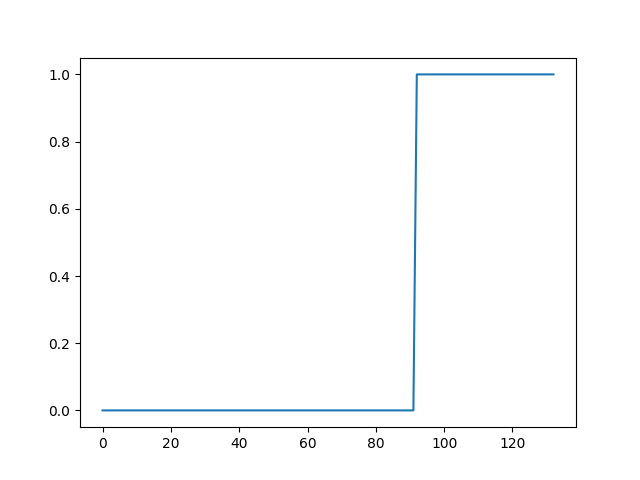

In [79]:
# draw one batch from the training generator
x_train_0, y_train_0 = train_data[1]
print("x_train_0.shape: ",x_train_0.shape)
print("y_train_0.shape: ",y_train_0.shape)

# check length of training generator
print("train_data len: ",len(train_data))

# check if we can iterate whole generator
for x, y in train_data:
    pass

# plot targets for 1st sentence of a batch
plt.figure()
plt.plot(y[0,:])

## 2: Feedforward Network

In [85]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, ReLU, Activation, Input

from tensorflow.keras.losses import BinaryCrossentropy # TODO: which loss should be used?

def build_feedforward_model(num_neurons=128, num_blocks=2, dropout_rate=0.15, learning_rate=1E-4):

    model = Sequential()
    model.add(Input(shape=(None,62)))

    for _ in range(num_blocks):
        model.add(Dense(num_neurons))
        model.add(ReLU())
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(1))  #Output size=1, common practice for binary classification
    model.add(Activation('sigmoid'))  # Sigmoid is common practice for binary classification

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss=BinaryCrossentropy(),
        metrics=[BinaryAccuracy()]
    )

    return model

In [86]:
# test for 1 epochs ...
model_ff = build_feedforward_model()
history_ff = model_ff.fit(train_data, validation_data=val_data, epochs=1)

c:\Users\kaspe\OneDrive - Aalto University\RWTH\Courses\61.00004 Audio Processing Using Python\code prerequisites-20240421\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


199/199 ━━━━━━━━━━━━━━━━━━━━ 67s 302ms/step - binary_accuracy: 0.5485 - loss: 0.8200 - val_binary_accuracy: 0.5840 - val_loss: 0.6655


## 3. Evaluation Function

In [94]:
def evaluate(model, test_data):
    # Evaluate the model on test data
    loss, accuracy = model.evaluate(test_data)
    print(f"Test Loss: {loss}")
    print(f"Test Accuracy: {accuracy}")
    
    # Print the number of model parameters
    num_params = model.count_params()
    print(f"Number of model parameters: {num_params}")
    
    # Select a sample from the test data
    sample_idx = 0  # You can choose any index, here we take the first one
    sample_features, sample_probabilities = test_data[0]
    
    # Predict using the model
    sample_prediction = model.predict(sample_features)
    
    # Plot the true targets and predictions
    plt.figure(figsize=(10, 6))
    plt.plot(sample_probabilities, 'bo', label='Sample True Probabilities')
    plt.plot(sample_prediction, 'ro', label='Prediction')
    plt.title('True Target vs Prediction')
    plt.xlabel('Sample Index')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

199/199 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - binary_accuracy: 0.6343 - loss: 0.6387
Test Loss: 0.6396359801292419
Test Accuracy: 0.6323503851890564
Number of model parameters: 25729
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


ValueError: x and y can be no greater than 2D, but have shapes (32,) and (32, 206, 1)

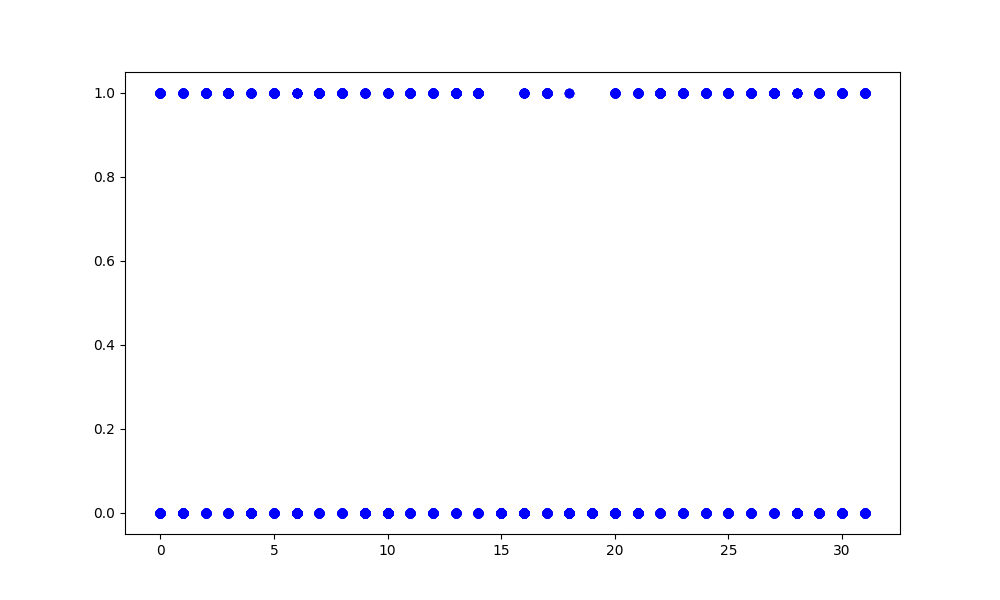

In [95]:
evaluate(model_ff, train_data)

## 4. First Real Training

In [ ]:
# ... and with 15 more epochs
model_ff = build_feedforward_model()
history_ff = model_ff.fit(train_data, validation_data=val_data, epochs=14)
evaluate(model_ff, test_data)

## 5: A Recurrent Model

In [ ]:
from tensorflow.keras.layers import LSTM

def build_lstm_model(num_neurons=32, num_blocks=2, learning_rate=1E-4):

    model = Sequential()

    # TODO: construct & compile model

    return model

In [ ]:
# test with 1 epoch ...
model_lstm = build_lstm_model()
history_lstm = model_lstm.fit(train_data, validation_data=val_data, epochs=1)
evaluate(model_lstm, test_data)

In [ ]:
# ... and with 15
model_lstm = build_lstm_model()
history_lstm = model_lstm.fit(train_data, validation_data=val_data, epochs=15)
evaluate(model_lstm, test_data)

## 6: Different Learning Rates

In [ ]:
learning_rates = [1E-4, 1E-3, 1E-2]
histories = []

# TODO: build and train models for different learning rates

In [ ]:
# TODO: compare loss over epoch for different learning rates